## HOUSE PRICES-ADVANCED REGRESSION TECHNIQUES
## Compiler: Mashele Given Phazamisa

 ## Data Description
* The data provided is a transformed version of original data which was collected.
* Train.csv - To be used for training and tuning of models.
* Test.csv - To be used only for prediction of the target variable in the final model
* The training dataset consist of 80 predictor variables and 1 target variable(sale price).
* The testing dataset consist of 80 predictor variable with no target variable.

### DATA Dictionary:
* MSSubClass: Identifies the type of dwelling involved in the sale
* MSZoning: Identifies the general zoning classification of the sale.    
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access to property      	
* Alley: Type of alley access to property		
* LotShape: General shape of property            
* LandContour: Flatness of the property		
* Utilities: Type of utilities available	
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits			
* Condition1: Proximity to various conditions	
* Condition2: Proximity to various conditions (if more than one is present)	
* BldgType: Type of dwelling    
* HouseStyle: Style of dwelling	
* OverallQual: Rates the overall material and finish of the house	
* OverallCond: Rates the overall condition of the house		
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
* RoofStyle: Type of roof		
* RoofMatl: Roof material		
* Exterior1st: Exterior covering on the  house
* Exterior2nd: Exterior covering on house (if more than one material)	
* MasVnrType: Masonry veneer type	
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Evaluates the quality of the material on the exterior 		
* ExterCond: Evaluates the present condition of the material on the exterior	
* Foundation: Type of foundation		
* BsmtQual: Evaluates the height of the basement		
* BsmtCond: Evaluates the general condition of the basement     
* BsmtExposure: Refers to walkout or garden level walls
* BsmtFinType1: Rating of basement finished area		
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Rating of basement finished area (if multiple types)    
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement areaa
* Heating: Type of heating	
* HeatingQC: Heating quality and condition		
* CentralAir: Central air conditioning
* Electrical: Electrical system		
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
* Kitchen: Kitchens above grade
* KitchenQual: Kitchen quality    	
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality (Assume typical unless deductions are warranted)	
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality     
* GarageType: Garage location    
* GarageYrBlt: Year garage was built		
* GarageFinish: Interior finish of the garage		
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality   
* GarageCond: Garage condition		
* PavedDrive: Paved driveway		
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality		
* Fence: Fence quality	
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal:  Value of miscellaneous feature
* MoSold: Month Sold (MM)
* YrSold: Year Sold (YYYY)
* SaleType: Type of sale
* SaleCondition: Condition of sale

      

## Import the neccessary libraries to run the codes

In [231]:
# First lets install the xgboost and imblearn packages
#!pip install xgboost                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
#!pip install imblearn 

In [93]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Libaries to assist with visualization of data
import matplotlib.pyplot as plt
import seaborn as sns
# To impute missing values
from sklearn.impute import SimpleImputer
# To tune model, get different metric scores, and split data
from sklearn.metrics import (mean_squared_error,mean_absolute_error,r2_score)
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
# To oversample and undersample data
#from imblearn import under_sampling, over_sampling
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To help with model building
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (AdaBoostRegressor,GradientBoostingRegressor, RandomForestRegressor,BaggingRegressor)
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Code to load the traning dataset
data_train= pd.read_csv("train.csv")

In [7]:
# Code to load the testing dataset
data_test = pd.read_csv("test.csv")

In [8]:
data_train.head()  # print the first five rows from a training dataset

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     196.000        Gd        TA      PConc       Gd       TA           No   
1       0.000        TA        TA     CBlock       Gd       TA           Gd   
2     162.000        Gd        TA      PConc       Gd       TA           Mn   
3       0.000        TA        TA     BrkTil       TA       Gd           No   
4     350.000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [9]:
data_train.tail()  # print the last five rows of the training dataset

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL       62.000     7917   Pave   NaN      Reg   
1456  1457          20       RL       85.000    13175   Pave   NaN      Reg   
1457  1458          70       RL       66.000     9042   Pave   NaN      Reg   
1458  1459          20       RL       68.000     9717   Pave   NaN      Reg   
1459  1460          20       RL       75.000     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455       0.000        TA        TA      PConc       Gd       TA   
1456     119.000        TA        TA     CBlock       Gd       TA   
1457       0.000        Ex        Gd      Stone       TA       Gd   
1458       0.000        TA        TA     CBlock       TA       TA   
1459       0.000        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [10]:
# Check the dimension of the training dataset
data_train.shape

(1460, 81)

In [11]:
# Check the dimensions of the testing dataset
data_test.shape

(1459, 80)

In [12]:
print(f"The training dataset consists of {data_train.shape[0]} rows and {data_train.shape[1]} columns")

The training dataset consists of 1460 rows and 81 columns


In [13]:
print(f"The testing dataset consists of {data_test.shape[0]} rows and {data_test.shape[1]} columns")

The testing dataset consists of 1459 rows and 80 columns


In [14]:
# Code to check the percentage split between the training and testing dataset
training_split=round(data_train.shape[0]/ (data_train.shape[0]+ data_test.shape[0]),2)*100
testing_split=round(data_test.shape[0]/ (data_train.shape[0]+ data_test.shape[0]),2)*100
print("*"*50)
print(f"Housing price data \t Split(in %)")                      
print(f"training set \t\t {training_split}")
print(f"tesing set \t\t  {testing_split}")
print("*"*50)

**************************************************
Housing price data 	 Split(in %)
training set 		 50.0
tesing set 		  50.0
**************************************************


### Observation:
The house price dataset is split into 50% training and 50% for testing.

In [15]:
data_train.info();       # Code to display the data types of the given training  dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Observation:
The housing dataset consists of 81 columns:
 * 35 columns are integer data types
 * 43 are object data types.
 * 3 are floating data type
 * Dataset contain memory usage of:920.0 KB(kilobytes). <br>
 * The Id column from the training dataset can be removed or set as an object data type

In [16]:
# Code to set the ID column as an object data type
data_train["Id"]= data_train["Id"].astype(object) 

In [17]:
# Check the missing values in the trainig dataset
data_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Observation
There are missing values from the training dataset and these includes:
* Lotfrontage
* Alley
* BsmtQual
* BsmtCond and others
* Alley ,PoolQC ,Fence,FireplaceQu and MiscFeature  are object columns with lot of missing values, so we need to drop the column as thier imputation using mode will not change the null values .
-imputation of missing values in the training dataset columns will be done during data preprocessing.

In [18]:
# Print the statistical summary of the numerical training dataset
data_train.describe().T

count       mean       std       min        25%        50%  \
MSSubClass    1460.000     56.897    42.301    20.000     20.000     50.000   
LotFrontage   1201.000     70.050    24.285    21.000     59.000     69.000   
LotArea       1460.000  10516.828  9981.265  1300.000   7553.500   9478.500   
OverallQual   1460.000      6.099     1.383     1.000      5.000      6.000   
OverallCond   1460.000      5.575     1.113     1.000      5.000      5.000   
YearBuilt     1460.000   1971.268    30.203  1872.000   1954.000   1973.000   
YearRemodAdd  1460.000   1984.866    20.645  1950.000   1967.000   1994.000   
MasVnrArea    1452.000    103.685   181.066     0.000      0.000      0.000   
BsmtFinSF1    1460.000    443.640   456.098     0.000      0.000    383.500   
BsmtFinSF2    1460.000     46.549   161.319     0.000      0.000      0.000   
BsmtUnfSF     1460.000    567.240   441.867     0.000    223.000    477.500   
TotalBsmtSF   1460.000   1057.429   438.705     0.000    795.750    991.500   
1stFlrSF      1460.000   1162.627   386.588   334.000    882.000   1087.000   
2ndFlrSF      1460.000    346.992   436.528     0.000      0.000      0.000   
LowQualFinSF  1460.000      5.845    48.623     0.000      0.000      0.000   
GrLivArea     1460.000   1515.464   525.480   334.000   1129.500   1464.000   
BsmtFullBath  1460.000      0.425     0.519     0.000      0.000      0.000   
BsmtHalfBath  1460.000      0.058     0.239     0.000      0.000      0.000   
FullBath      1460.000      1.565     0.551     0.000      1.000      2.000   
HalfBath      1460.000      0.383     0.503     0.000      0.000      0.000   
BedroomAbvGr  1460.000      2.866     0.816     0.000      2.000      3.000   
KitchenAbvGr  1460.000      1.047     0.220     0.000      1.000      1.000   
TotRmsAbvGrd  1460.000      6.518     1.625     2.000      5.000      6.000   
Fireplaces    1460.000      0.613     0.645     0.000      0.000      1.000   
GarageYrBlt   1379.000   1978.506    24.690  1900.000   1961.000   1980.000   
GarageCars    1460.000      1.767     0.747     0.000      1.000      2.000   
GarageArea    1460.000    472.980   213.805     0.000    334.500    480.000   
WoodDeckSF    1460.000     94.245   125.339     0.000      0.000      0.000   
OpenPorchSF   1460.000     46.660    66.256     0.000      0.000     25.000   
EnclosedPorch 1460.000     21.954    61.119     0.000      0.000      0.000   
3SsnPorch     1460.000      3.410    29.317     0.000      0.000      0.000   
ScreenPorch   1460.000     15.061    55.757     0.000      0.000      0.000   
PoolArea      1460.000      2.759    40.177     0.000      0.000      0.000   
MiscVal       1460.000     43.489   496.123     0.000      0.000      0.000   
MoSold        1460.000      6.322     2.704     1.000      5.000      6.000   
YrSold        1460.000   2007.816     1.328  2006.000   2007.000   2008.000   
SalePrice     1460.000 180921.196 79442.503 34900.000 129975.000 163000.000   

                     75%        max  
MSSubClass        70.000    190.000  
LotFrontage       80.000    313.000  
LotArea        11601.500 215245.000  
OverallQual        7.000     10.000  
OverallCond        6.000      9.000  
YearBuilt       2000.000   2010.000  
YearRemodAdd    2004.000   2010.000  
MasVnrArea       166.000   1600.000  
BsmtFinSF1       712.250   5644.000  
BsmtFinSF2         0.000   1474.000  
BsmtUnfSF        808.000   2336.000  
TotalBsmtSF     1298.250   6110.000  
1stFlrSF        1391.250   4692.000  
2ndFlrSF         728.000   2065.000  
LowQualFinSF       0.000    572.000  
GrLivArea       1776.750   5642.000  
BsmtFullBath       1.000      3.000  
BsmtHalfBath       0.000      2.000  
FullBath           2.000      3.000  
HalfBath           1.000      2.000  
BedroomAbvGr       3.000      8.000  
KitchenAbvGr       1.000      3.000  
TotRmsAbvGrd       7.000     14.000  
Fireplaces         1.000      3.000  
GarageYrBlt     2002.000   2010.000  
GarageCars         2.000  

### Observation:
* Most of the housing data are skewed to the right with mean greater than the median.<br>

In [19]:
 # print the first five rows from a testing dataset
data_test.head() 

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH       80.000    11622   Pave   NaN      Reg   
1  1462          20       RL       81.000    14267   Pave   NaN      IR1   
2  1463          60       RL       74.000    13830   Pave   NaN      IR1   
3  1464          60       RL       78.000     9978   Pave   NaN      IR1   
4  1465         120       RL       43.000     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       0.000        TA        TA     CBlock       TA       TA           No   
1     108.000        TA        TA     CBlock       TA       TA           No   
2       0.000        TA        TA      PConc       Gd       TA           No   
3      20.000        TA        TA      PConc       TA       TA           No   
4       0.000        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec     468.000          LwQ     144.000    270.000      882.000   
1          ALQ     923.000          Unf       0.000    406.000     1329.000   
2          GLQ     791.000          Unf       0.000    137.000      928.000   
3          GLQ     602.000          Unf       0.000    324.000      926.000   
4          ALQ     263.000          Unf       0.000   1017.000     1280.000   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896         0.000         0.000         1         0             2   
1       1329         0.000         0.000         1         1             3   
2       1629         0.000         0.000         2         1             3   
3       1604         0.000         0.000         2         1             3   
4       1280         0.000         0.000         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [20]:
data_test.info()  # print the information for the datatypes of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [21]:
# code to set the ID column as an object data type
data_test["Id"]= data_test["Id"].astype(object) 

In [22]:
# Check the missing values in the testing dataset
data_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

####  Observation
There are missing values from the testing dataset and this includes:
 * Lot frontage
 * Alley
 * Utilities and others
Further computation will be done to impute this missing values in the testing dataset

In [23]:
## Check for duplicated values in both training and testing dataset
data_train.duplicated().sum()

0

In [24]:
data_test.duplicated().sum()

0

####  Observation:
There are no duplicates in both training and testing dataset

In [25]:
data_test.describe().T

count     mean      std      min      25%      50%       75%  \
MSSubClass    1459.000   57.378   42.747   20.000   20.000   50.000    70.000   
LotFrontage   1232.000   68.580   22.377   21.000   58.000   67.000    80.000   
LotArea       1459.000 9819.161 4955.517 1470.000 7391.000 9399.000 11517.500   
OverallQual   1459.000    6.079    1.437    1.000    5.000    6.000     7.000   
OverallCond   1459.000    5.554    1.114    1.000    5.000    5.000     6.000   
YearBuilt     1459.000 1971.358   30.390 1879.000 1953.000 1973.000  2001.000   
YearRemodAdd  1459.000 1983.663   21.130 1950.000 1963.000 1992.000  2004.000   
MasVnrArea    1444.000  100.709  177.626    0.000    0.000    0.000   164.000   
BsmtFinSF1    1458.000  439.204  455.268    0.000    0.000  350.500   753.500   
BsmtFinSF2    1458.000   52.619  176.754    0.000    0.000    0.000     0.000   
BsmtUnfSF     1458.000  554.295  437.260    0.000  219.250  460.000   797.750   
TotalBsmtSF   1458.000 1046.118  442.899    0.000  784.000  988.000  1305.000   
1stFlrSF      1459.000 1156.535  398.166  407.000  873.500 1079.000  1382.500   
2ndFlrSF      1459.000  325.968  420.610    0.000    0.000    0.000   676.000   
LowQualFinSF  1459.000    3.544   44.043    0.000    0.000    0.000     0.000   
GrLivArea     1459.000 1486.046  485.566  407.000 1117.500 1432.000  1721.000   
BsmtFullBath  1457.000    0.434    0.531    0.000    0.000    0.000     1.000   
BsmtHalfBath  1457.000    0.065    0.252    0.000    0.000    0.000     0.000   
FullBath      1459.000    1.571    0.555    0.000    1.000    2.000     2.000   
HalfBath      1459.000    0.378    0.503    0.000    0.000    0.000     1.000   
BedroomAbvGr  1459.000    2.854    0.830    0.000    2.000    3.000     3.000   
KitchenAbvGr  1459.000    1.042    0.208    0.000    1.000    1.000     1.000   
TotRmsAbvGrd  1459.000    6.385    1.509    3.000    5.000    6.000     7.000   
Fireplaces    1459.000    0.581    0.647    0.000    0.000    0.000     1.000   
GarageYrBlt   1381.000 1977.721   26.431 1895.000 1959.000 1979.000  2002.000   
GarageCars    1458.000    1.766    0.776    0.000    1.000    2.000     2.000   
GarageArea    1458.000  472.769  217.049    0.000  318.000  480.000   576.000   
WoodDeckSF    1459.000   93.175  127.745    0.000    0.000    0.000   168.000   
OpenPorchSF   1459.000   48.314   68.883    0.000    0.000   28.000    72.000   
EnclosedPorch 1459.000   24.243   67.228    0.000    0.000    0.000     0.000   
3SsnPorch     1459.000    1.794   20.208    0.000    0.000    0.000     0.000   
ScreenPorch   1459.000   17.064   56.610    0.000    0.000    0.000     0.000   
PoolArea      1459.000    1.744   30.492    0.000    0.000    0.000     0.000   
MiscVal       1459.000   58.168  630.807    0.000    0.000    0.000     0.000   
MoSold        1459.000    6.104    2.722    1.000    4.000    6.000     8.000   
YrSold        1459.000 2007.770    1.302 2006.000 2007.000 2008.000  2009.000   

                    max  
MSSubClass      190.000  
LotFrontage     200.000  
LotArea       56600.000  
OverallQual      10.000  
OverallCond       9.000  
YearBuilt      2010.000  
YearRemodAdd   2010.000  
MasVnrArea     1290.000  
BsmtFinSF1     4010.000  
BsmtFinSF2     1526.000  
BsmtUnfSF      2140.000  
TotalBsmtSF    5095.000  
1stFlrSF       5095.000  
2ndFlrSF       1862.000  
LowQualFinSF   1064.000  
GrLivArea      5095.000  
BsmtFullBath      3.000  
BsmtHalfBath      2.000  
FullBath          4.000  
HalfBath          2.000  
BedroomAbvGr      6.000  
KitchenAbvGr      2.000  
TotRmsAbvGrd     15.000  
Fireplaces        4.000  
GarageYrBlt    2207.000  
GarageCars        5.000  
GarageArea     1488.000  
WoodDeckSF     1424.000  
OpenPorchSF     742.000  
EnclosedPorch  1012.000  
3SsnPorch       360.000  
ScreenPorch     576.000  
PoolArea        800.000  
MiscVal       17000.000  
MoSold           12.000  
YrSold         2010.000

## Exploratory Data Analysis

### Univariate analysis

### Numerical data analysis

In [26]:
# Code to make a copy of the original training and testing dataset
data=data_train.copy() 
data_pred=data_test.copy() 

In [27]:
data.shape

(1460, 81)

In [28]:
data_pred.shape

(1459, 80)

In [29]:
# First drop the Id ,Alley ,PoolQC ,Fence , MiscFeature and GarageYrBuilt columns in the training dataset
data=data.drop(columns=["Id","Alley","PoolQC","Fence","MiscFeature","FireplaceQu","GarageYrBlt"],axis=1)

In [30]:
data.shape

(1460, 74)

In [31]:
# First drop the Id ,Alley ,PoolQC ,Fence and MiscFeature column in the training dataset
data_pred=data_pred.drop(columns=["Alley","PoolQC","Fence","MiscFeature","FireplaceQu","GarageYrBlt"],axis=1)

In [32]:
data_pred.shape

(1459, 74)

In [33]:
# Create alist of numerical columns from the testing dataset
numerical_columns_test= data_pred._get_numeric_data().columns 
# Create a list of categorical columns from testing dataset
categorical_columns_test = data_pred.select_dtypes(include=["object"]).columns.tolist()

In [34]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

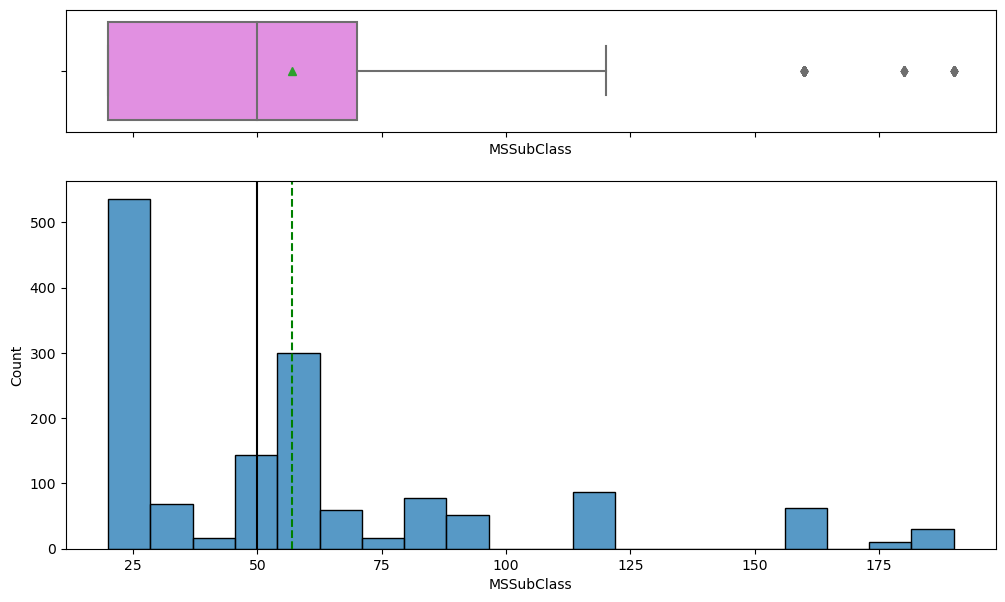

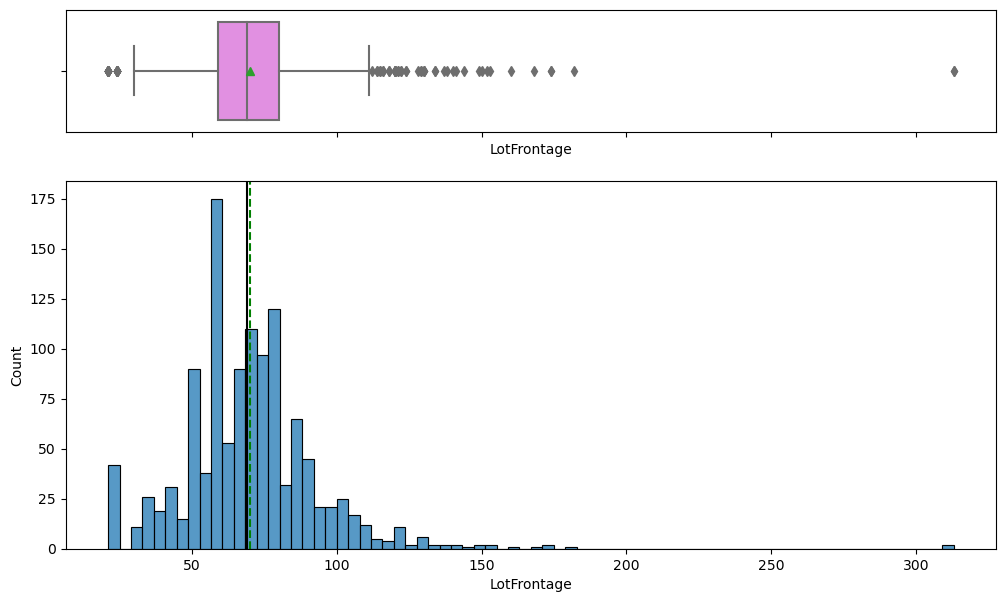

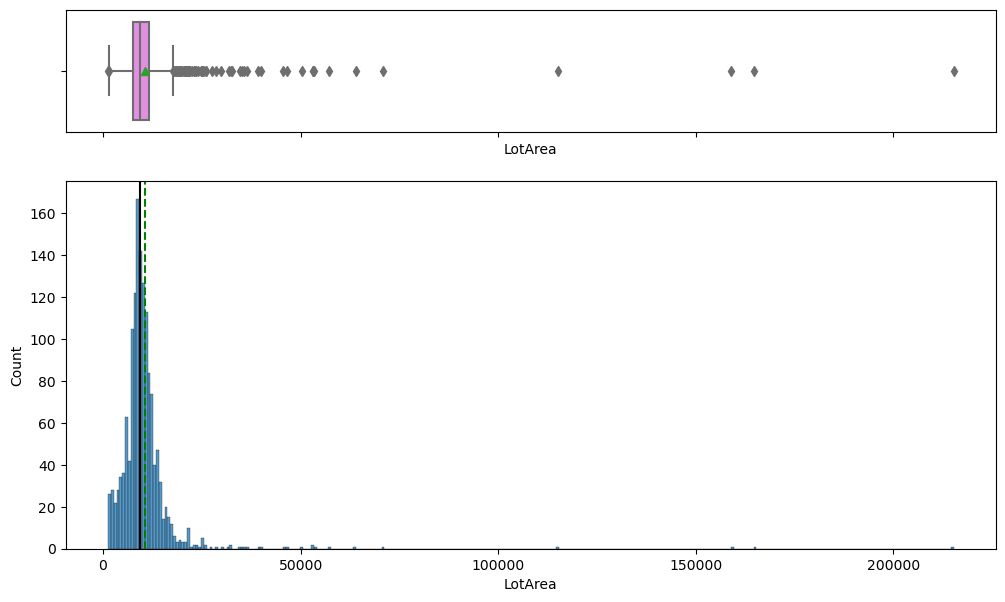

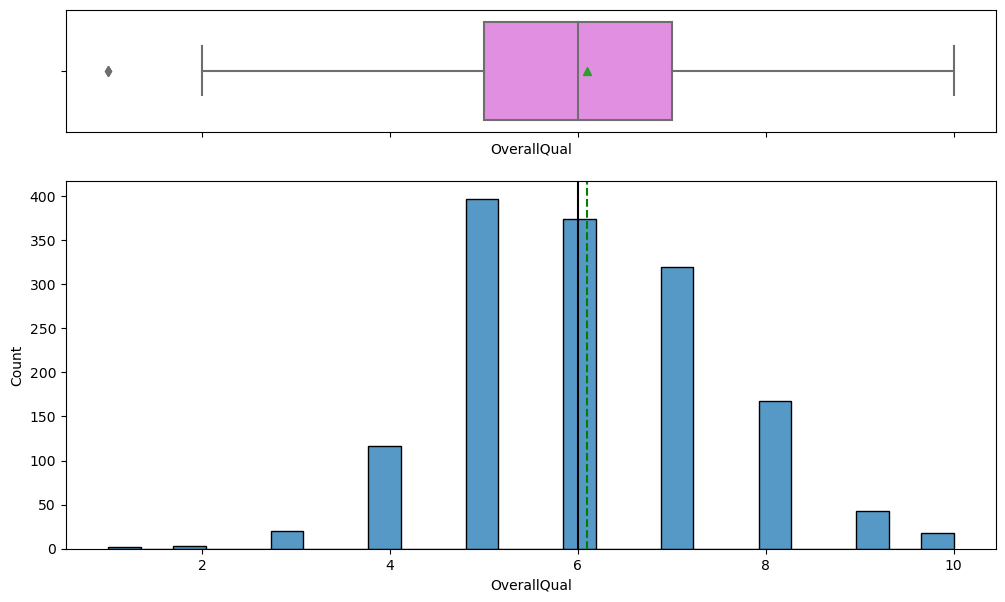

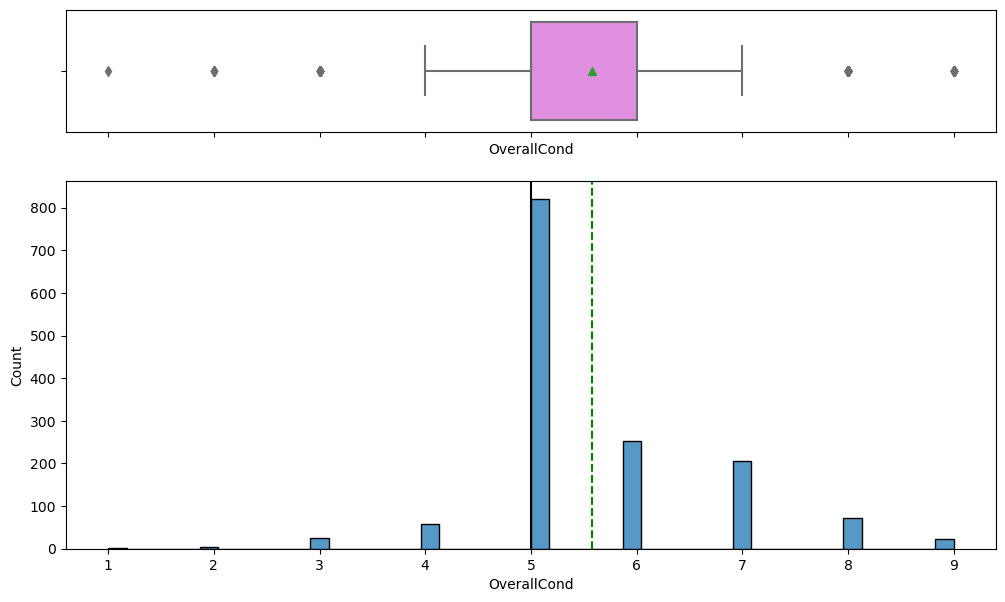

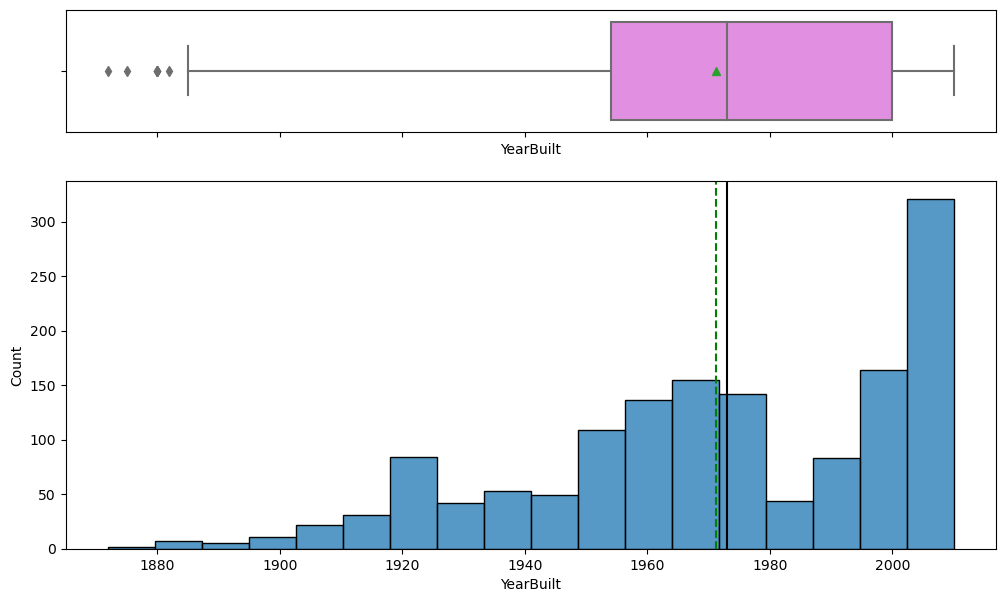

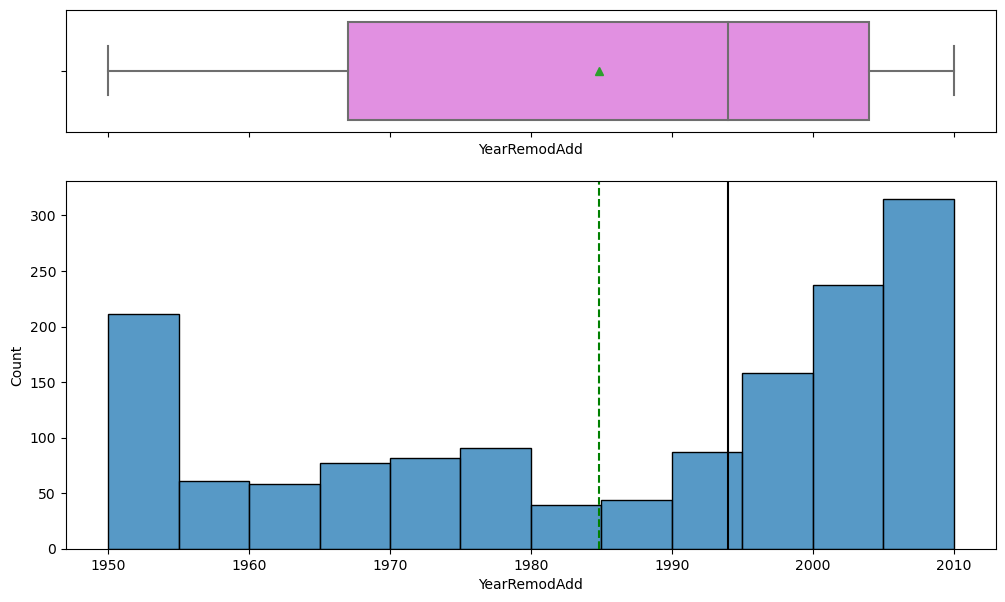

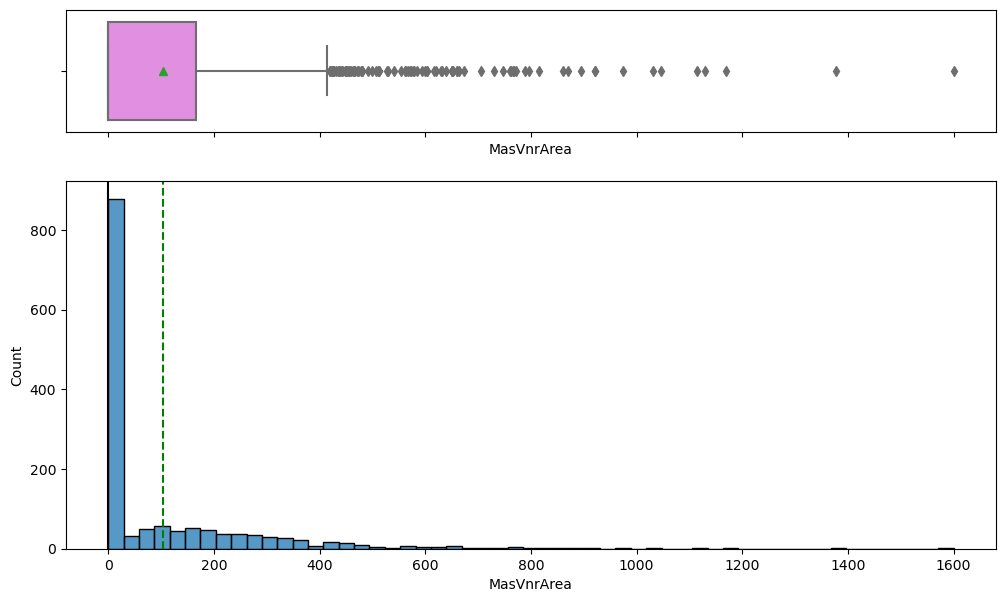

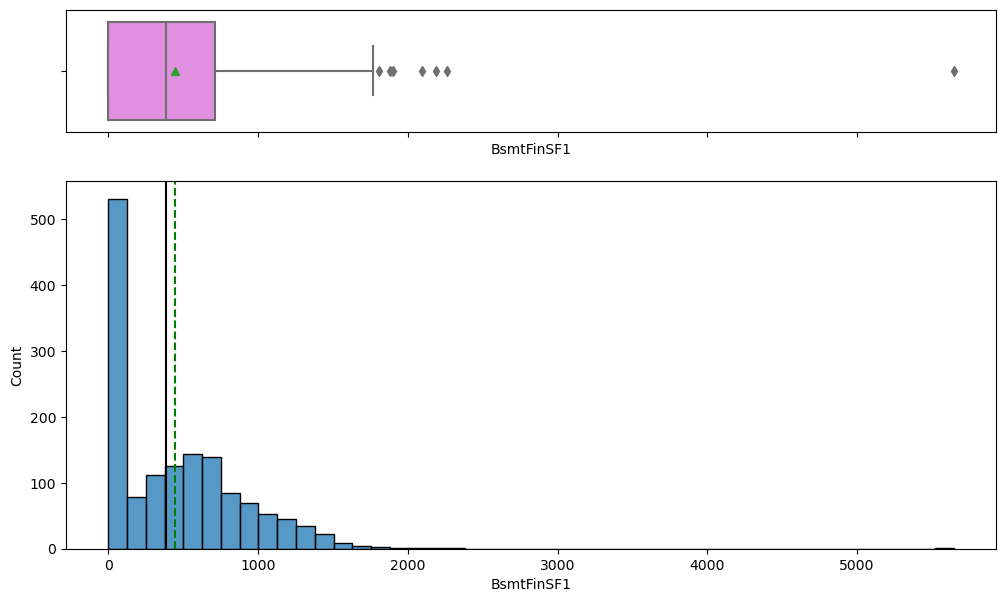

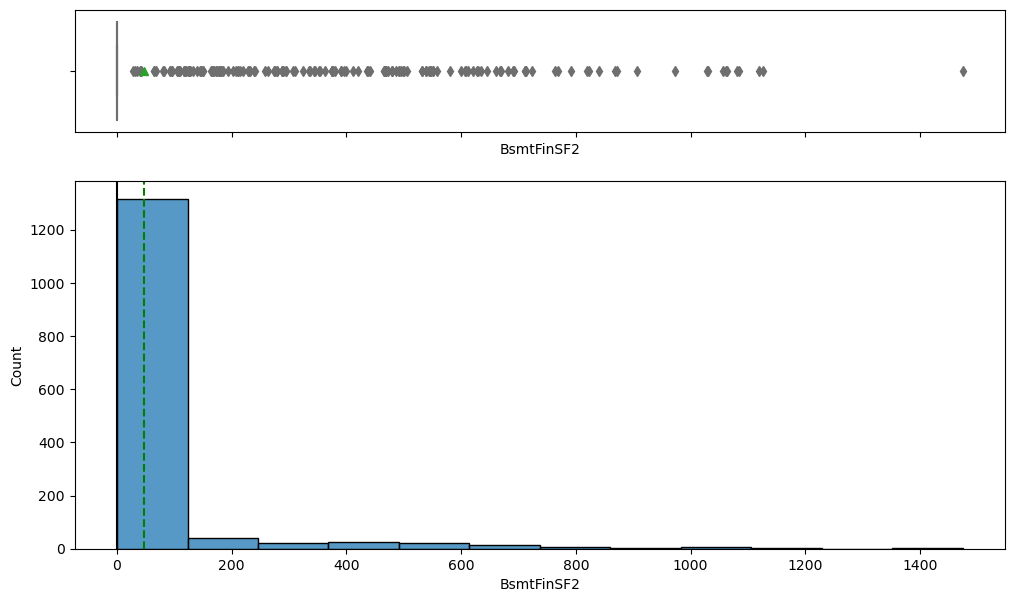

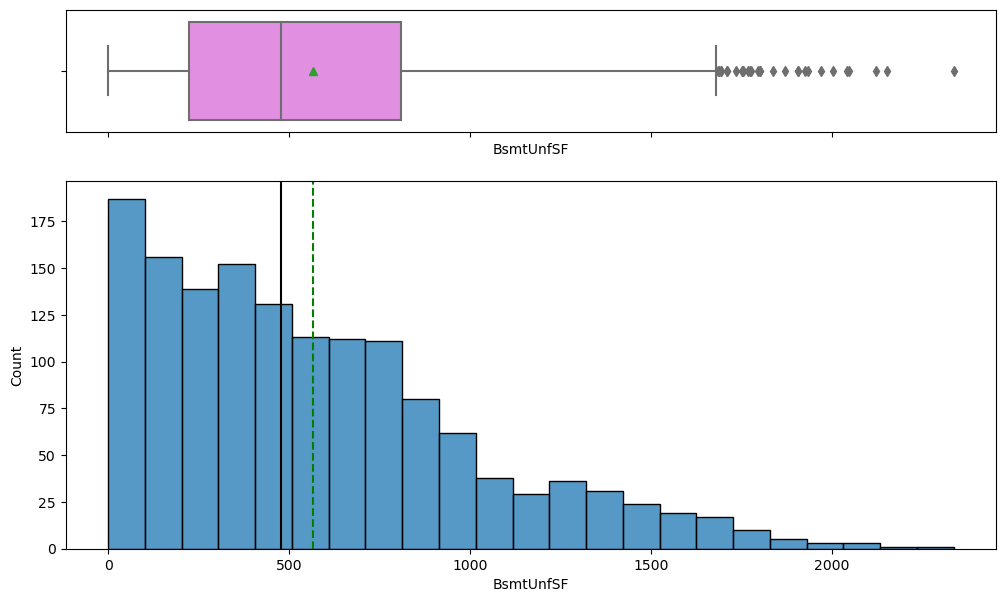

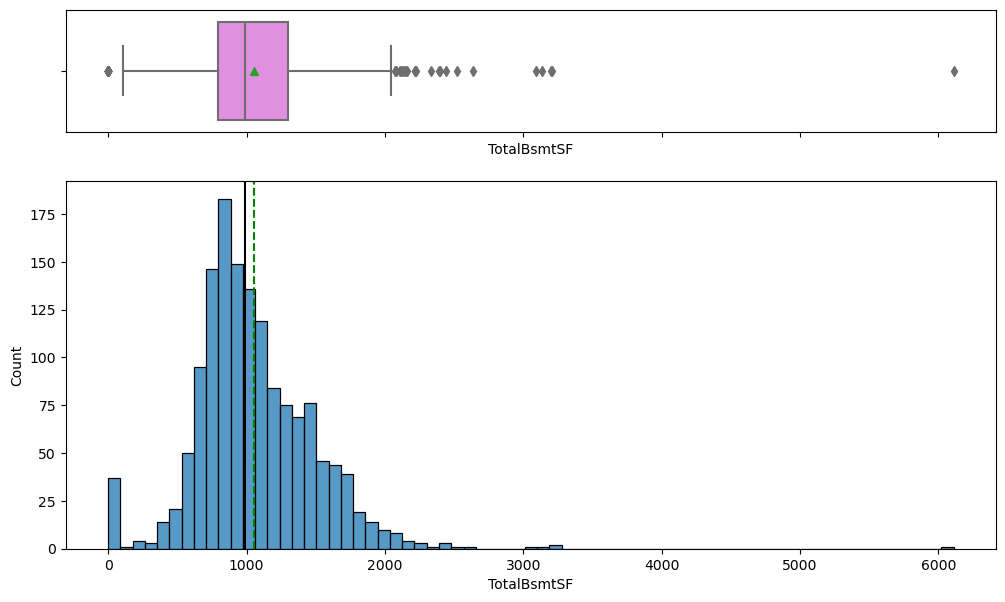

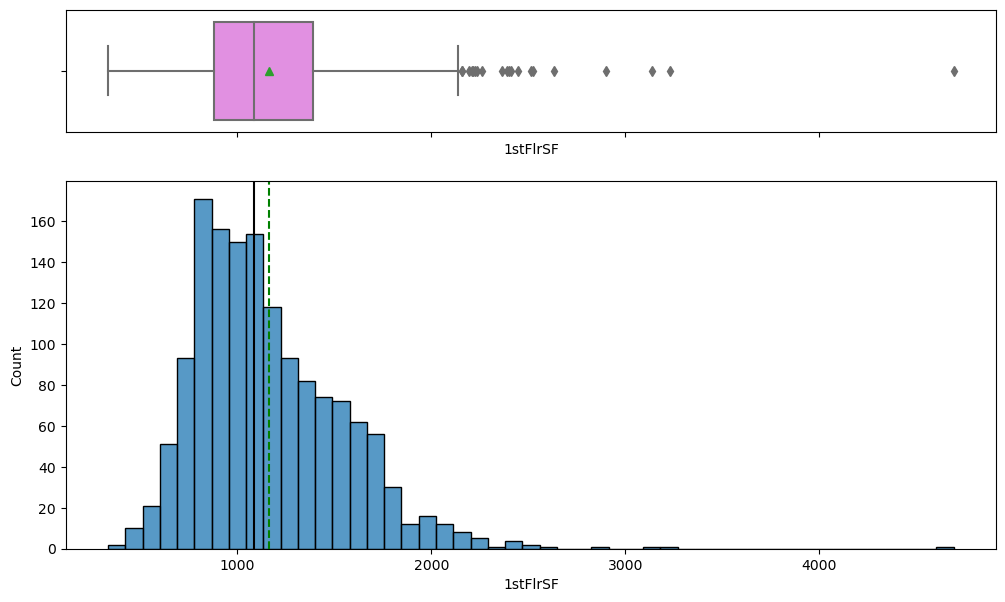

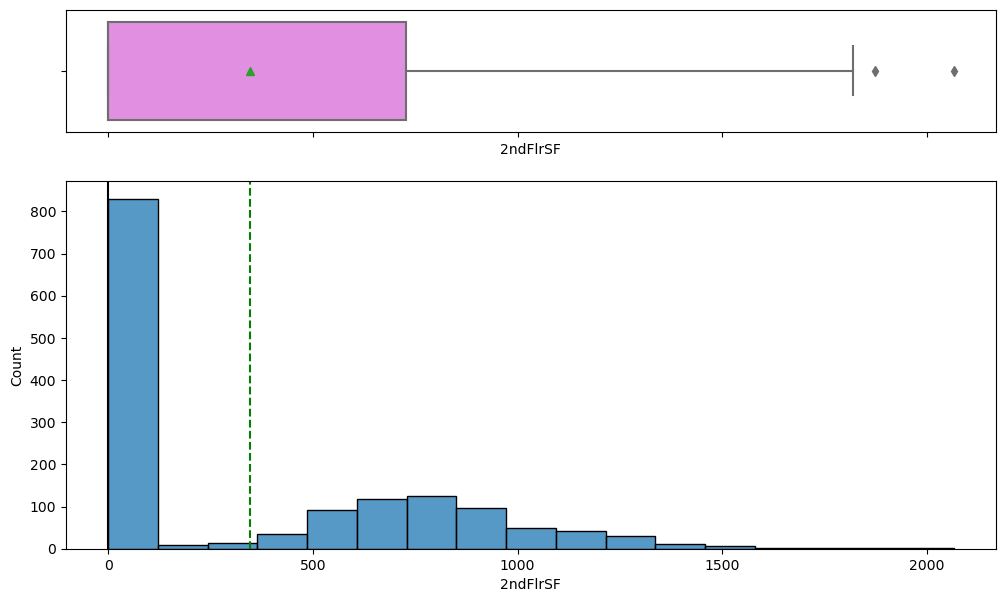

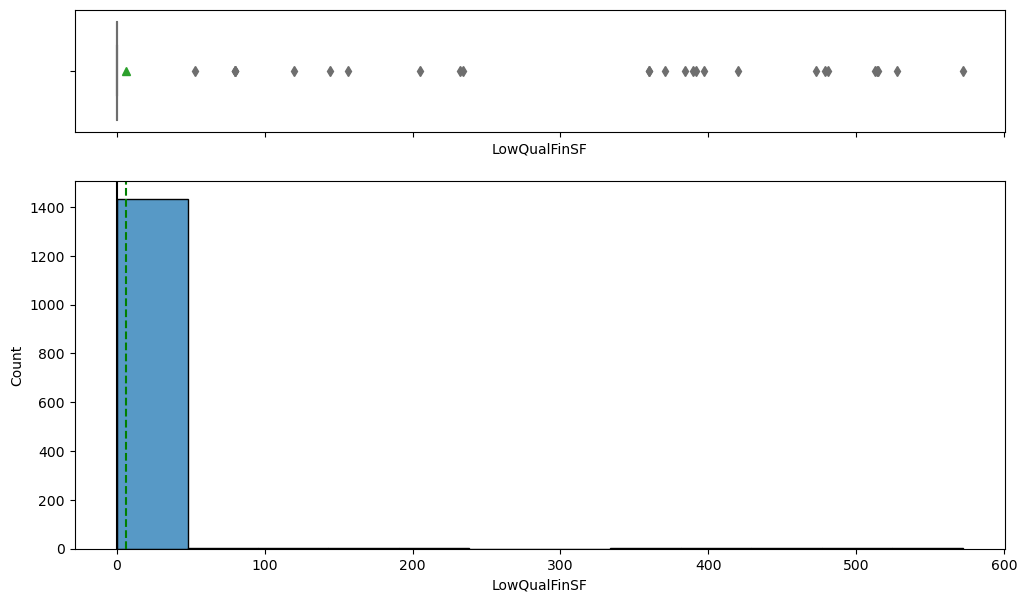

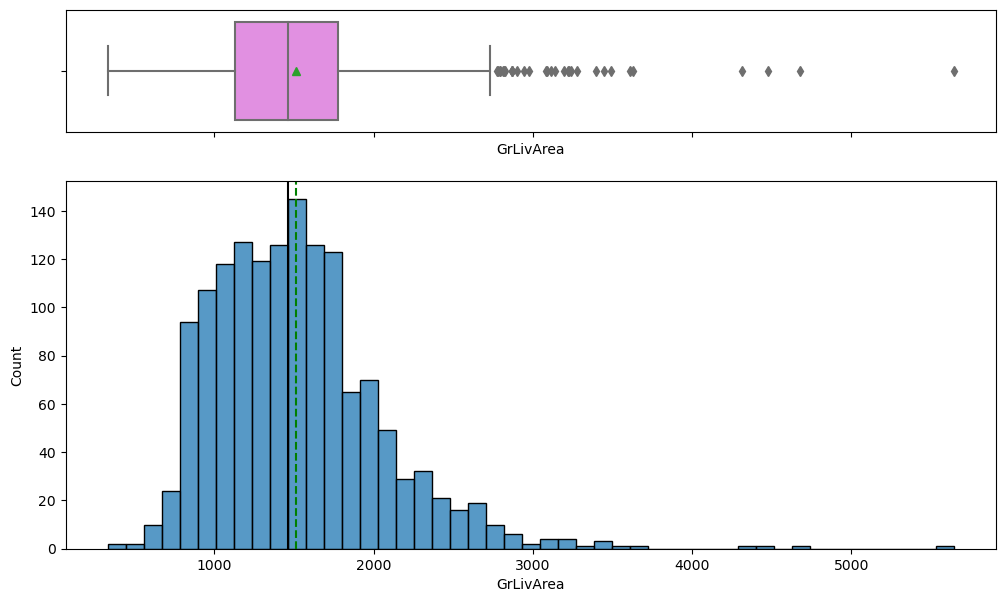

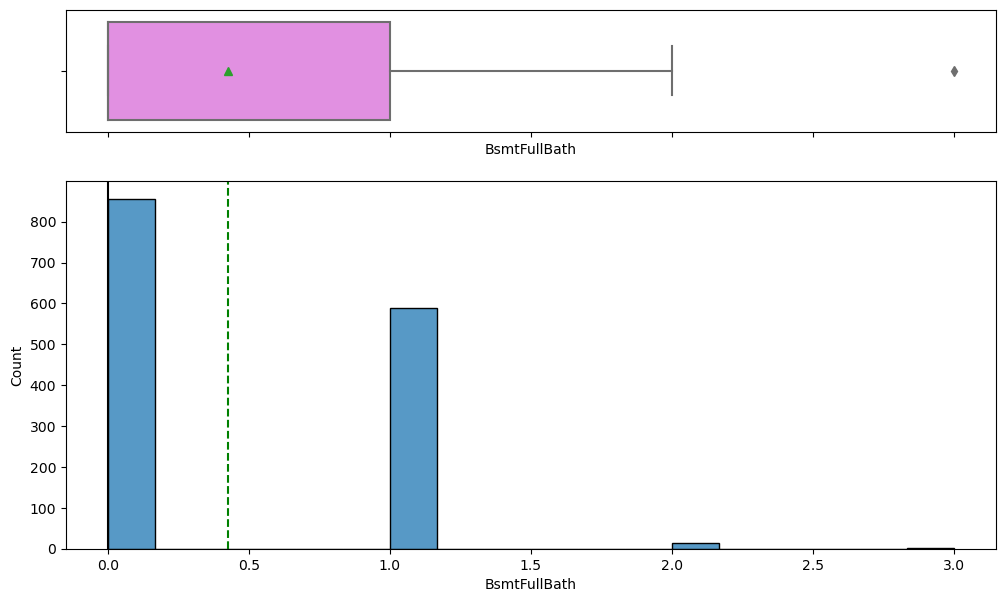

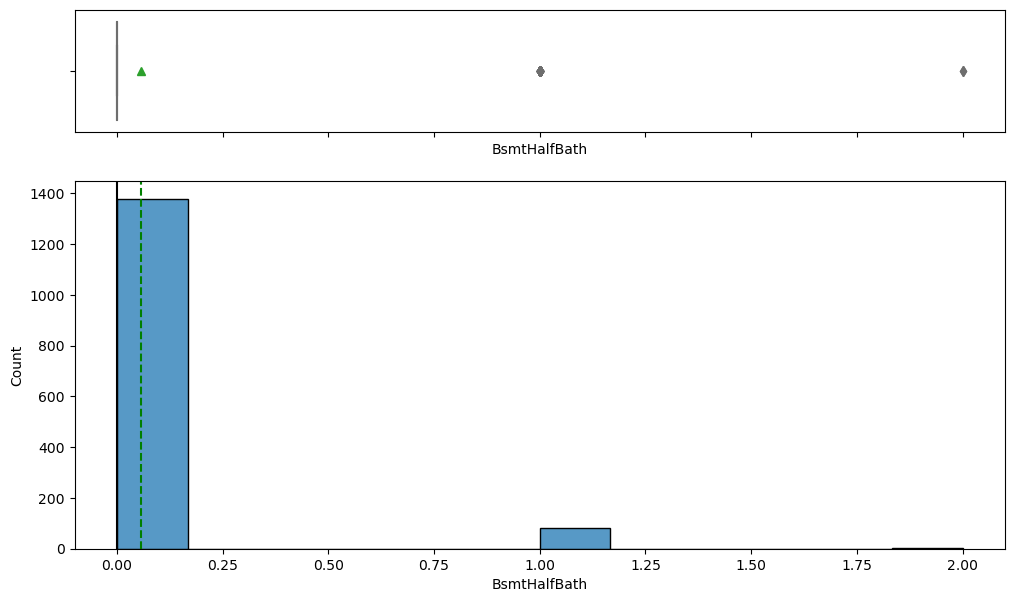

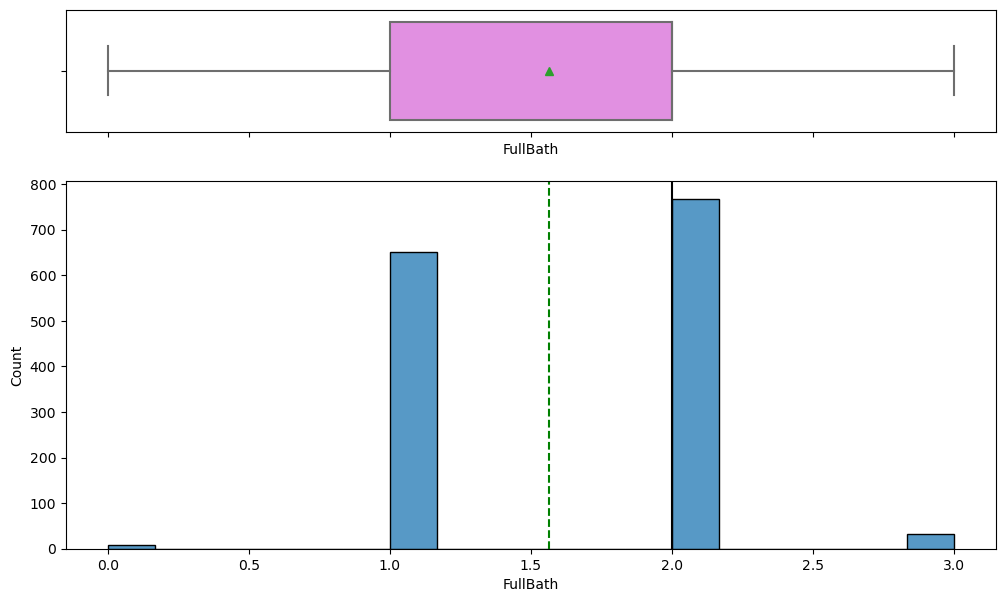

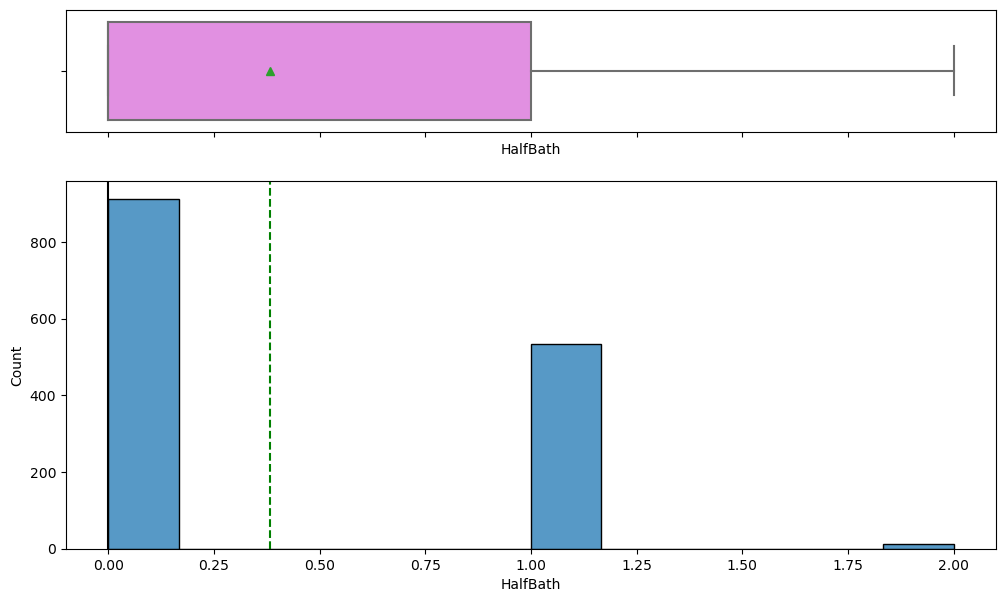

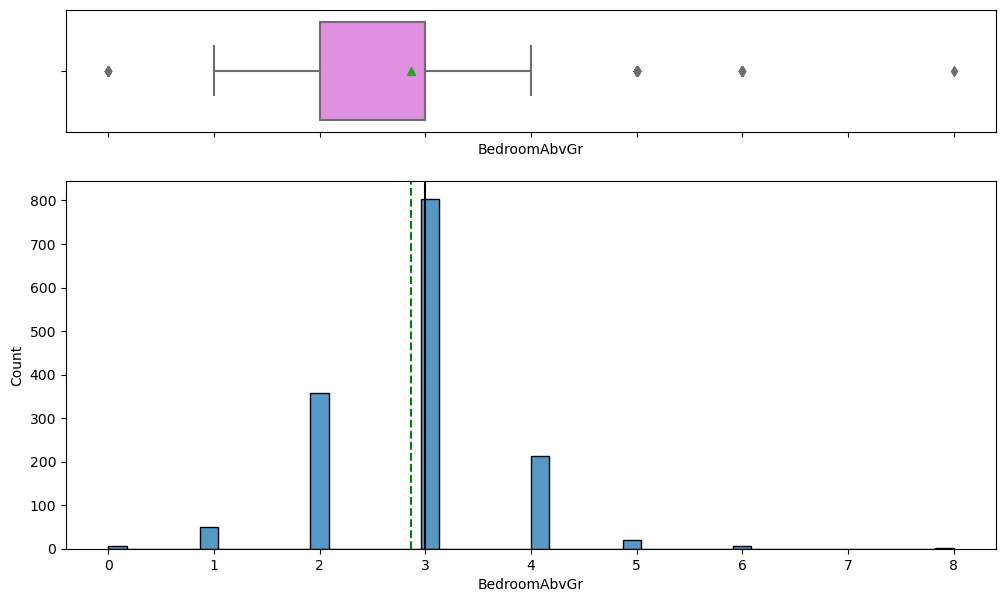

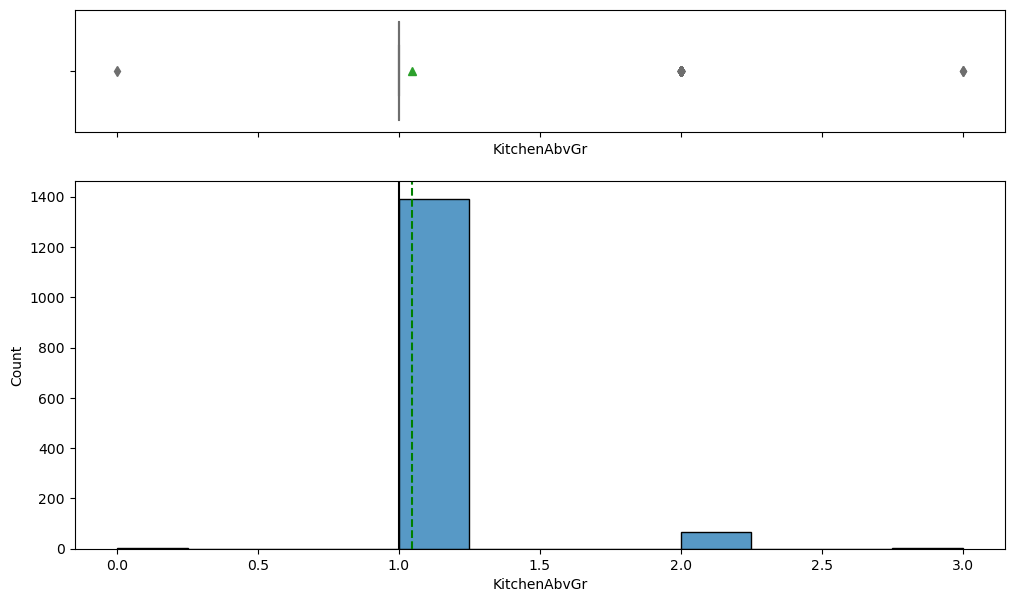

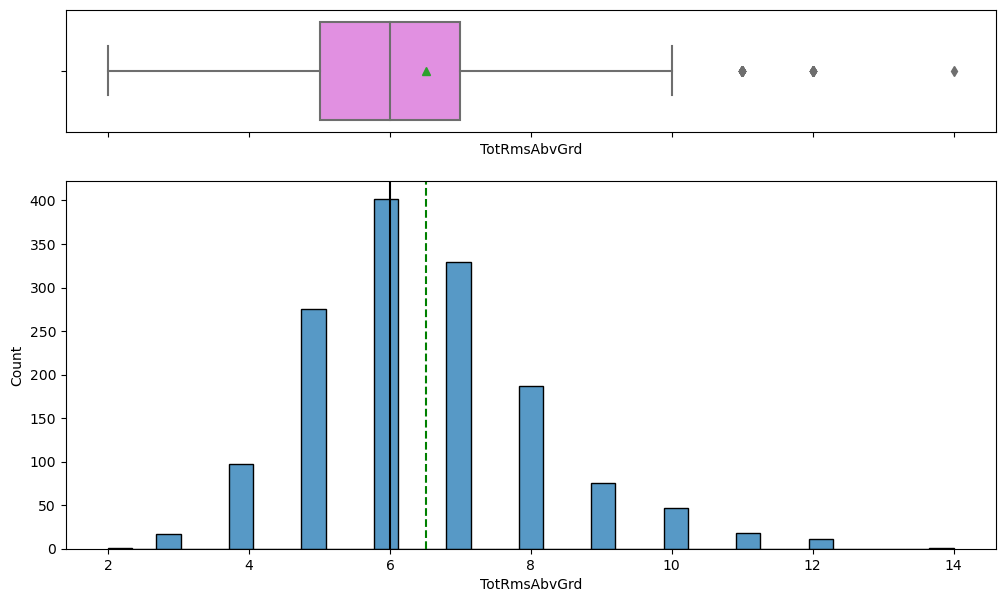

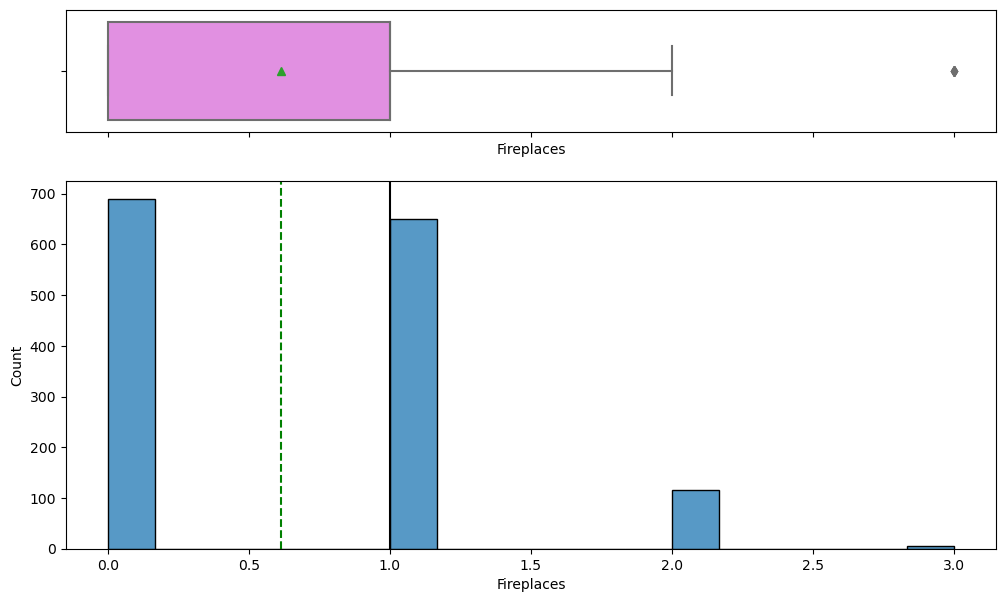

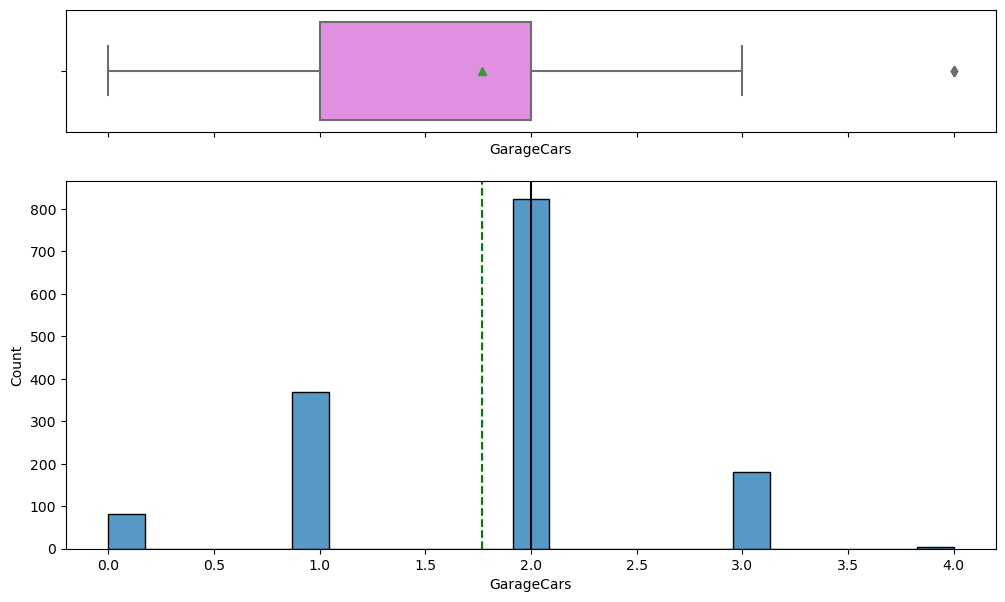

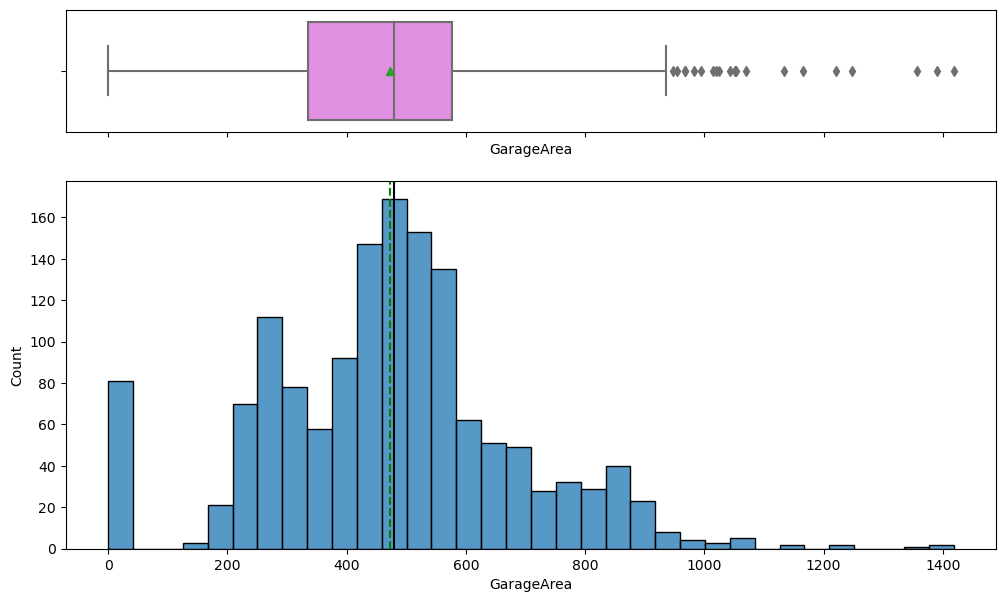

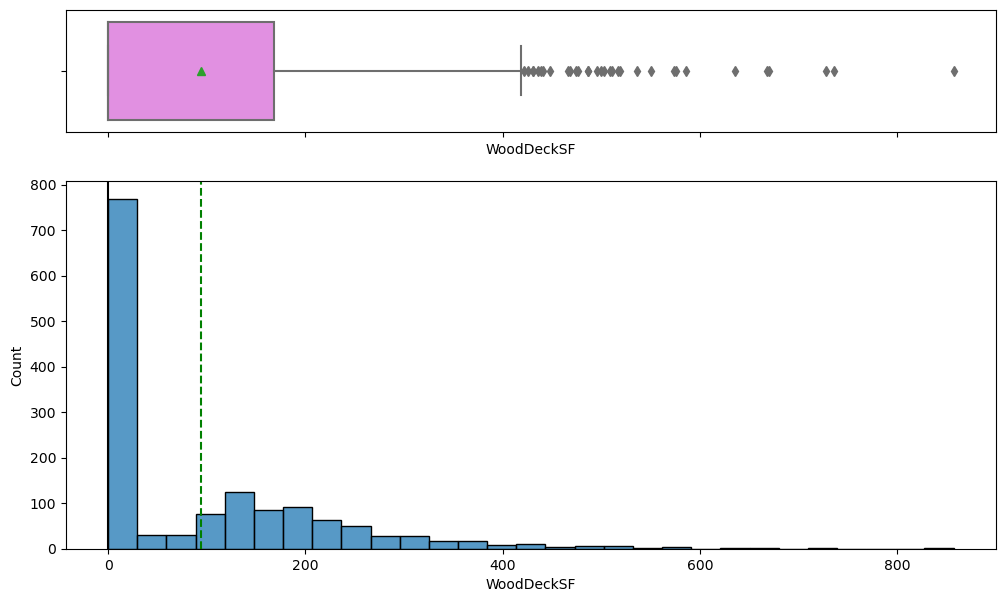

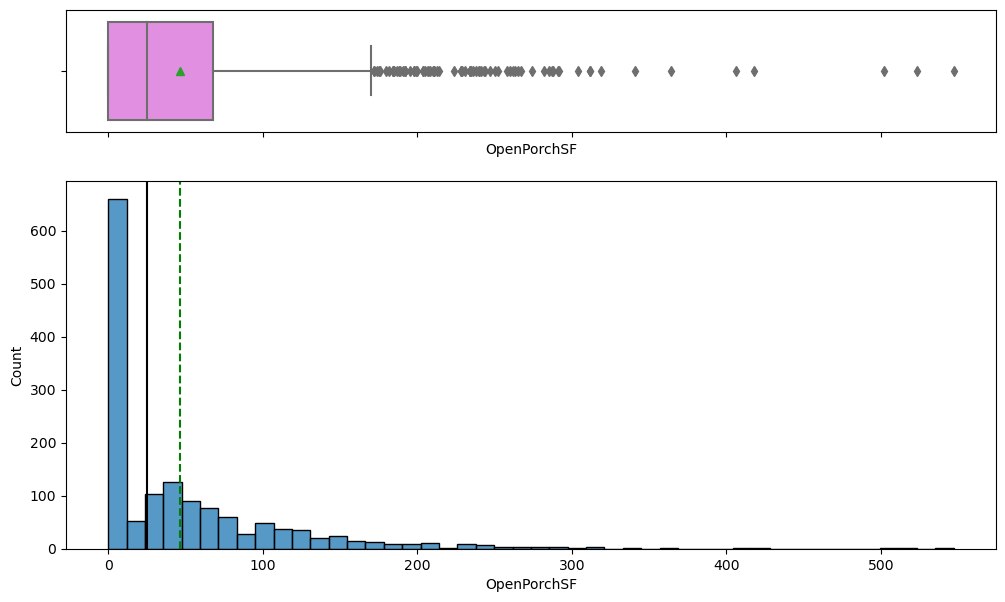

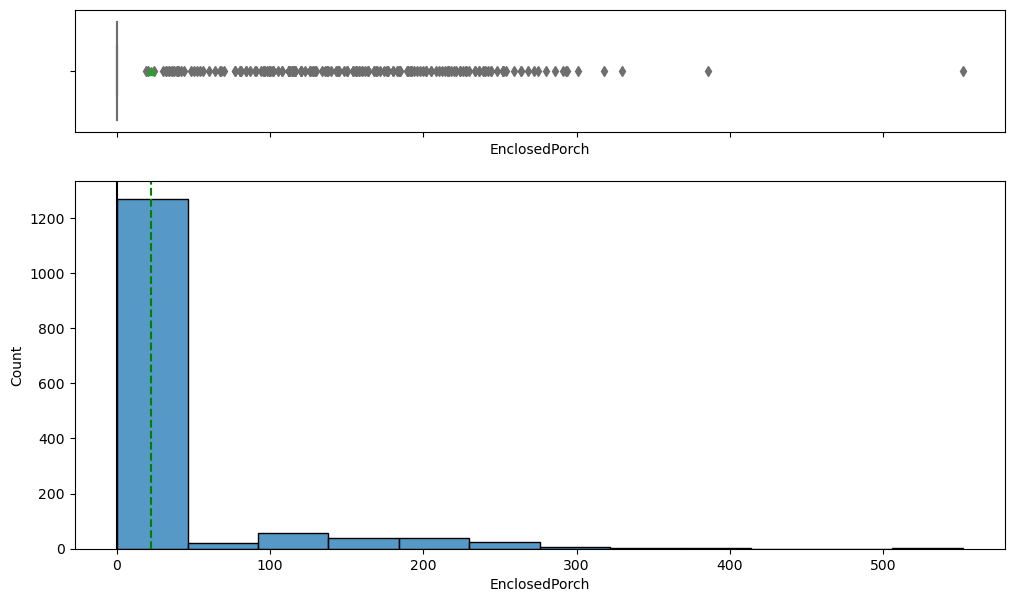

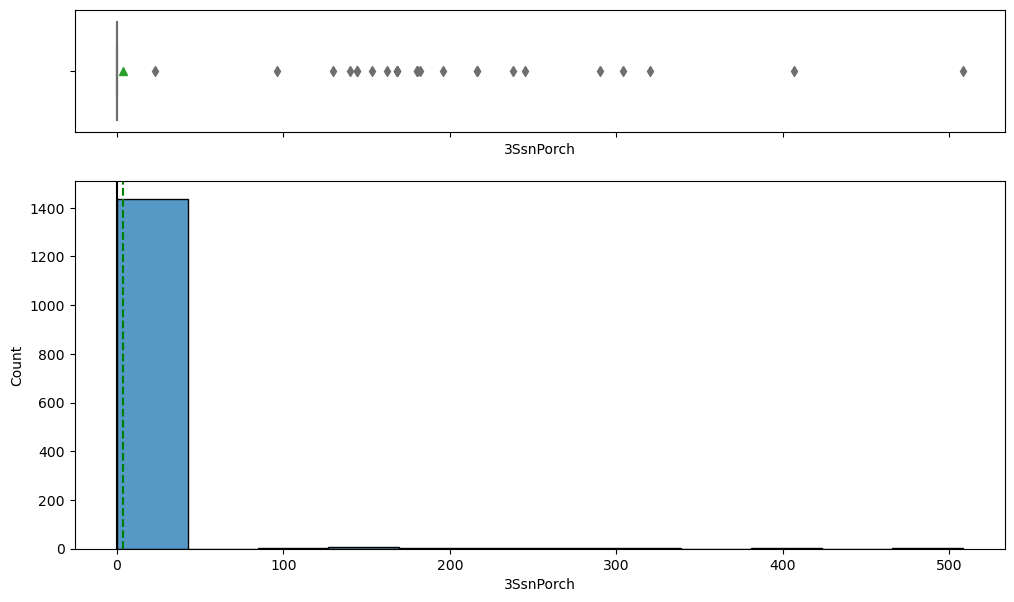

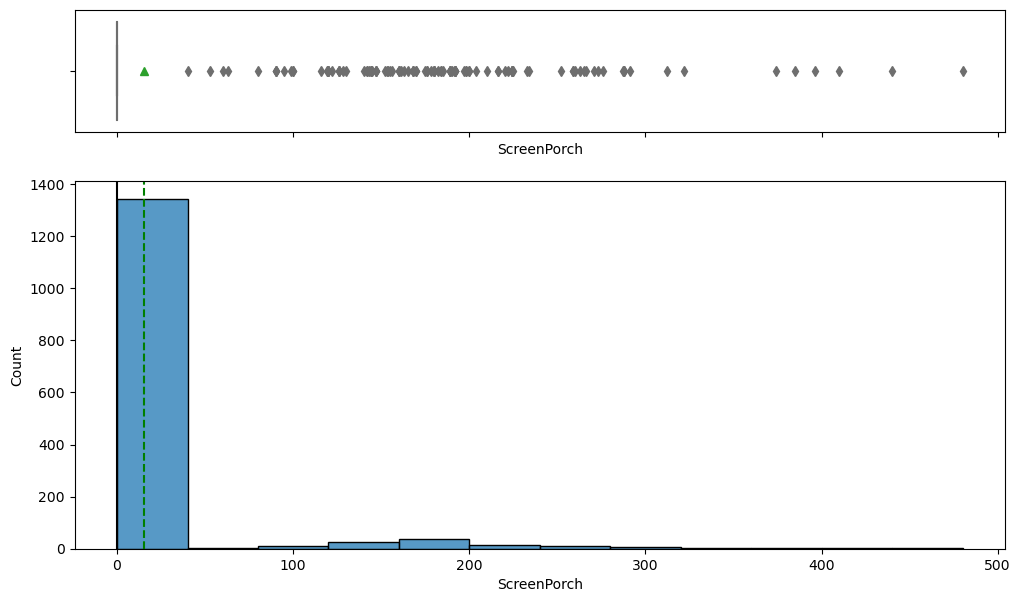

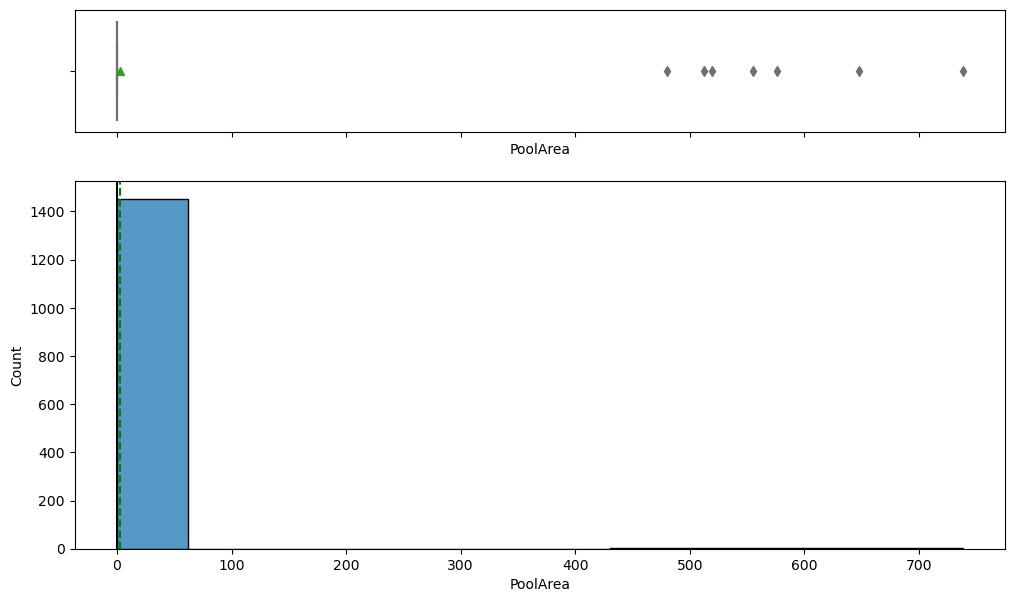

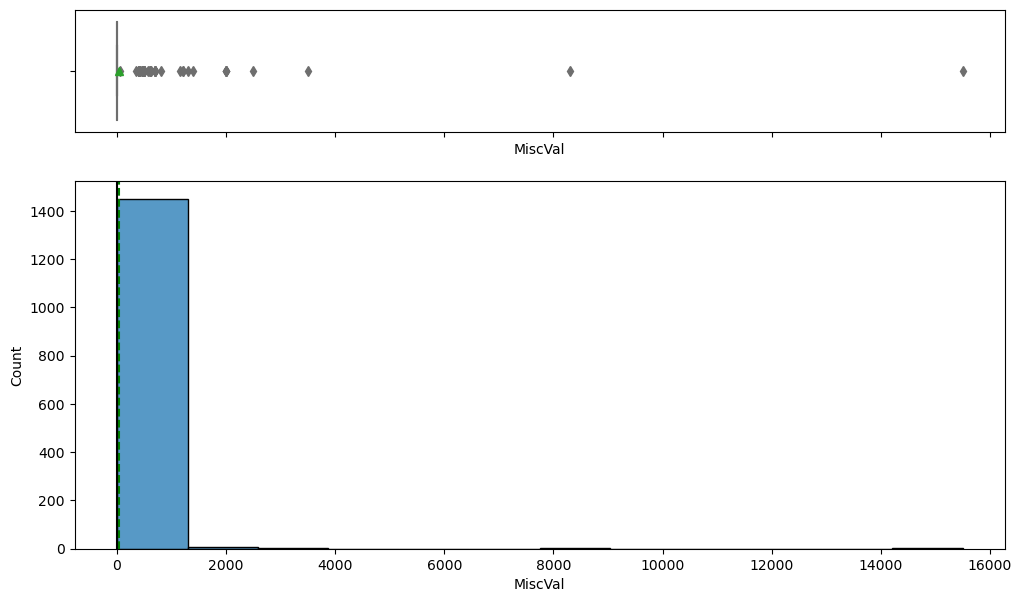

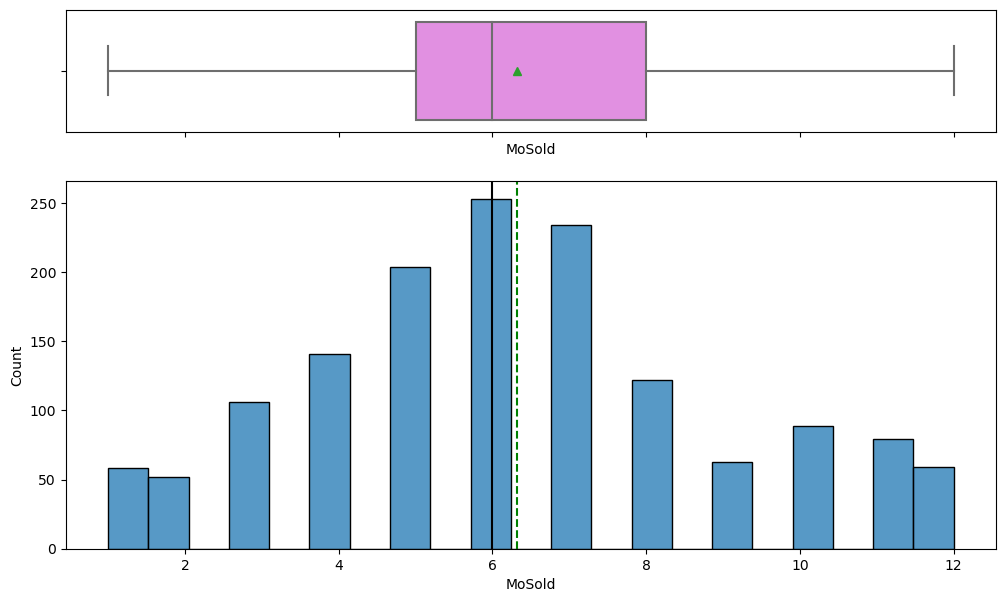

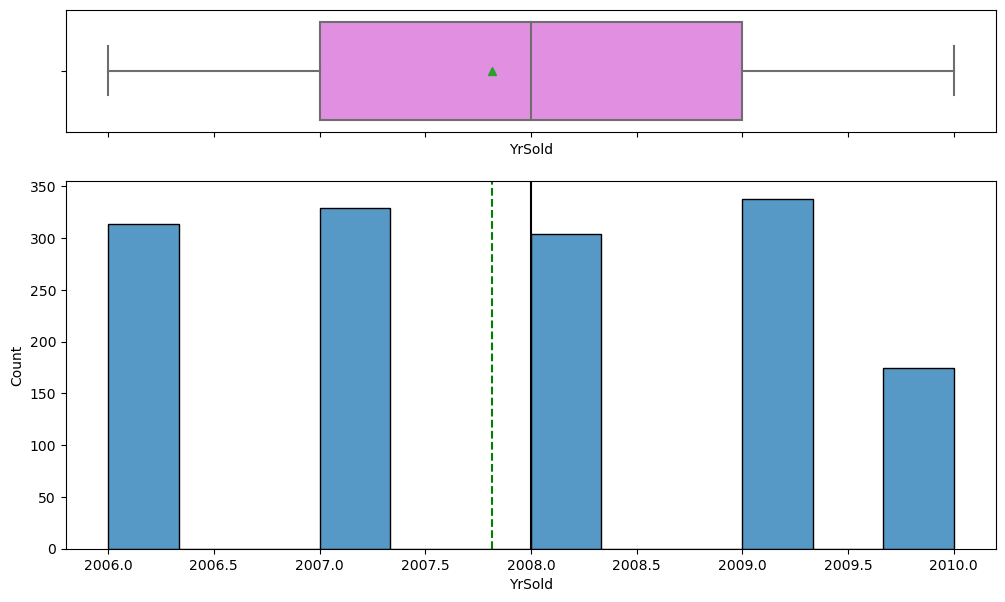

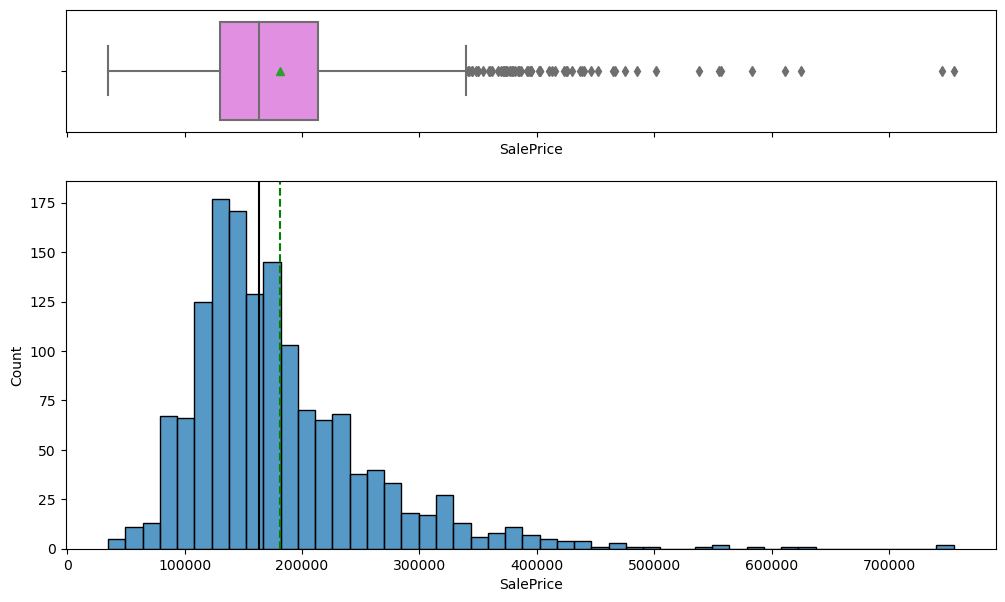

In [35]:
# First create a list for numerical columns from the training data:
numerical_columns_train = data._get_numeric_data().columns 
# Now print out the histogram and boxplot for every numerical columns
for item in data[numerical_columns_train]:
    histogram_boxplot(data,item)

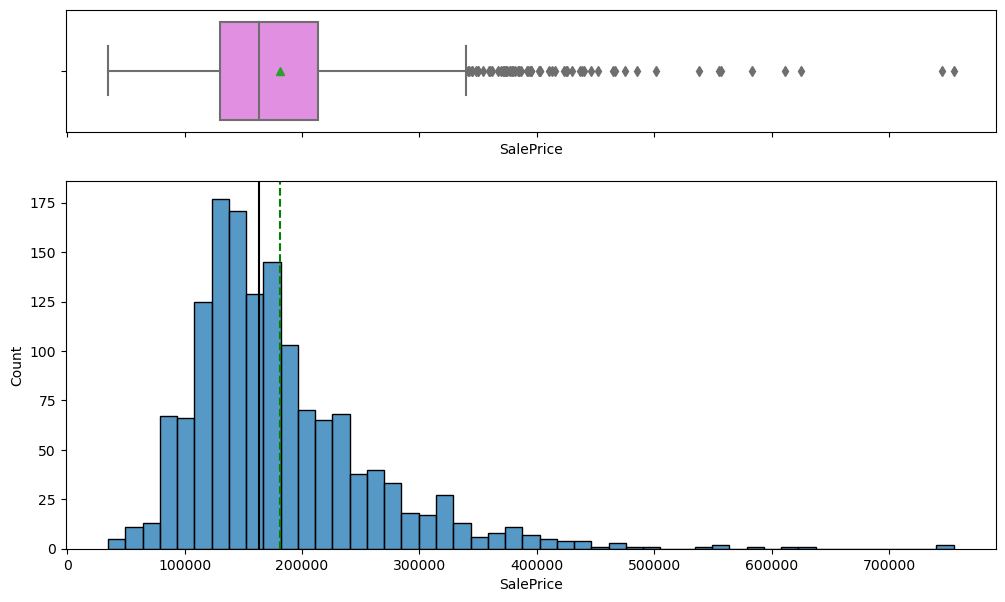

In [36]:
histogram_boxplot(data,"SalePrice")  # code to plot a boxplot and histogram for sale prices

#### Categorical data analysis

In [38]:
# function to create labeled barplots

def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=df,x=feature,palette="Paired", order=df[feature].value_counts().index[:n].sort_values(),)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label,(x, y),ha="center",va="center",size=12, xytext=(0, 5), textcoords="offset points",)  # annotate the percentage
    plt.show()  # show the plot

In [39]:
# Create a list for categorical columns from the training data
categorical_columns_train = data.select_dtypes(include=["object"]).columns.tolist()

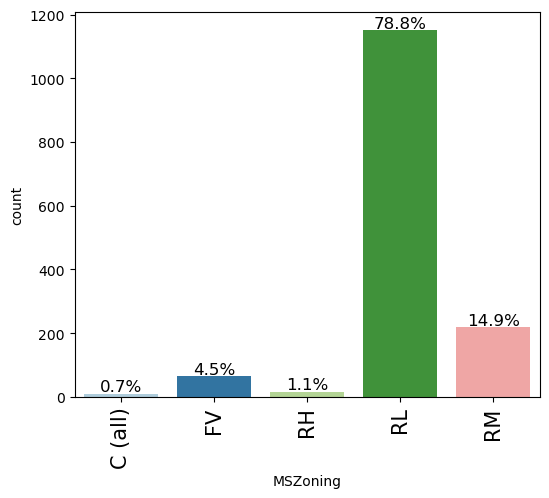

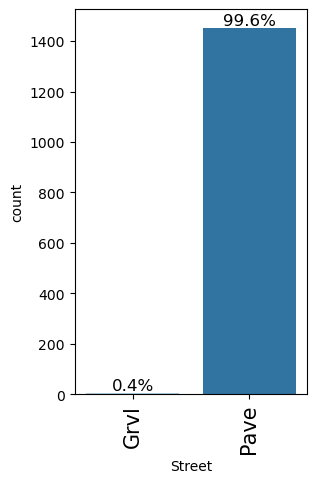

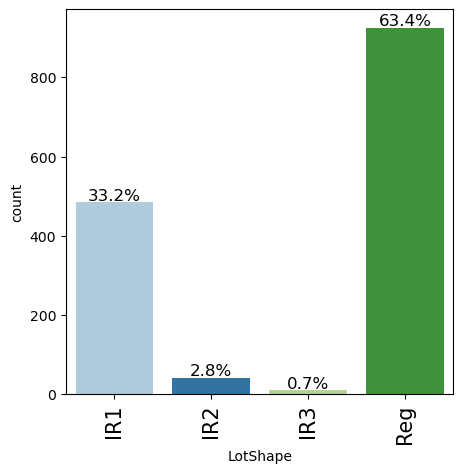

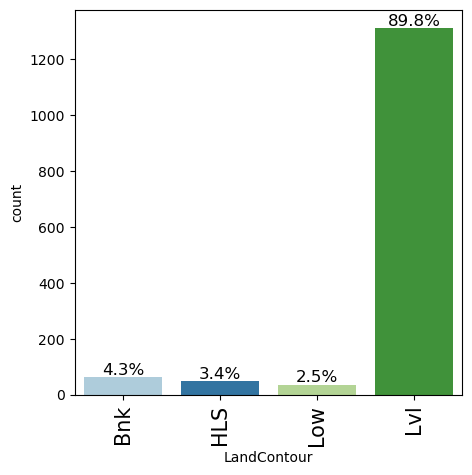

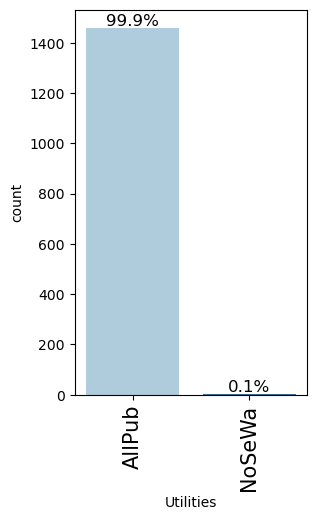

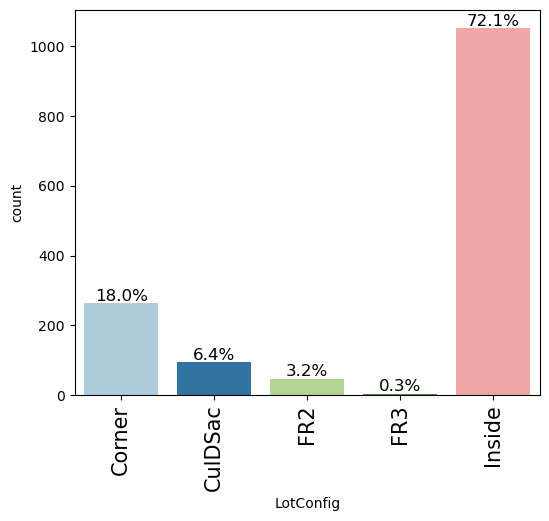

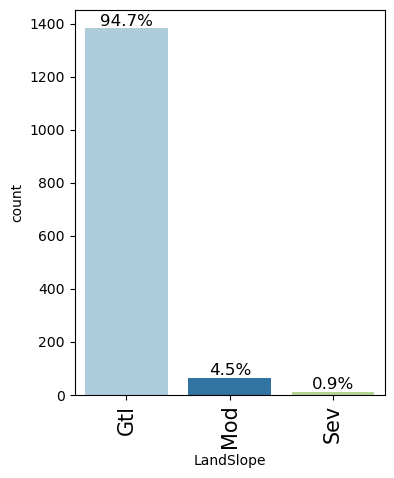

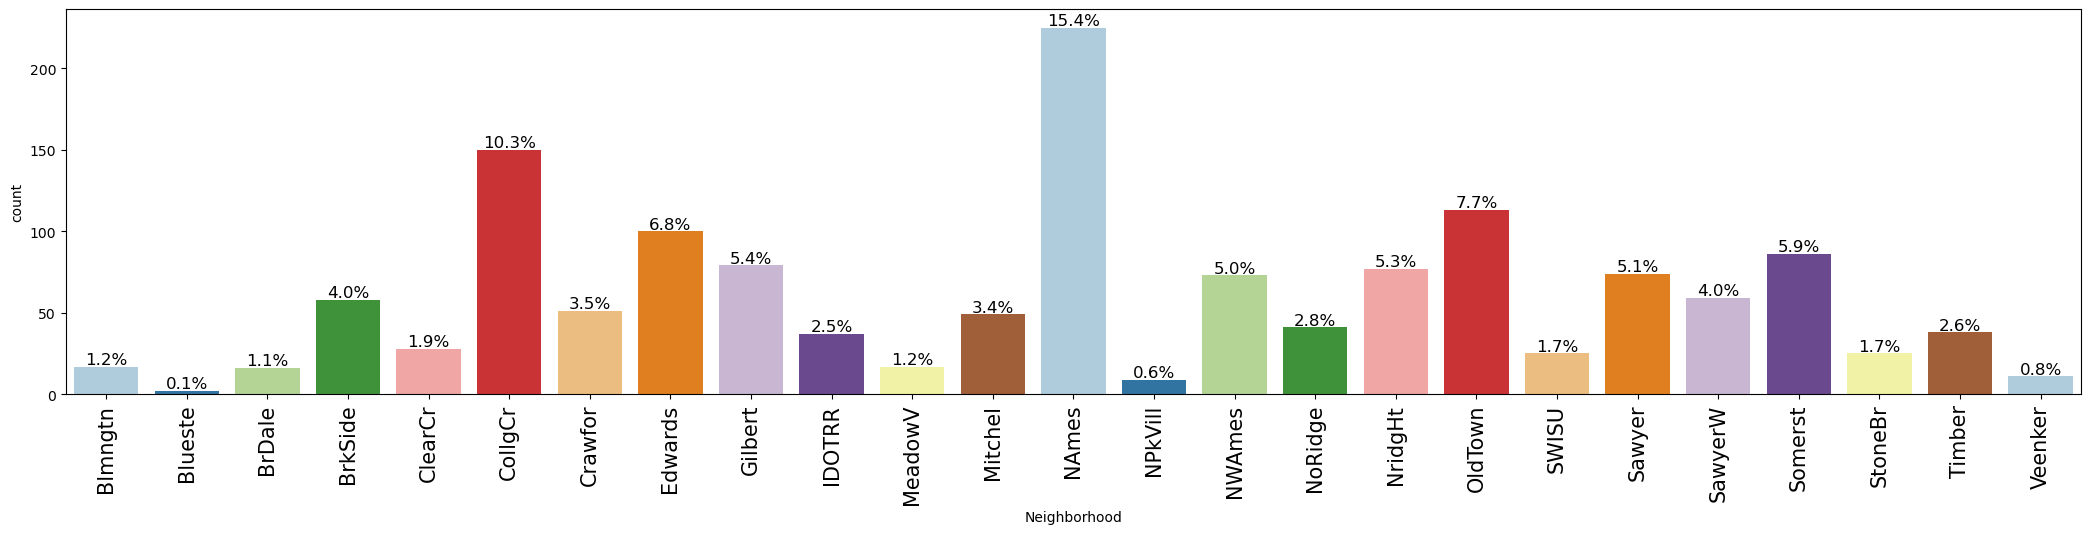

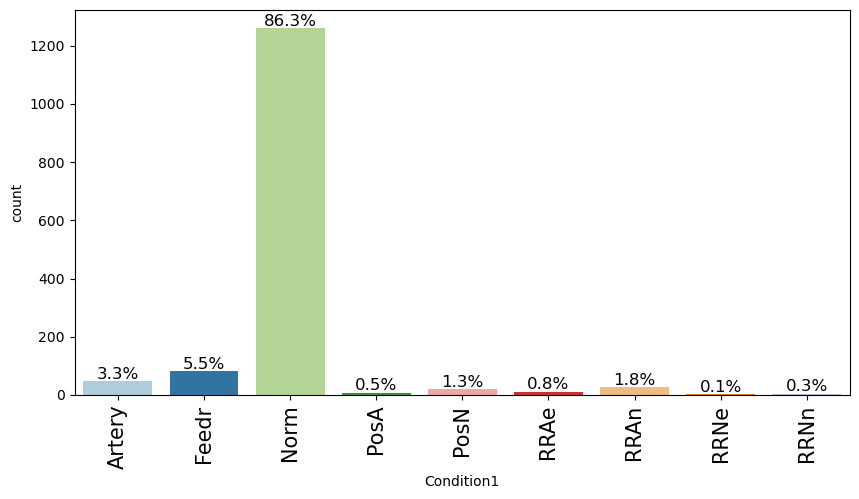

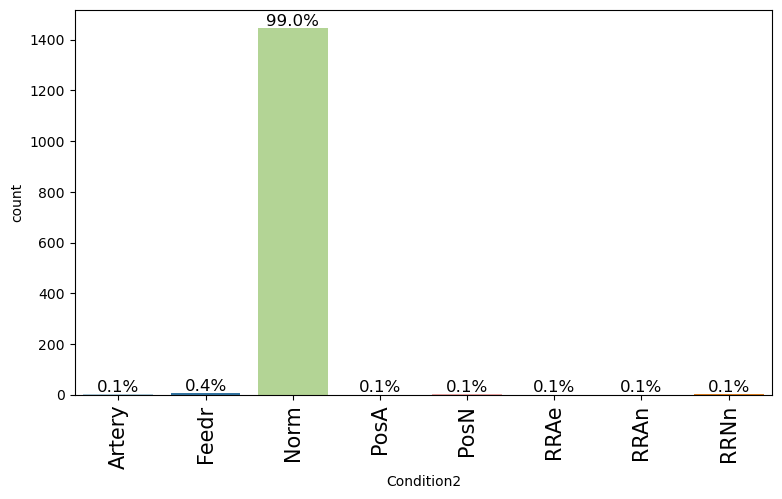

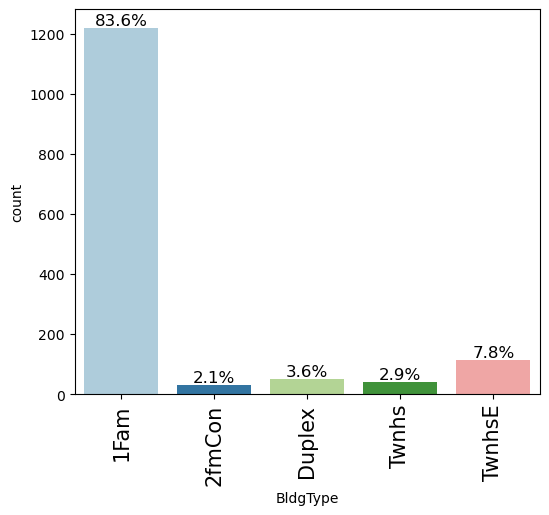

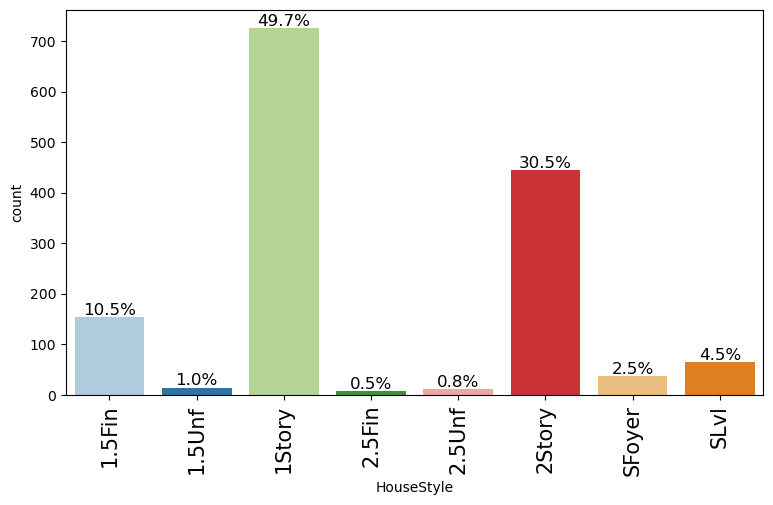

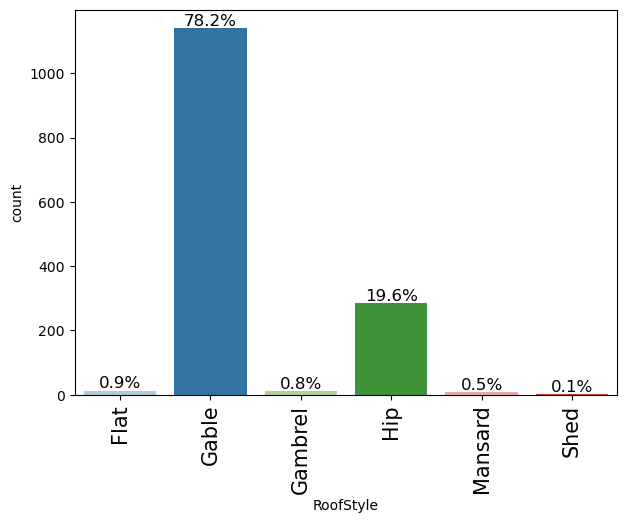

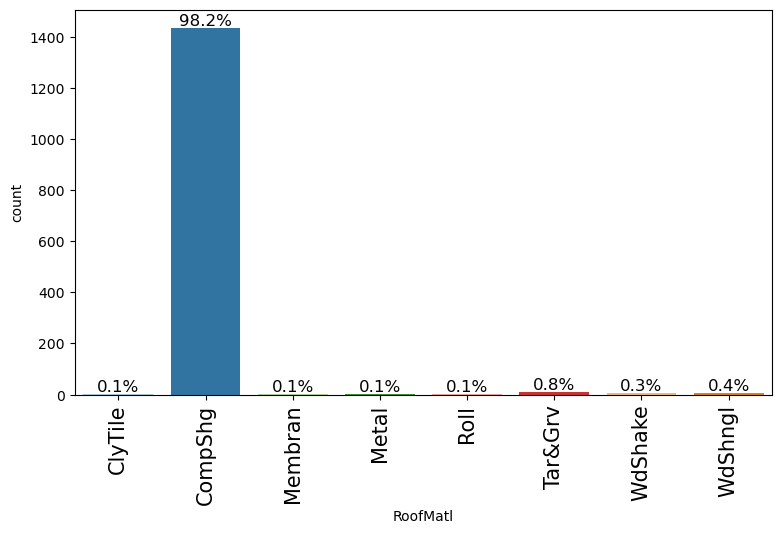

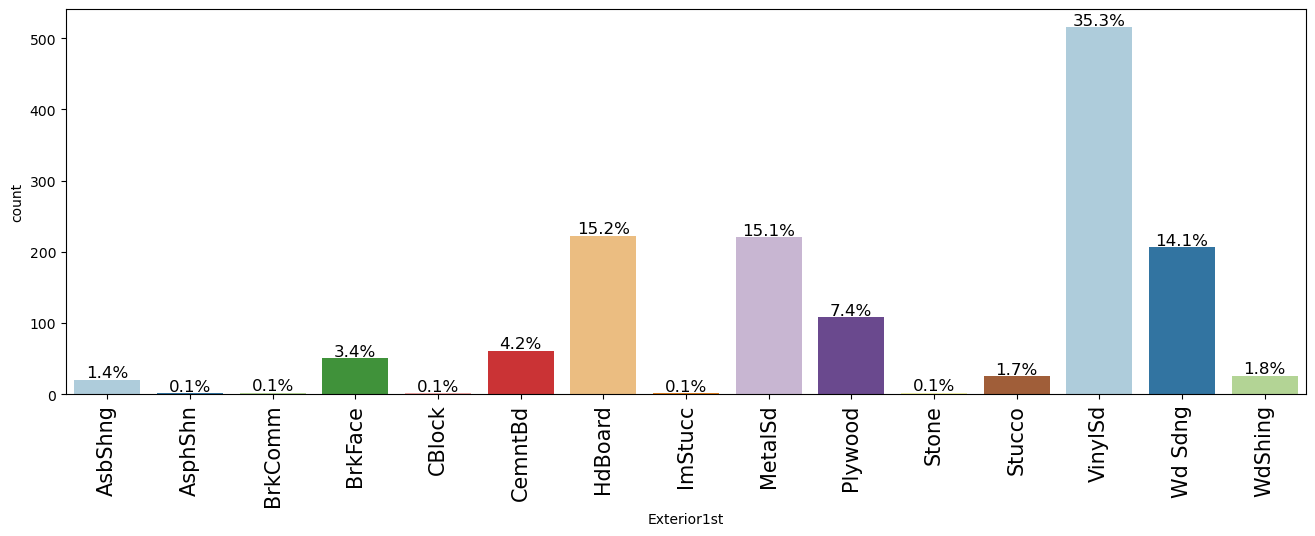

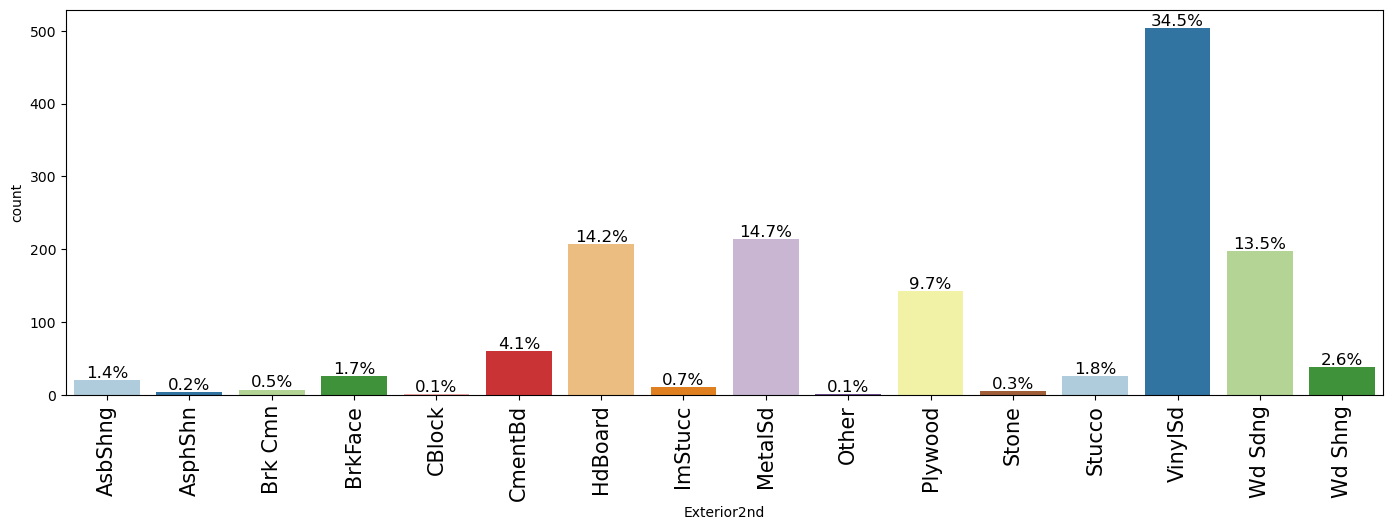

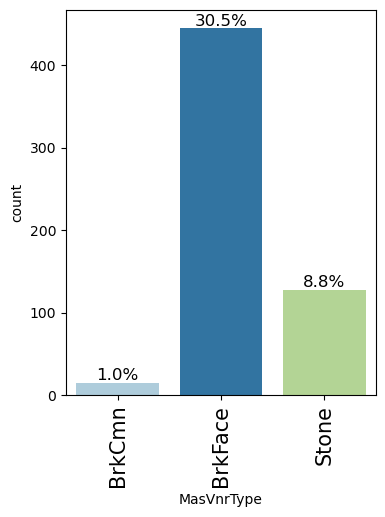

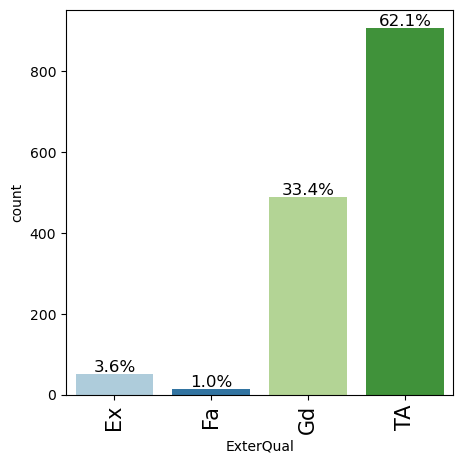

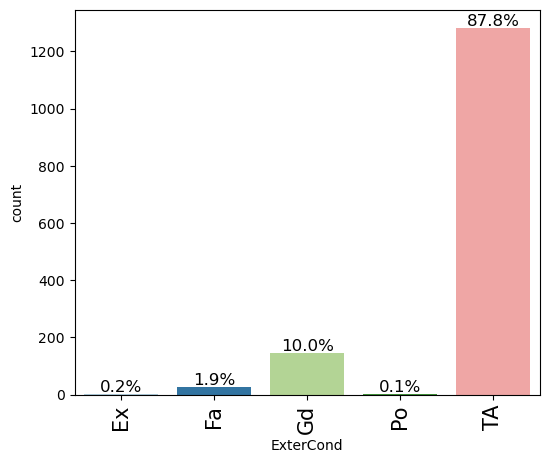

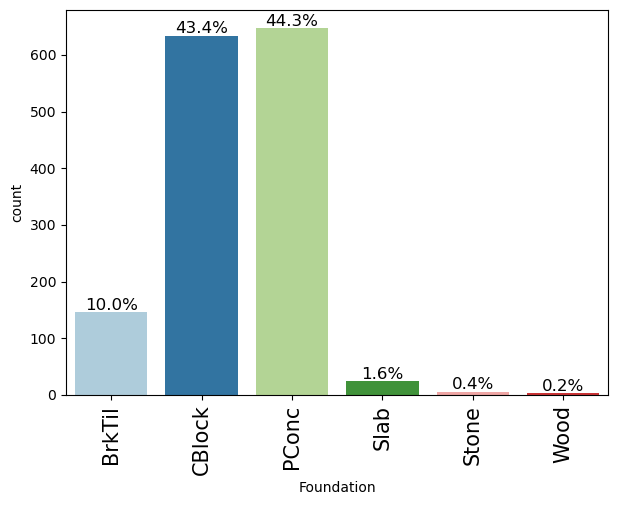

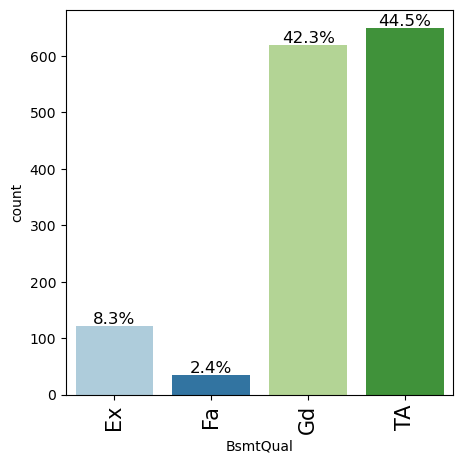

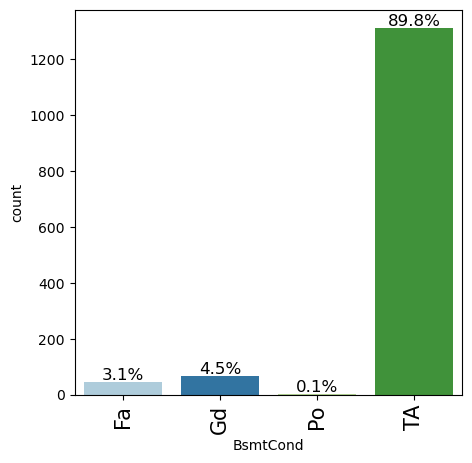

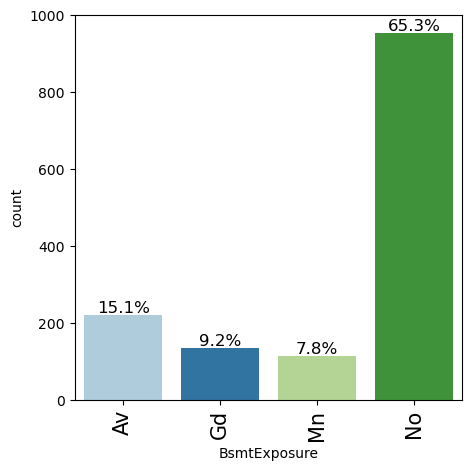

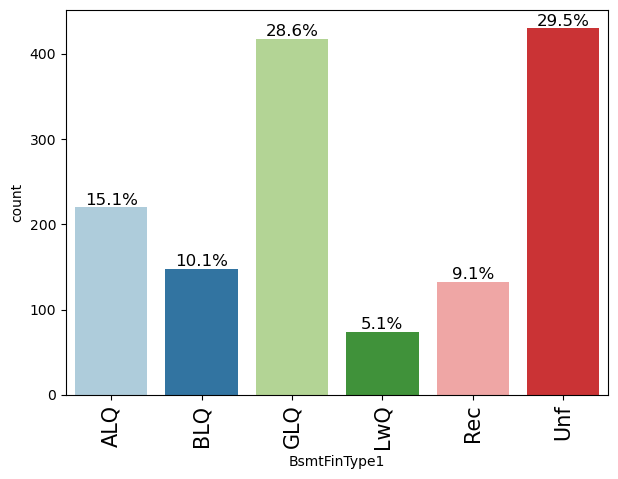

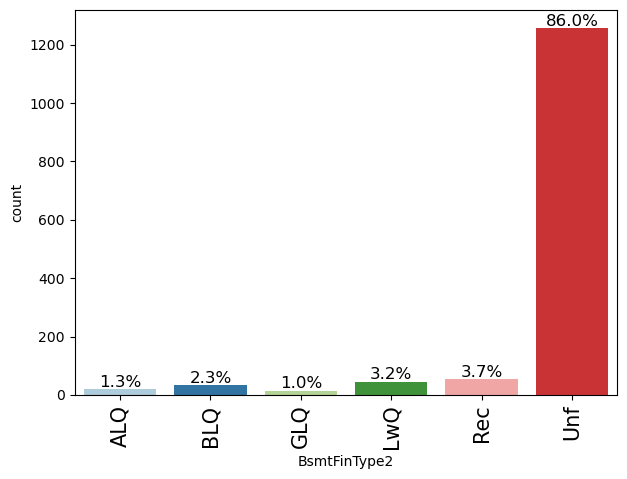

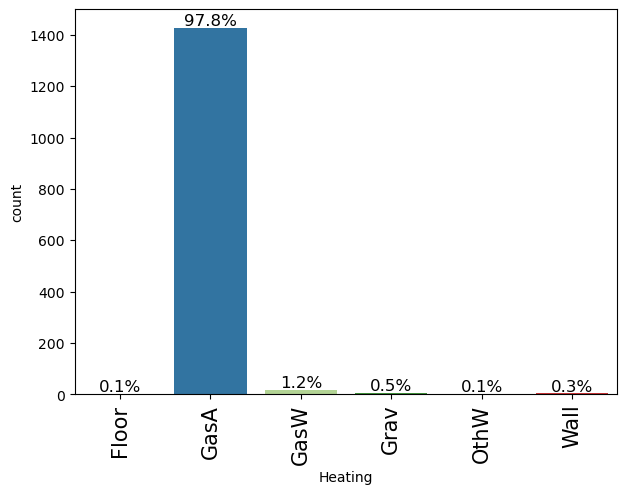

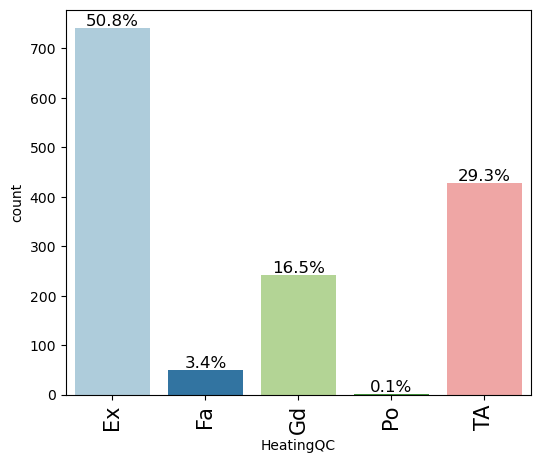

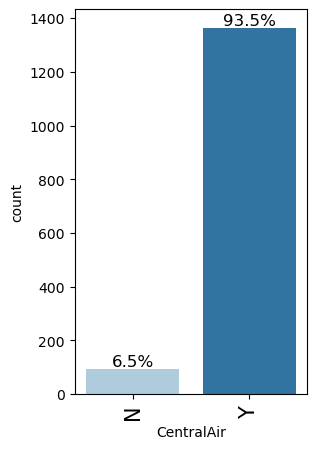

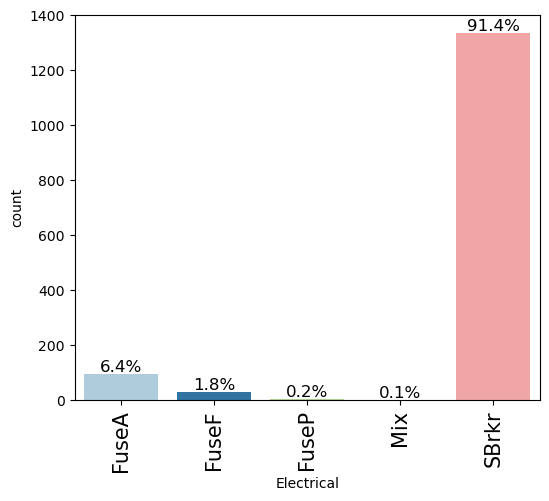

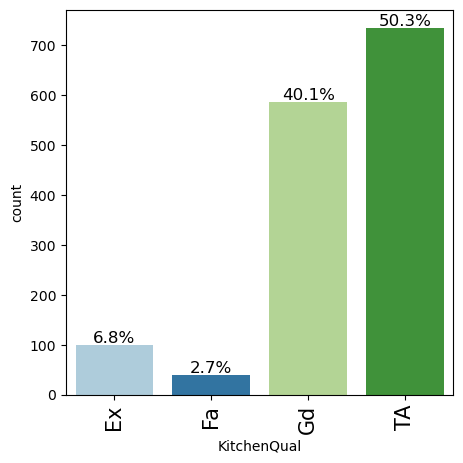

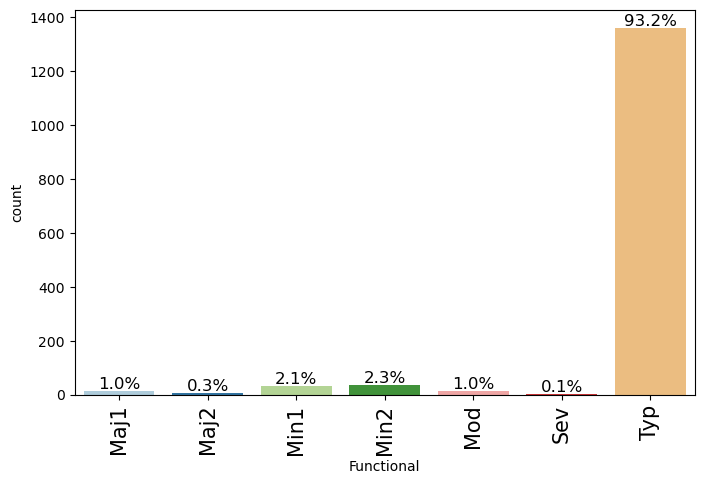

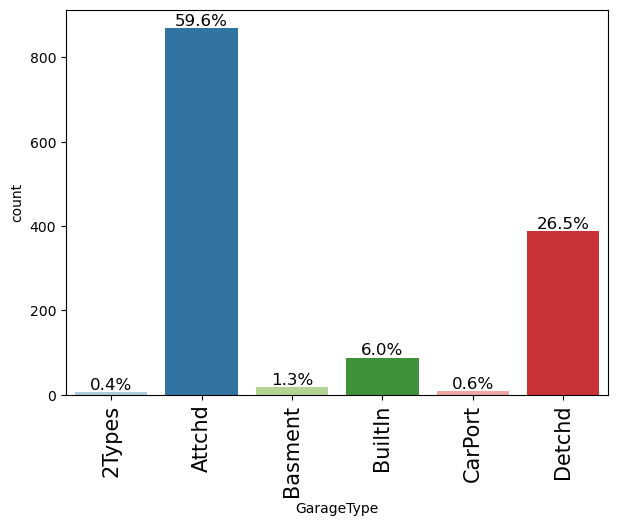

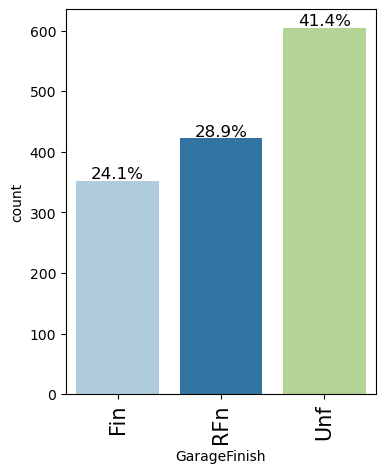

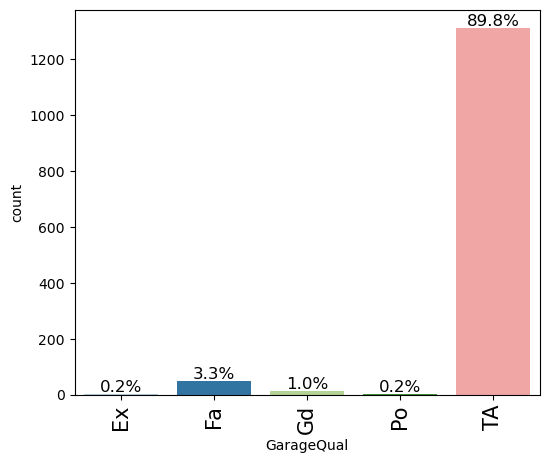

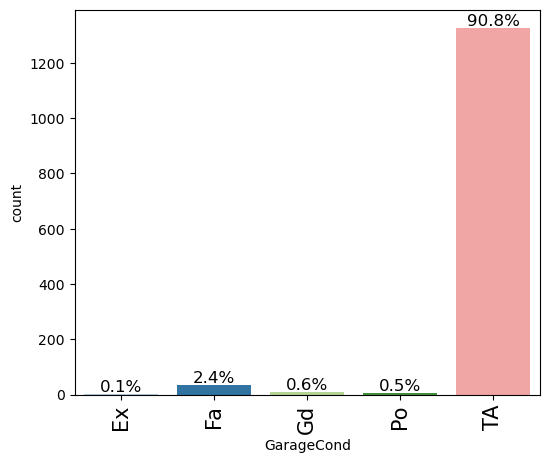

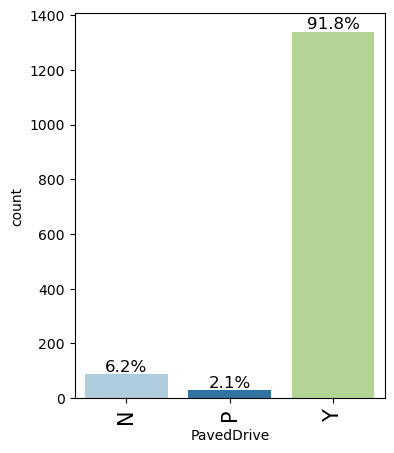

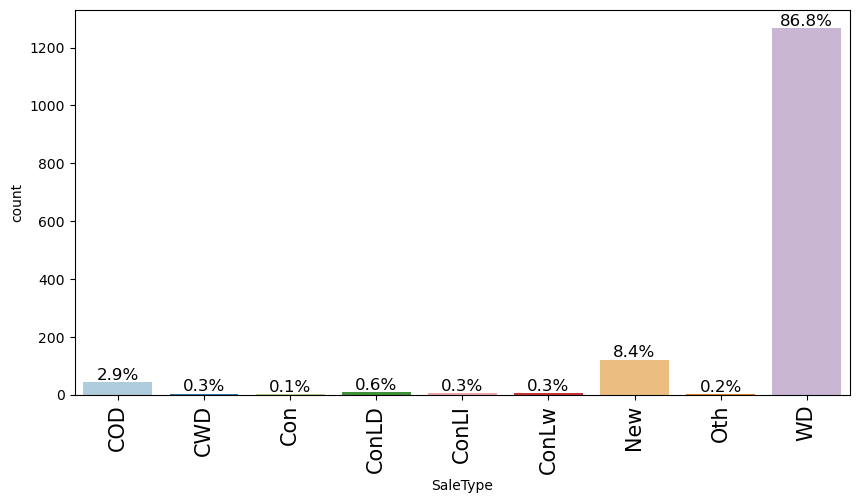

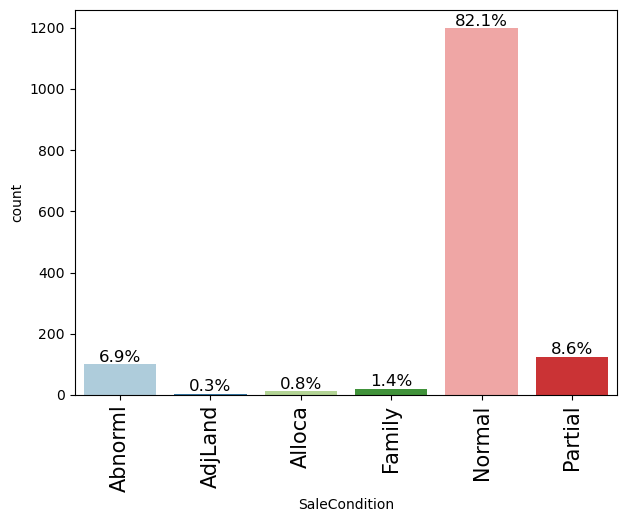

In [40]:
# Code to display barplots for categorical columns and include percentage per bar.
for feature in data[categorical_columns_train]:
         labeled_barplot(data,feature,perc=True)   

## Bivariate  data analysis

### Numerical bivariate data

### Correlation matrix analysis: heat map

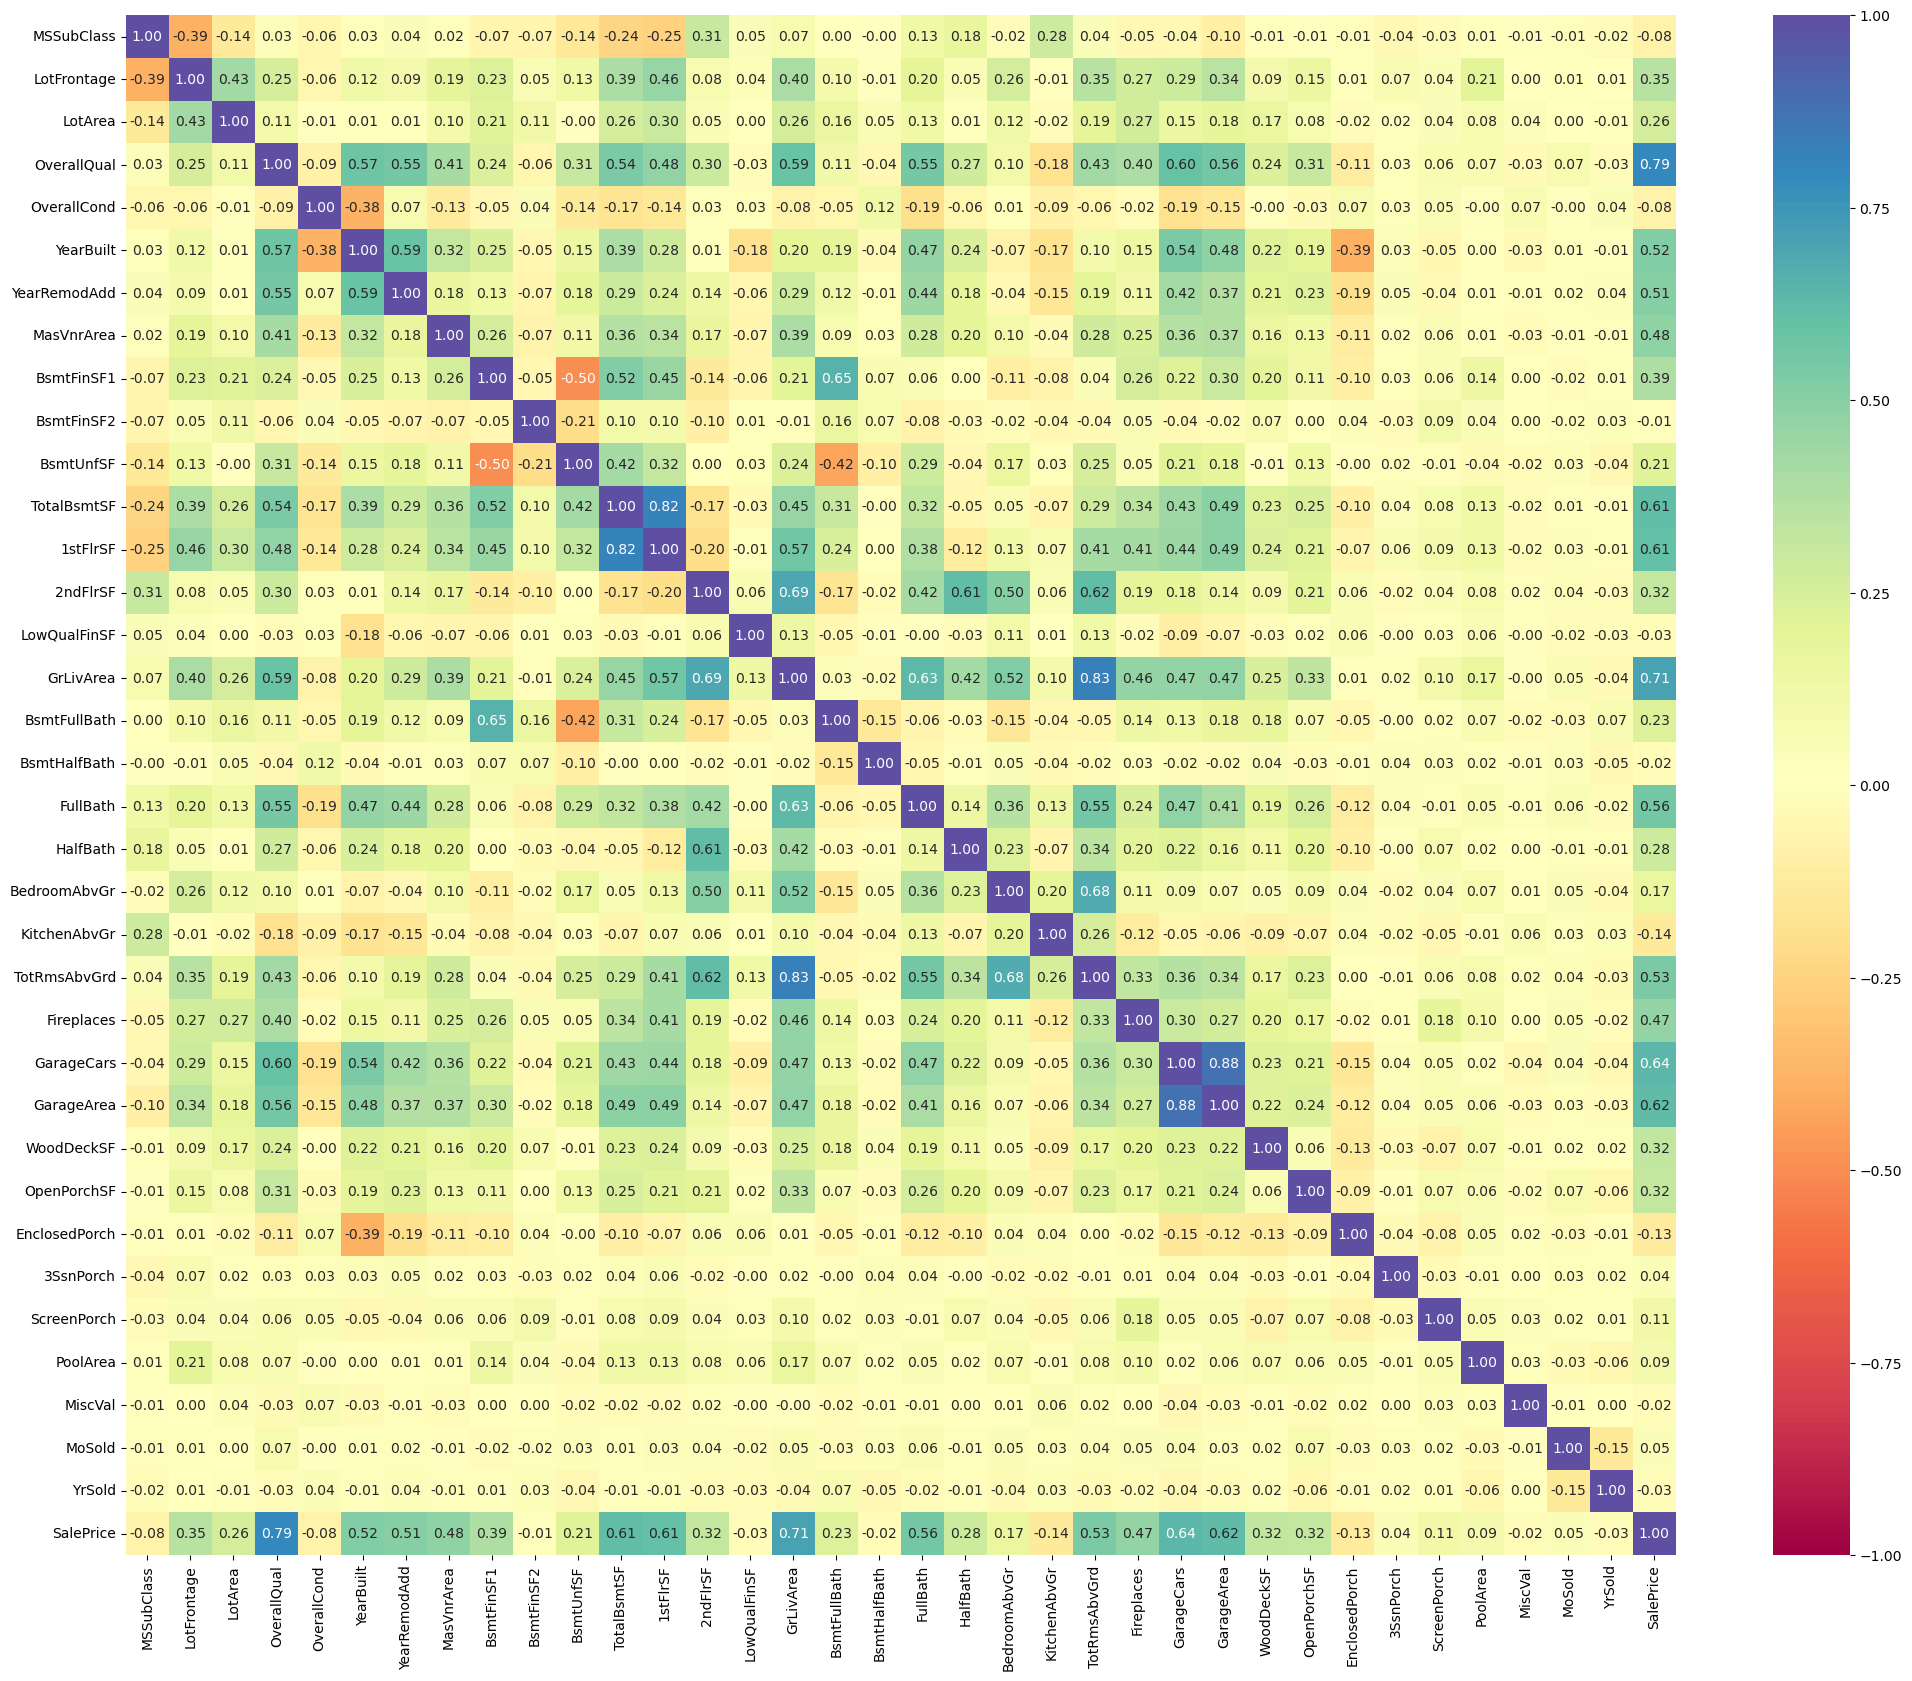

In [42]:
# Code to display the correlation matrix for numerical data
plt.figure(figsize=(25,20))
sns.heatmap(data[numerical_columns_train].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observation:
* Approximately 60% of the independent variables are positively correlated with the sale price.
* However most of the independent variables shows no correlation to each other.
* The ground living area and Total rooms above grade show a strong positive correlation of 0.83. 
* Garage year built and year built shows also a strong positive correlation of 0.83
* There is no much evidence for the presence of multicollinearity between independent variables. <br>
* Multicollinearity issues can still be checked and treated.
* However correlation does not  imply causation.

###  lm plots between the sale price and independent variables

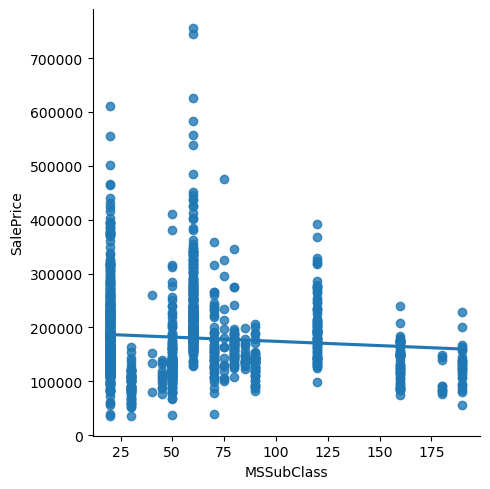

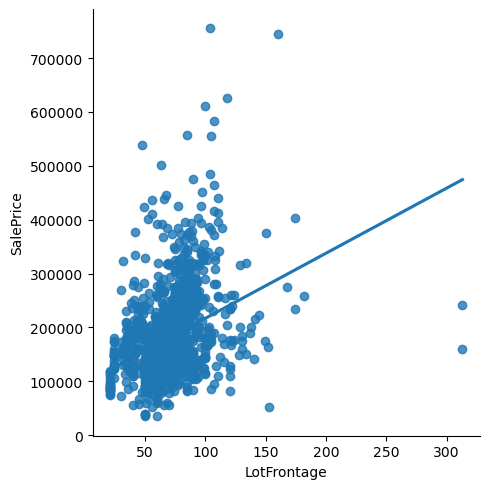

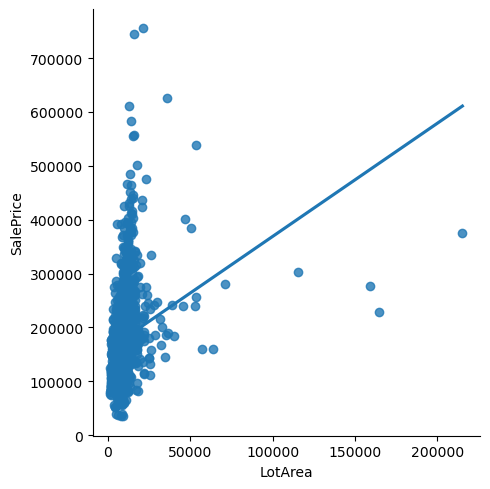

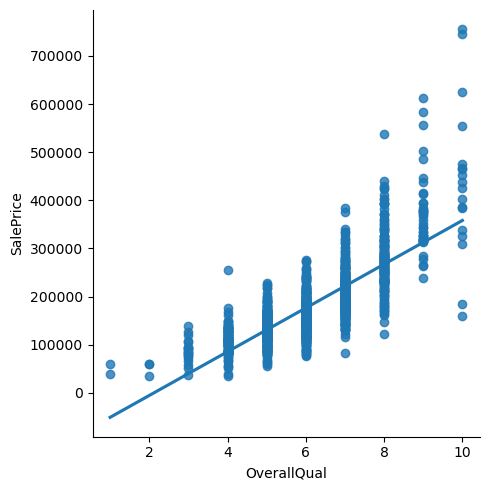

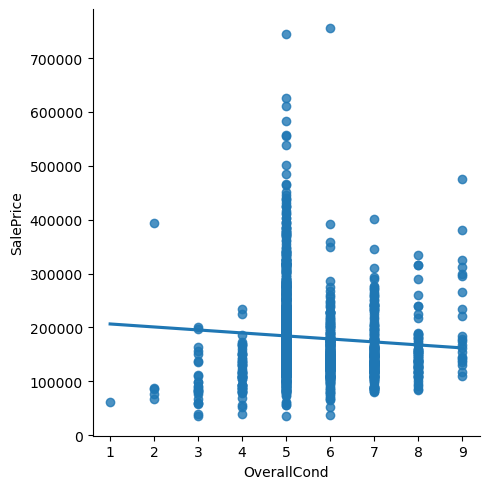

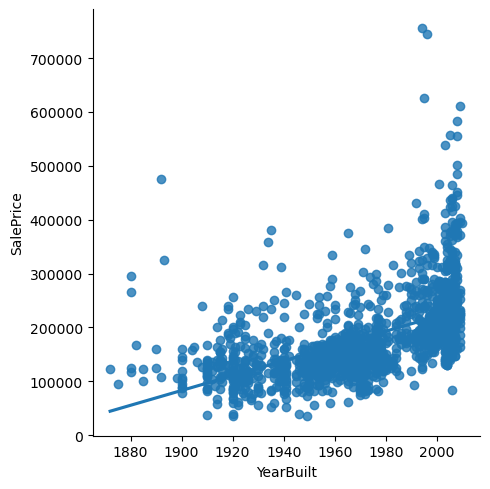

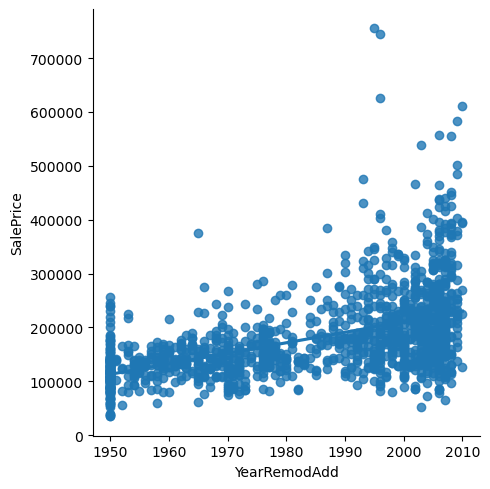

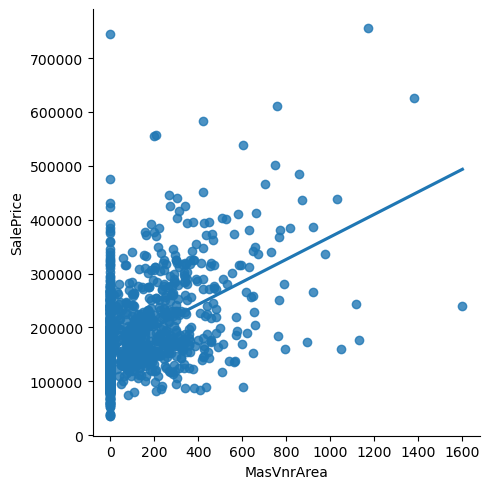

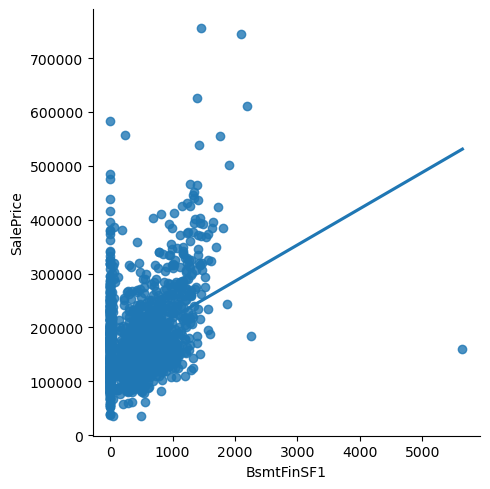

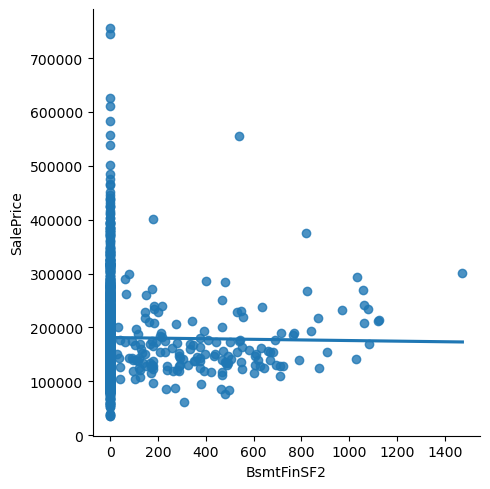

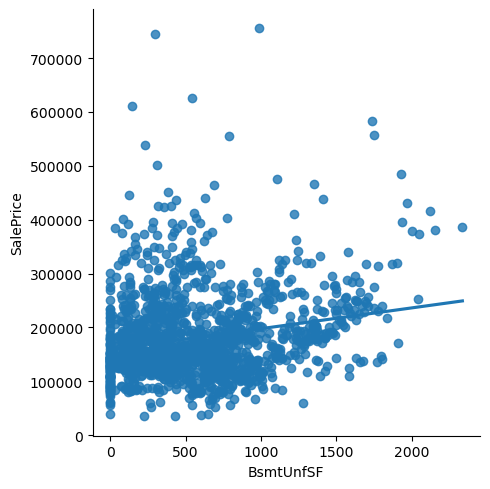

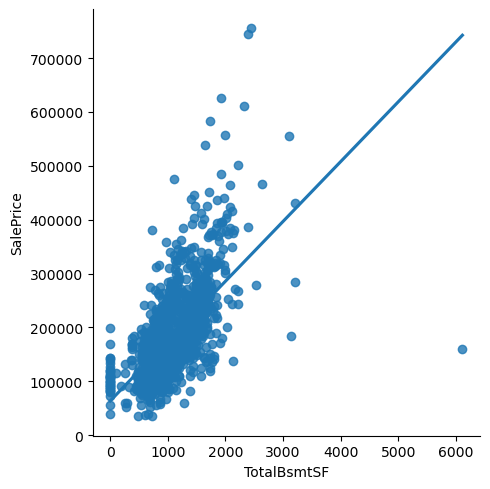

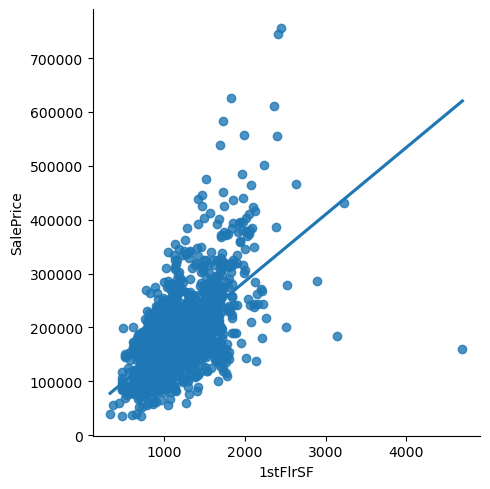

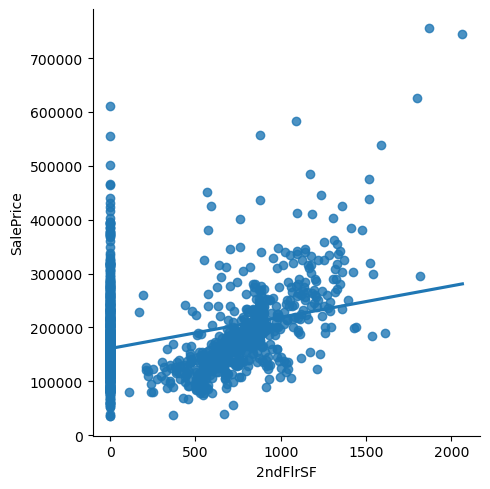

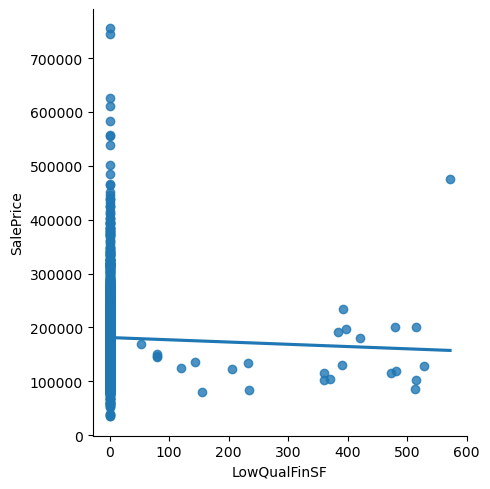

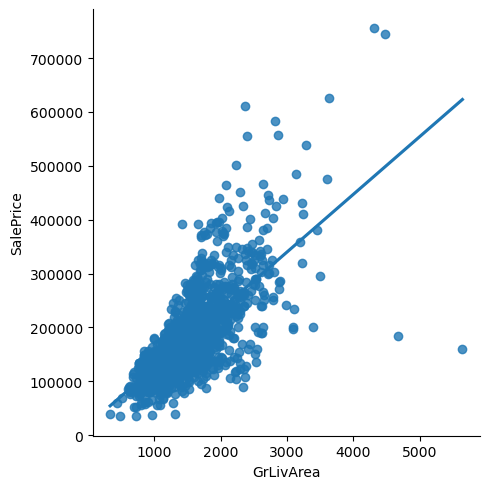

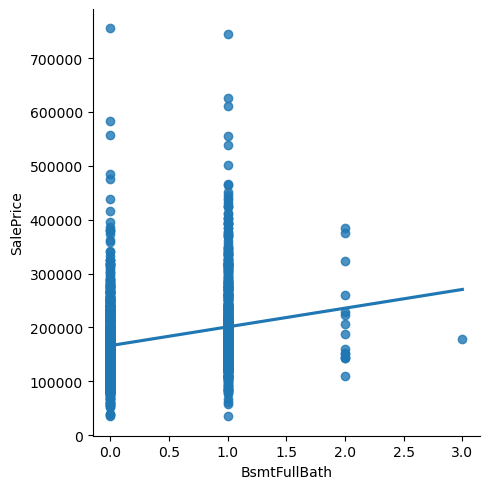

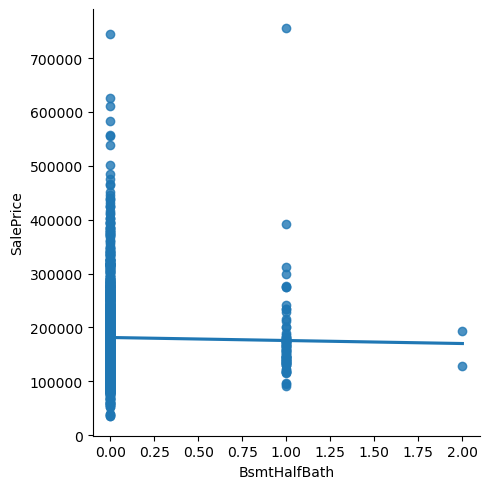

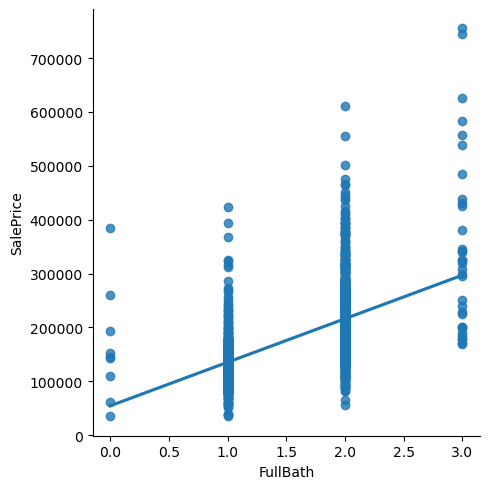

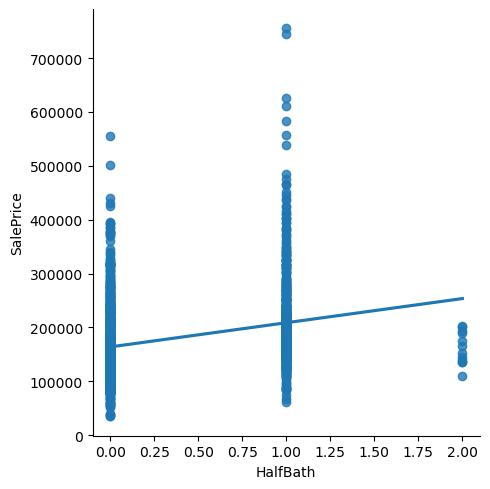

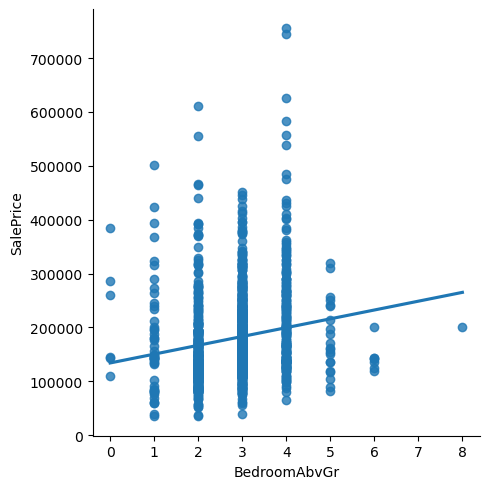

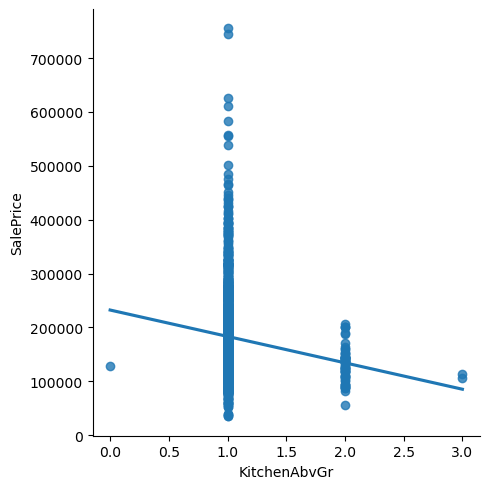

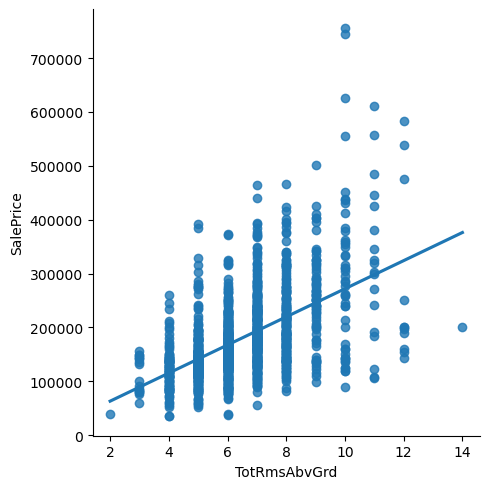

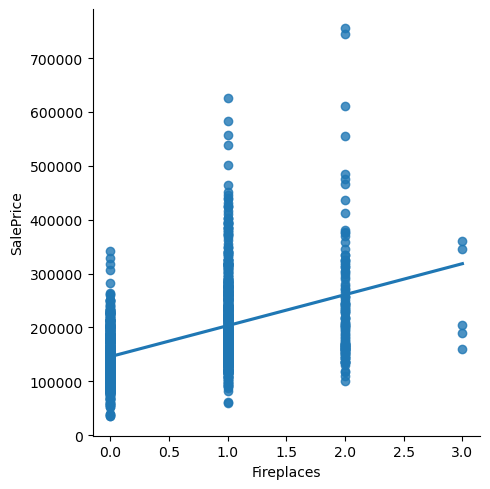

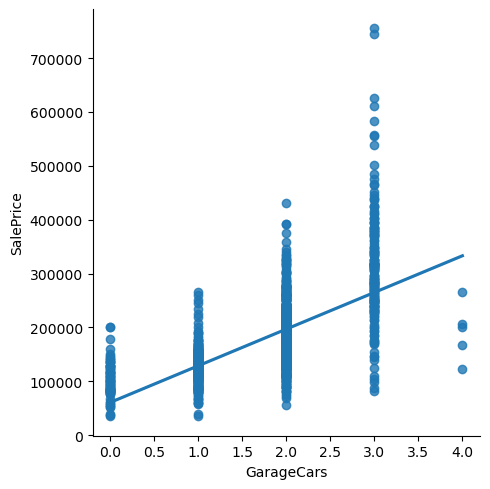

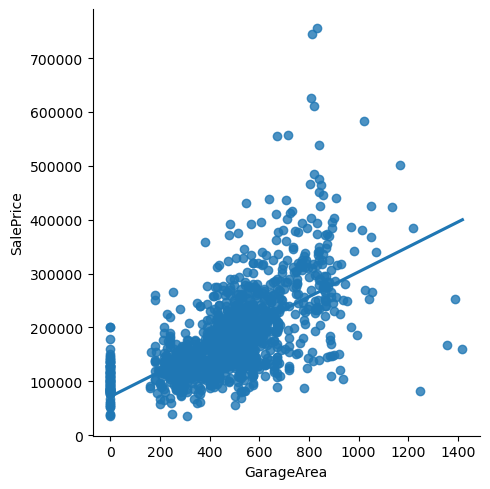

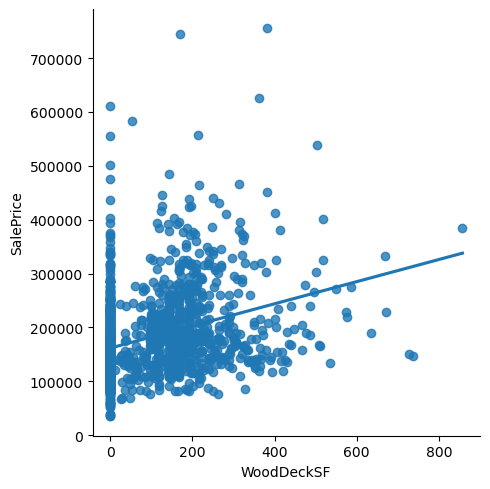

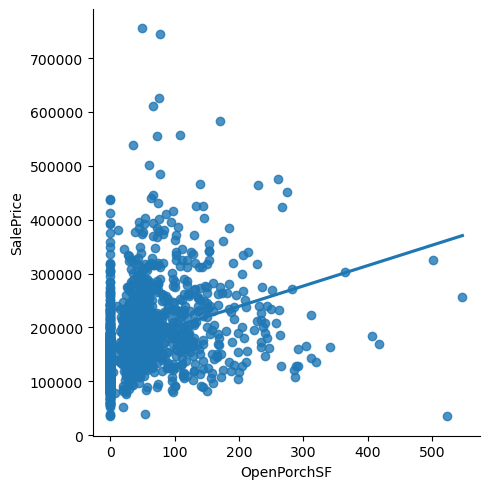

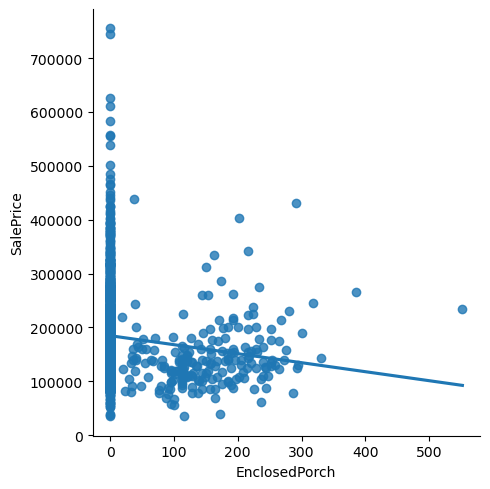

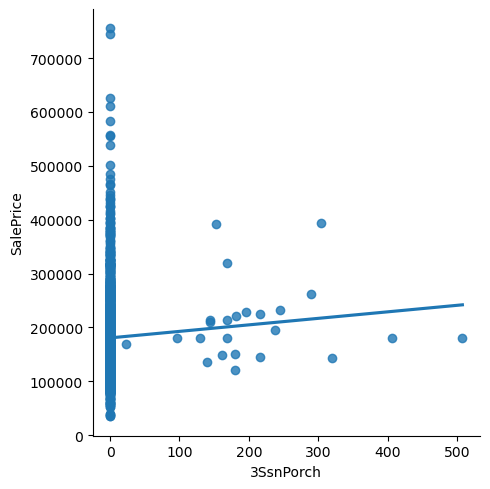

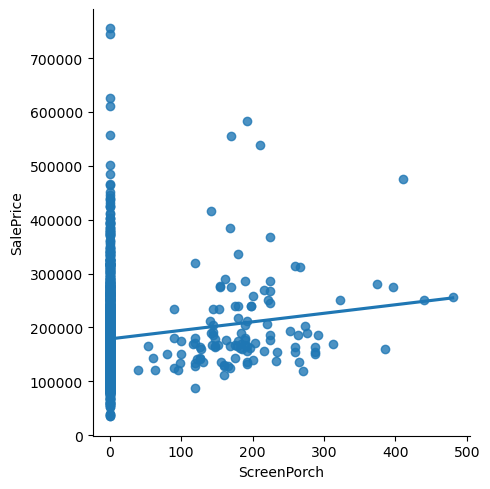

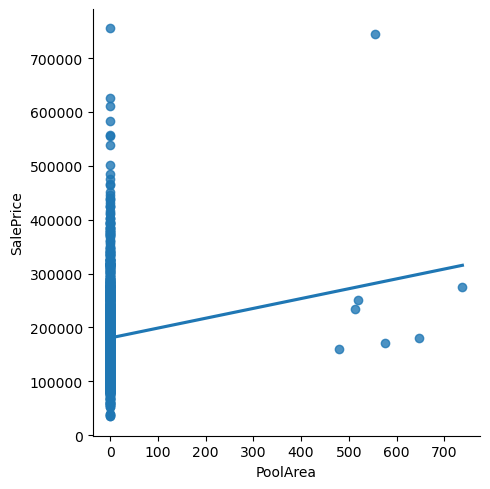

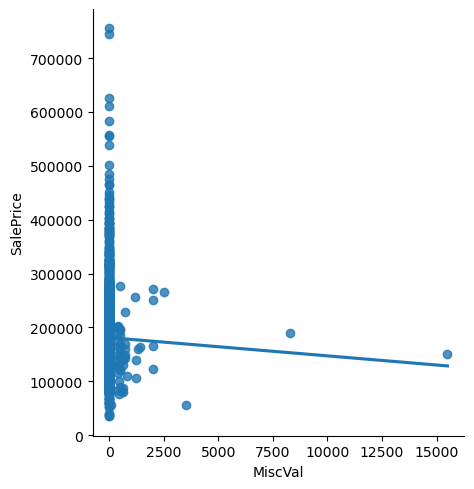

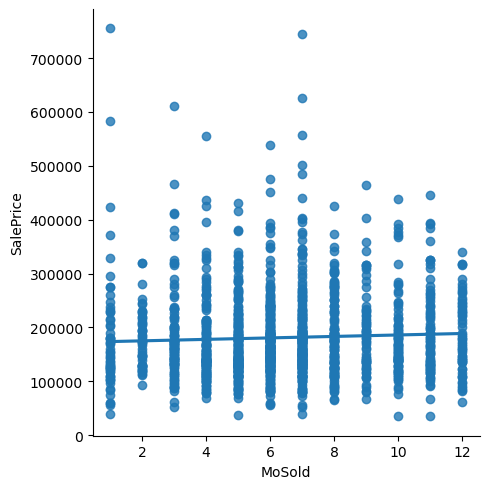

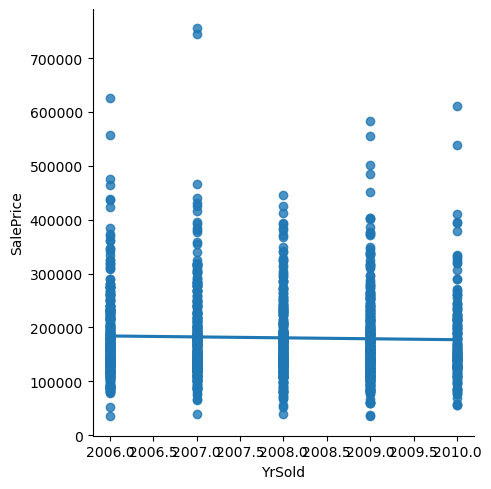

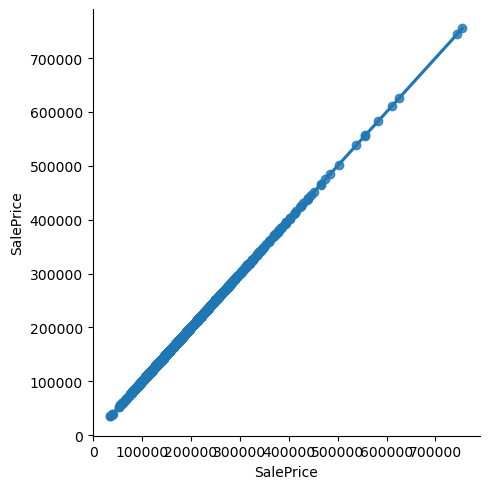

In [43]:
for item1 in numerical_columns_train:
    sns.lmplot(data=data,y="SalePrice",x=item1,ci=False);
   # plt.title(f"The Joint plot between  Sale price and {item}")

### Numerical and categorical data

In [44]:
def boxplots(data,item,feature):
    """"
    data: dataframe
    item : sale price column
    feature: categorical independent variables
    figsize: to give the boxplot the size
    """
    plt.figure(figsize=(15,7))
    sns.boxplot( data=data, x=item,y=feature, showmeans=True, palette = "Paired_r")
    plt.title(f"Boxplot for sale price and {feature}")
    plt.xlabel("Sale price")
    plt.ylabel(feature)
    

In [45]:
item= data["SalePrice"]

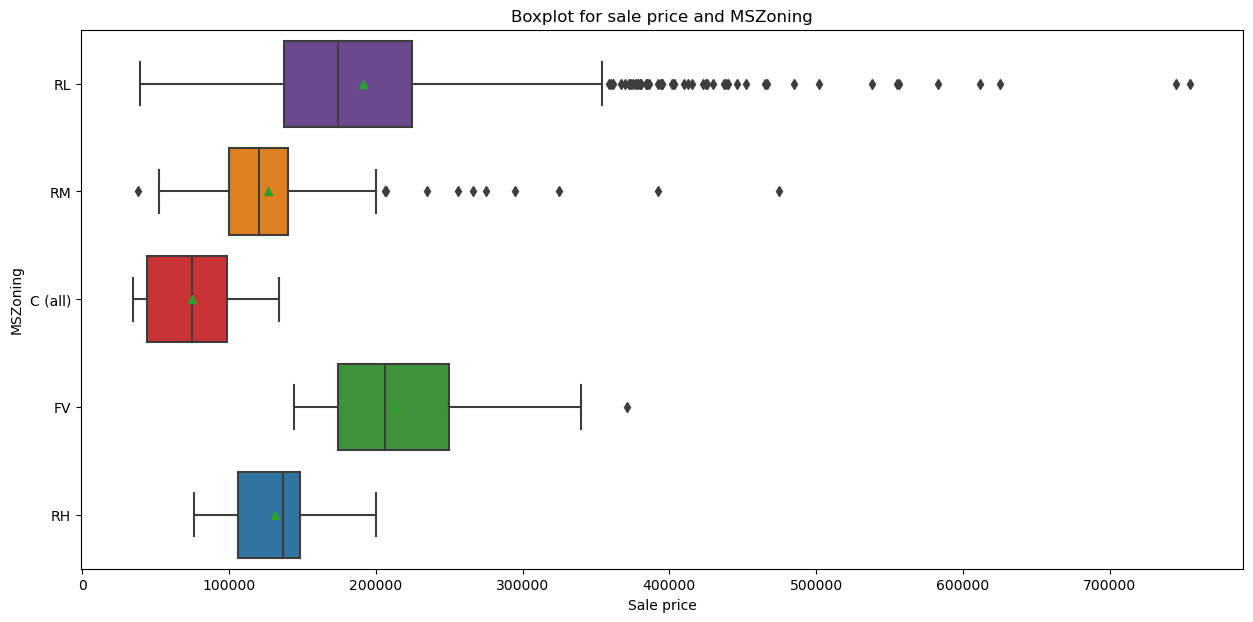

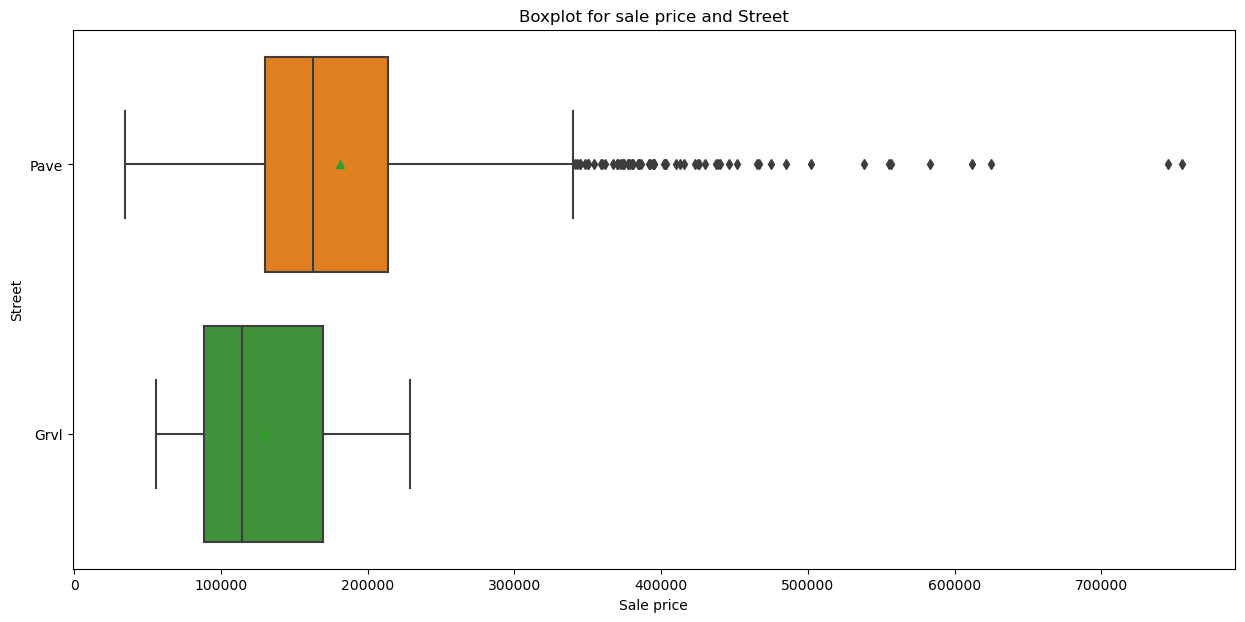

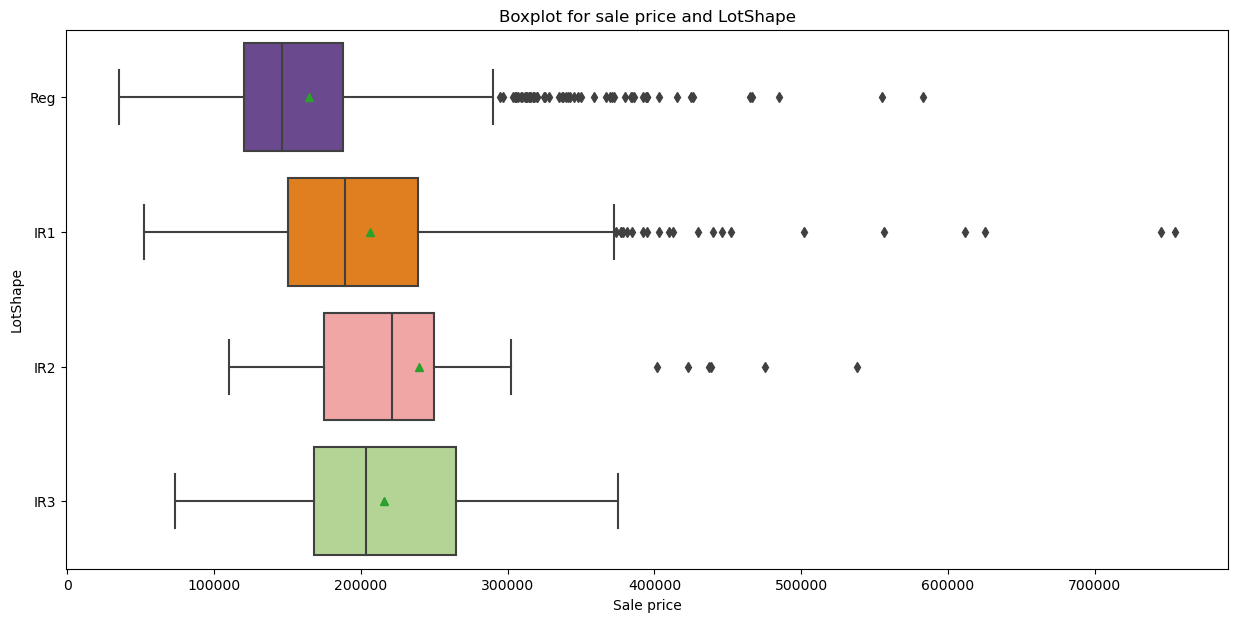

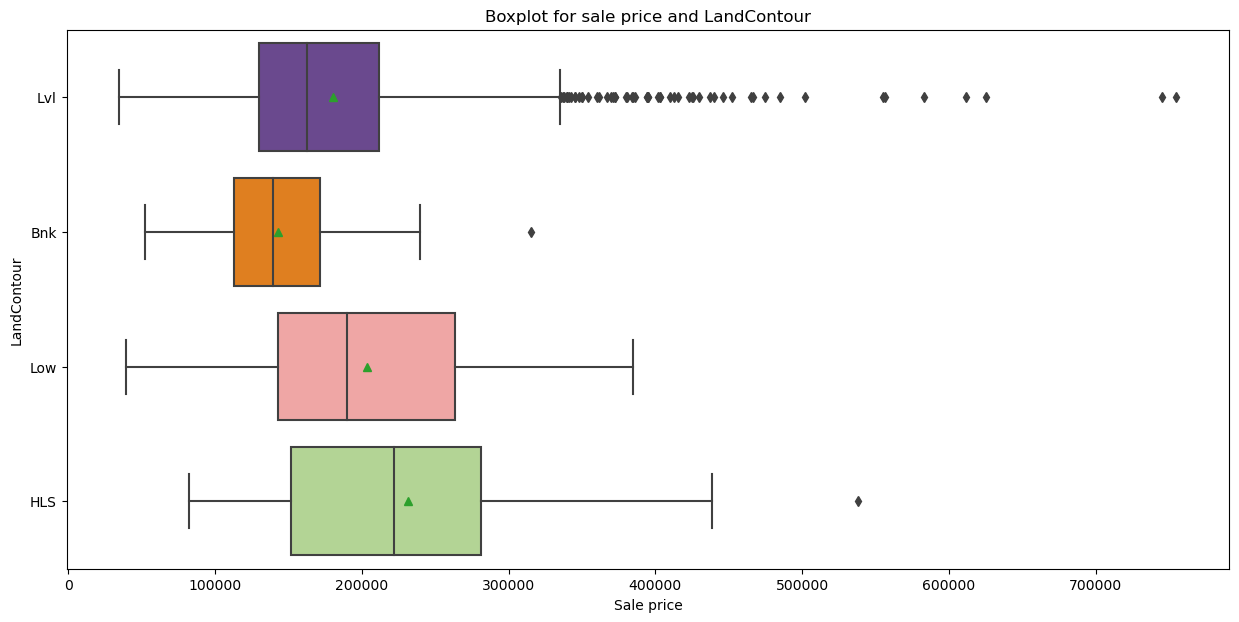

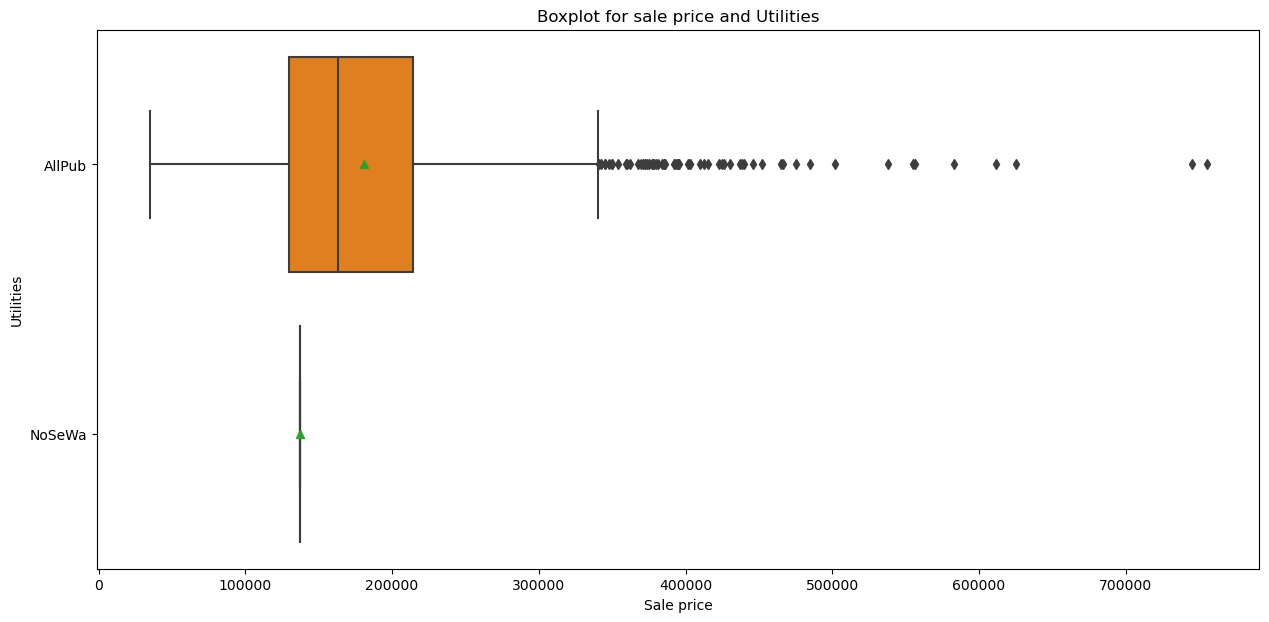

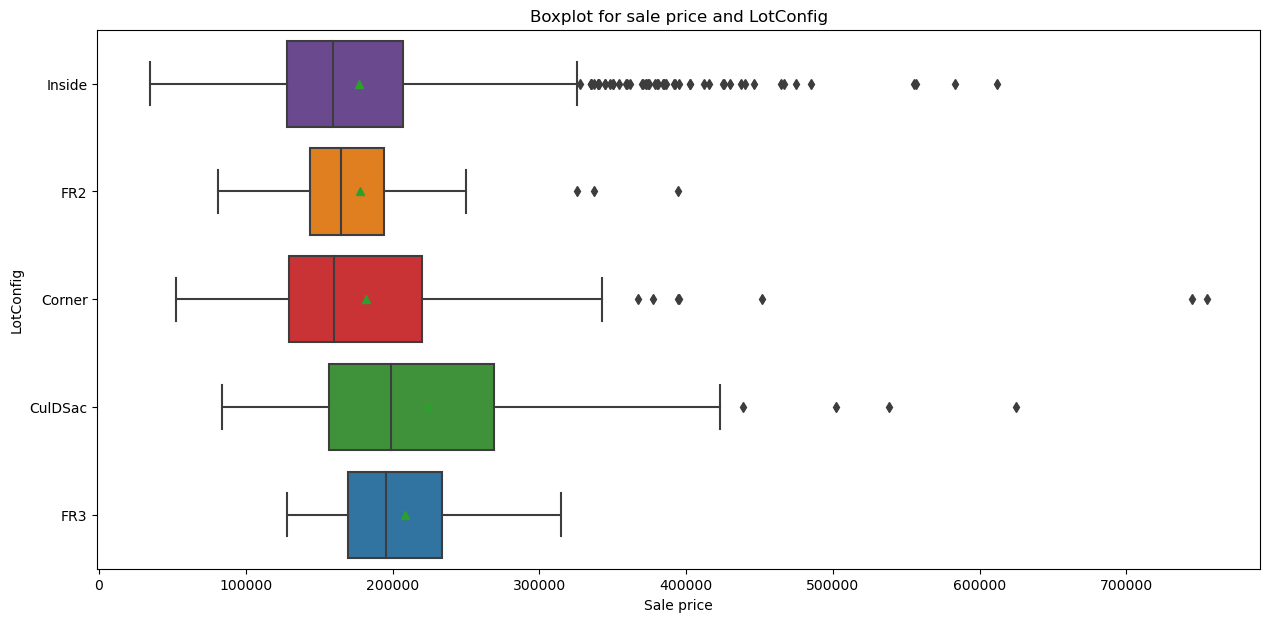

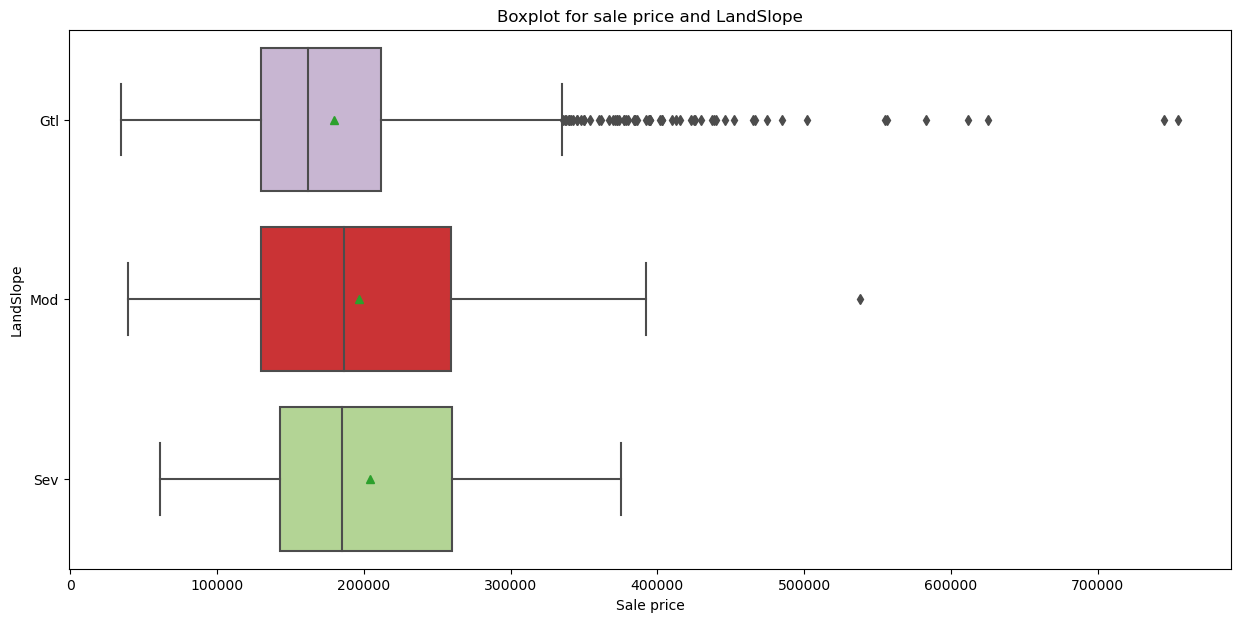

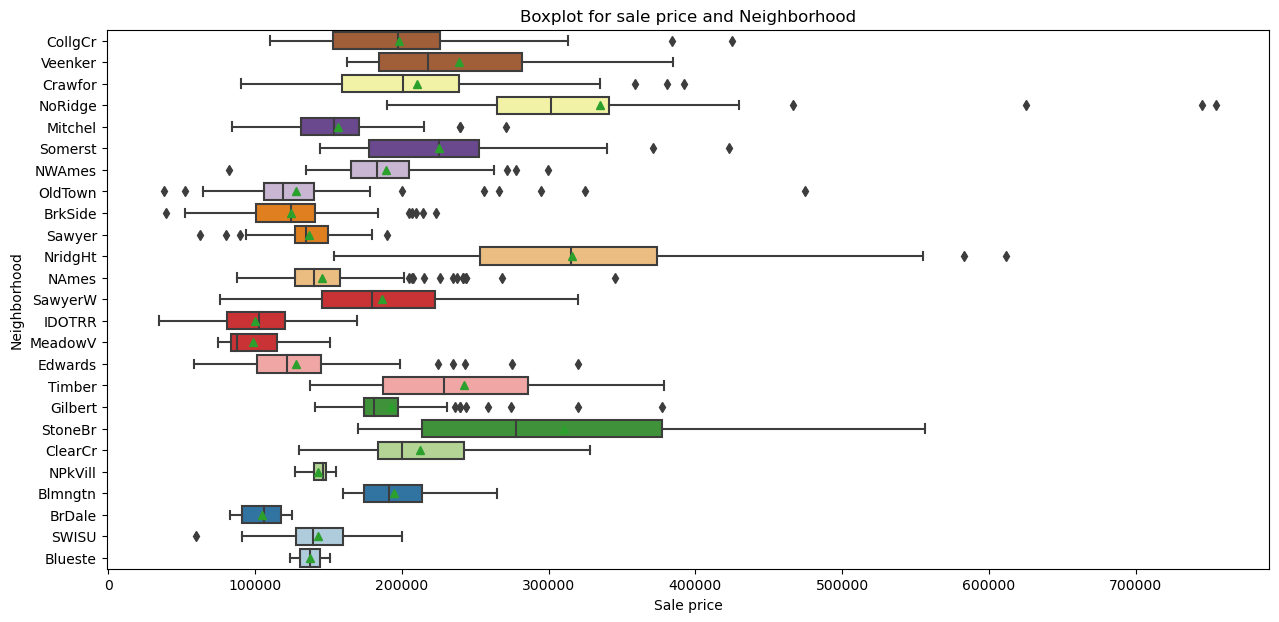

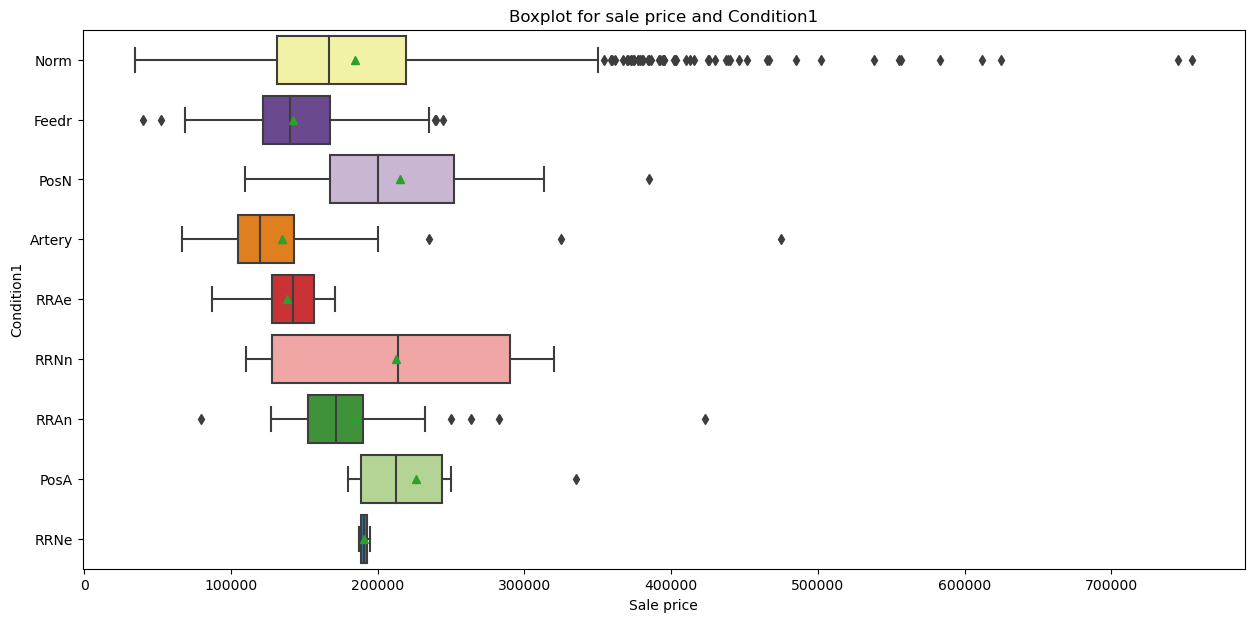

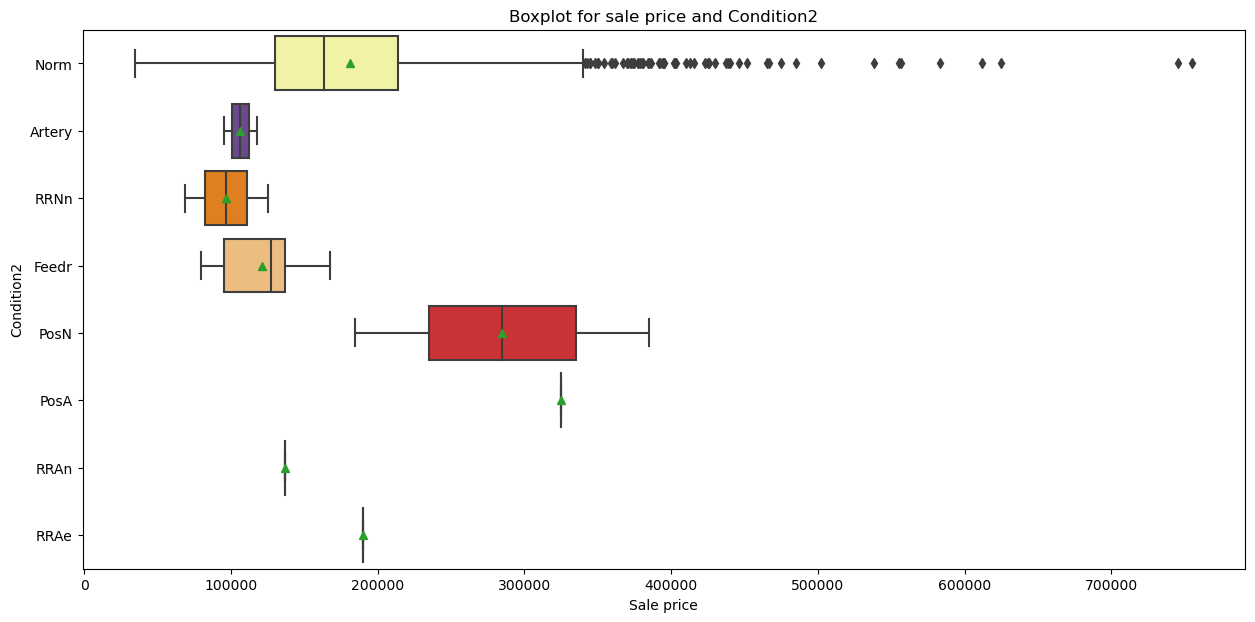

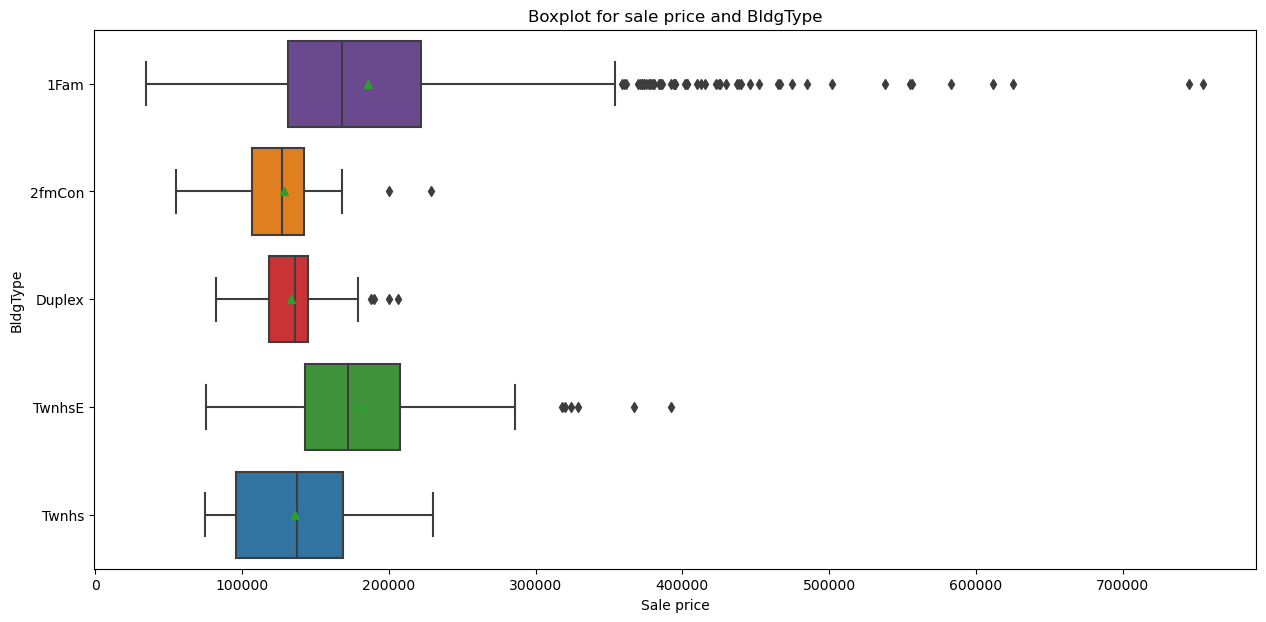

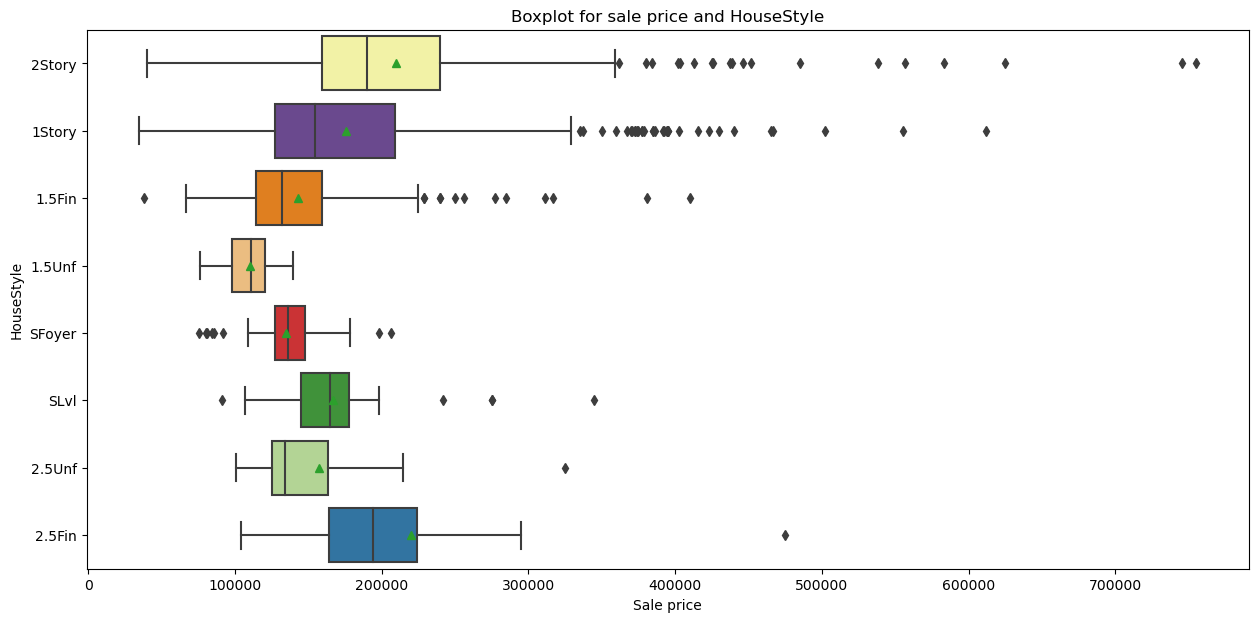

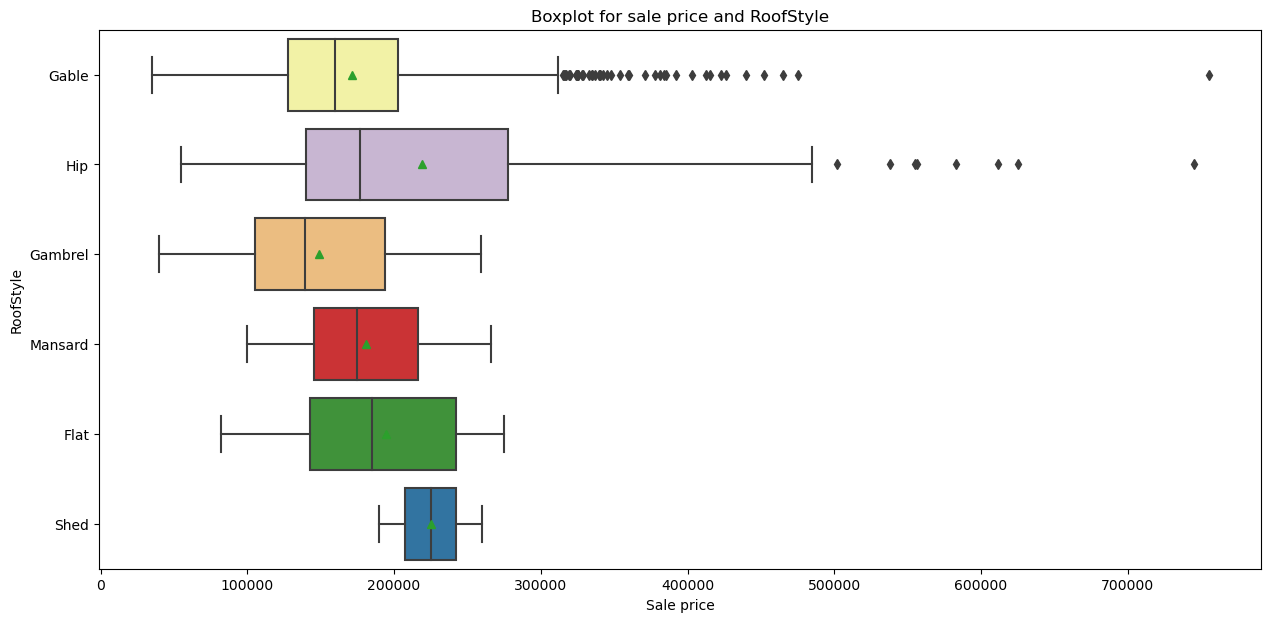

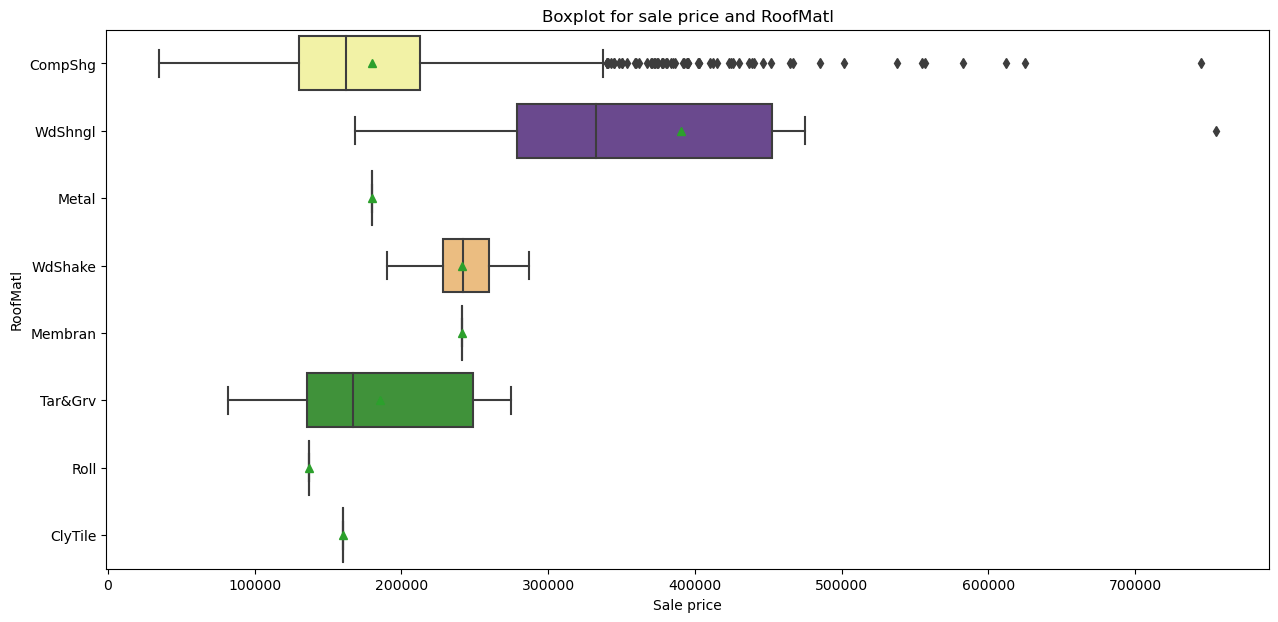

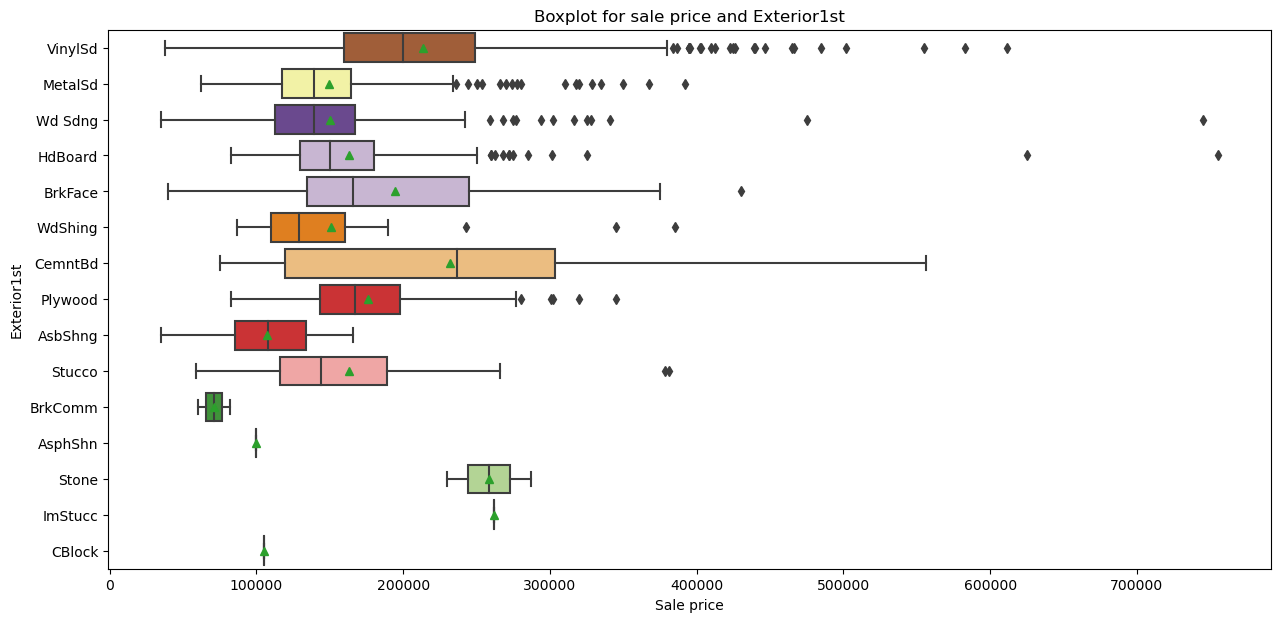

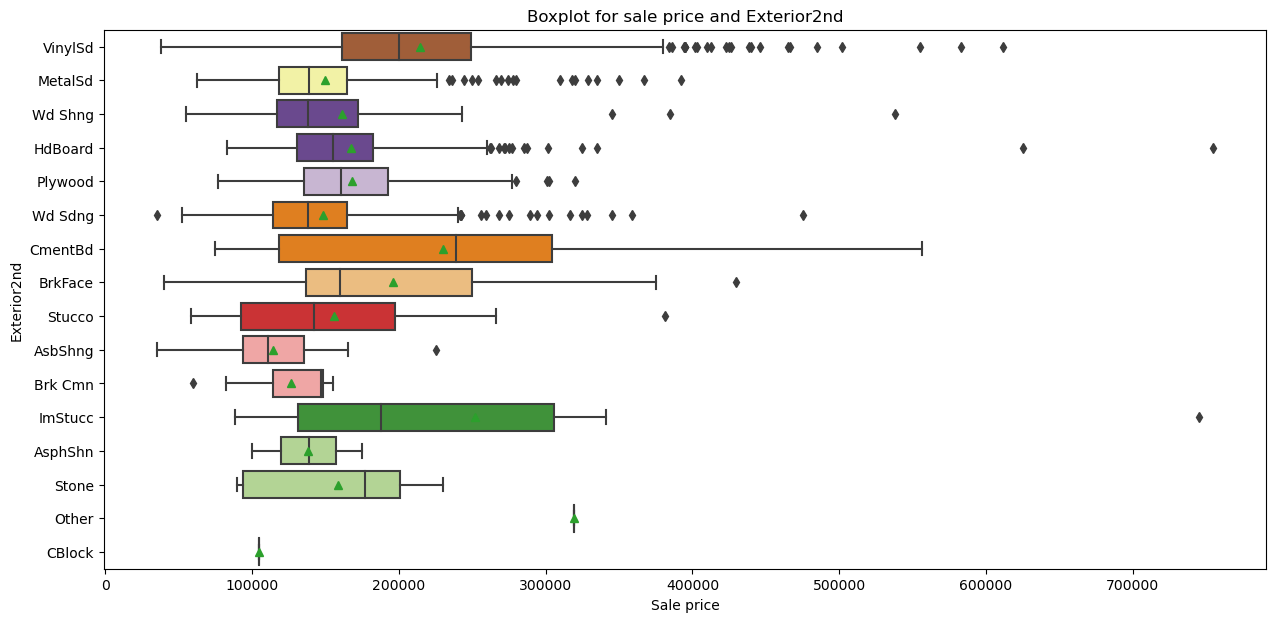

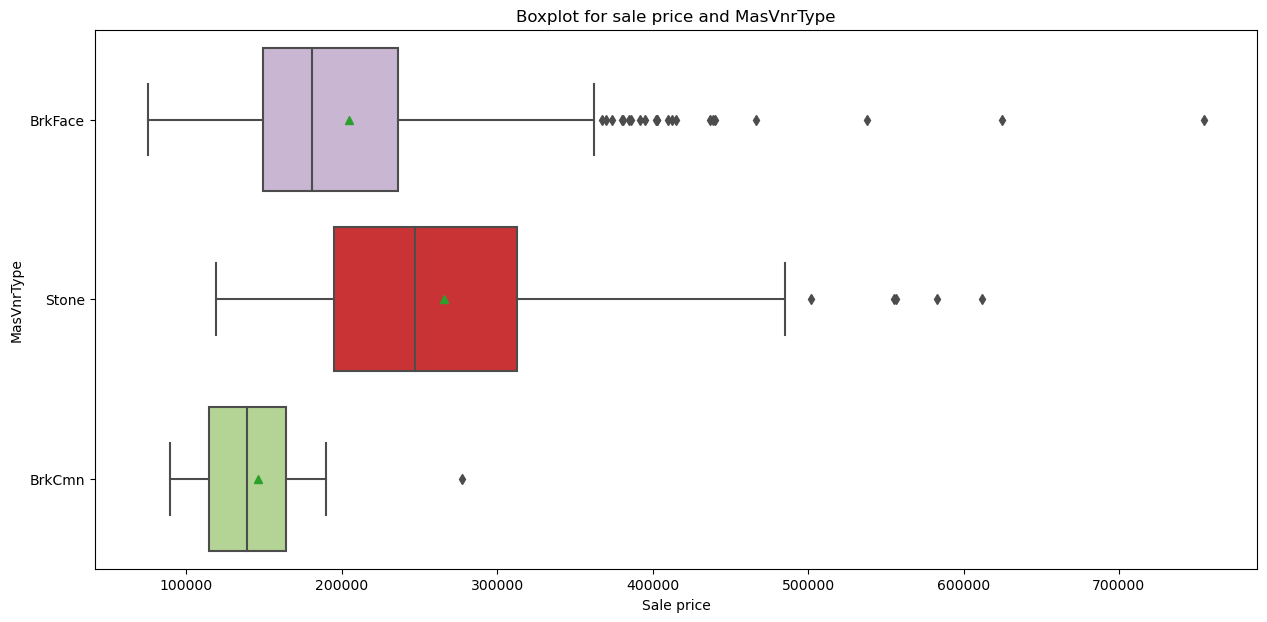

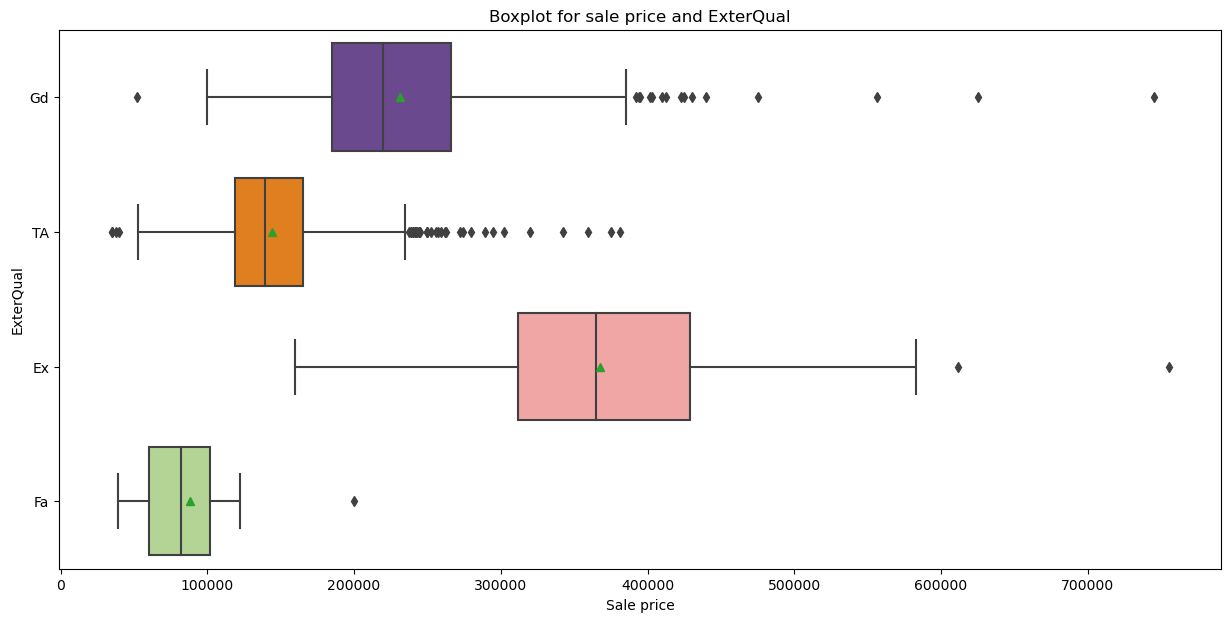

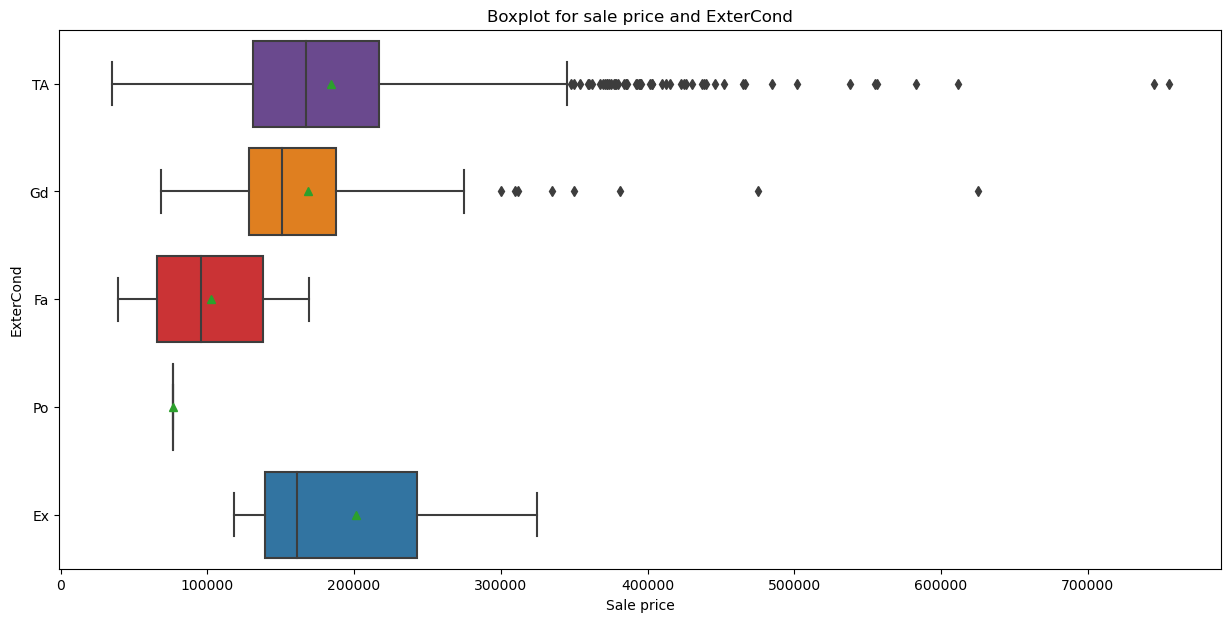

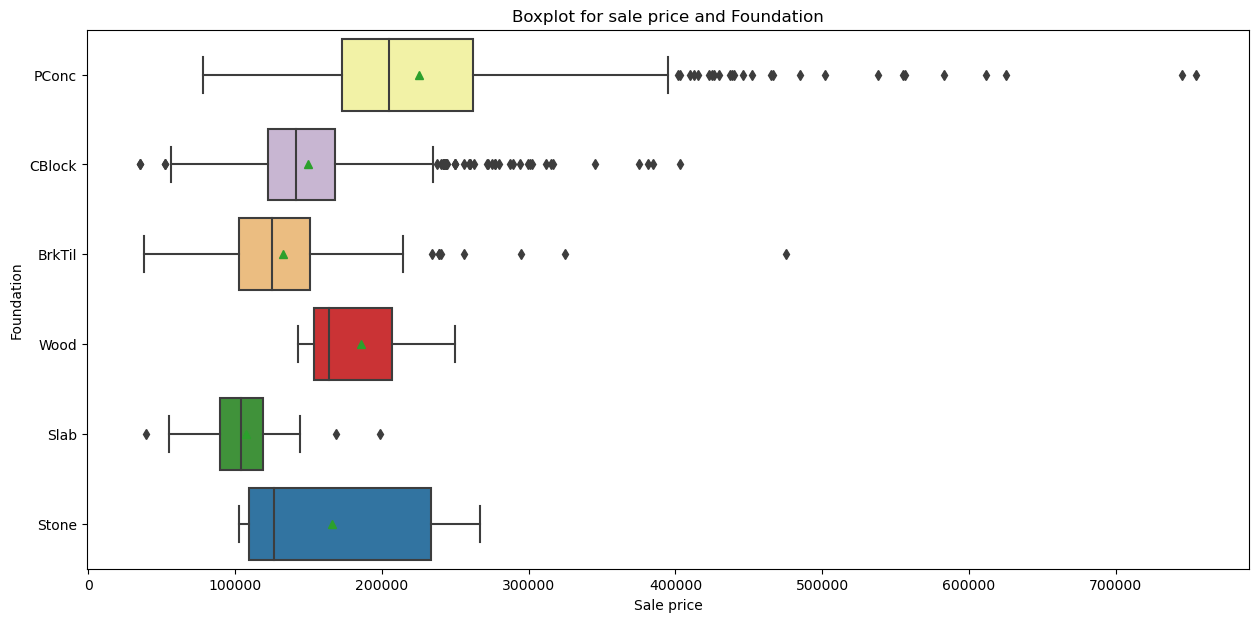

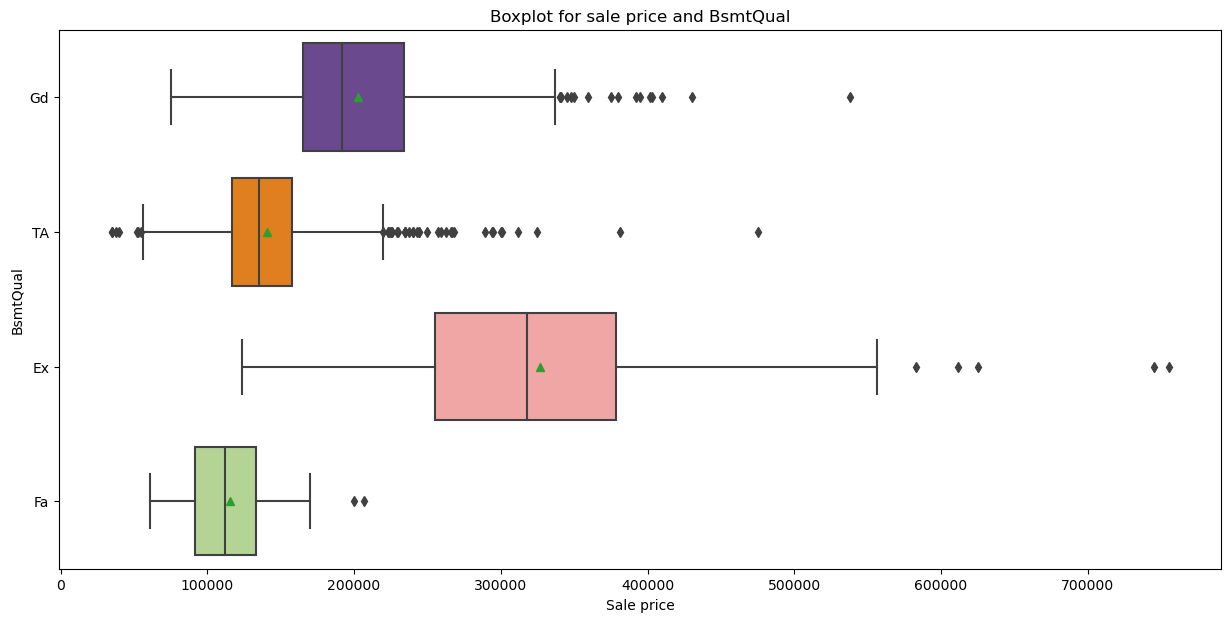

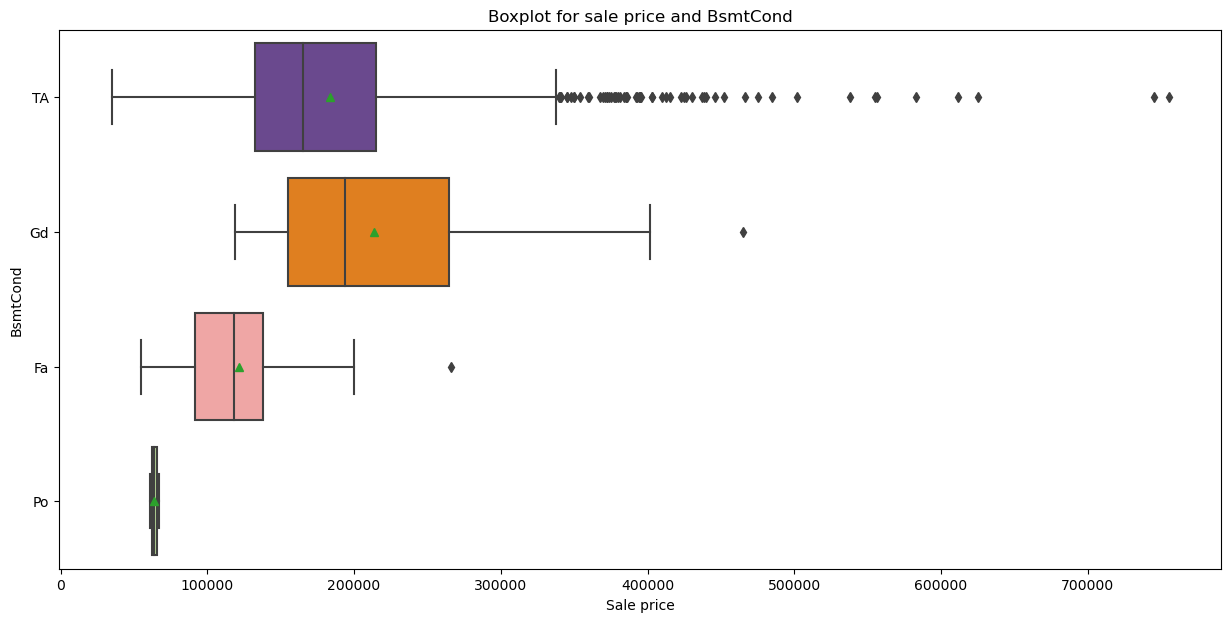

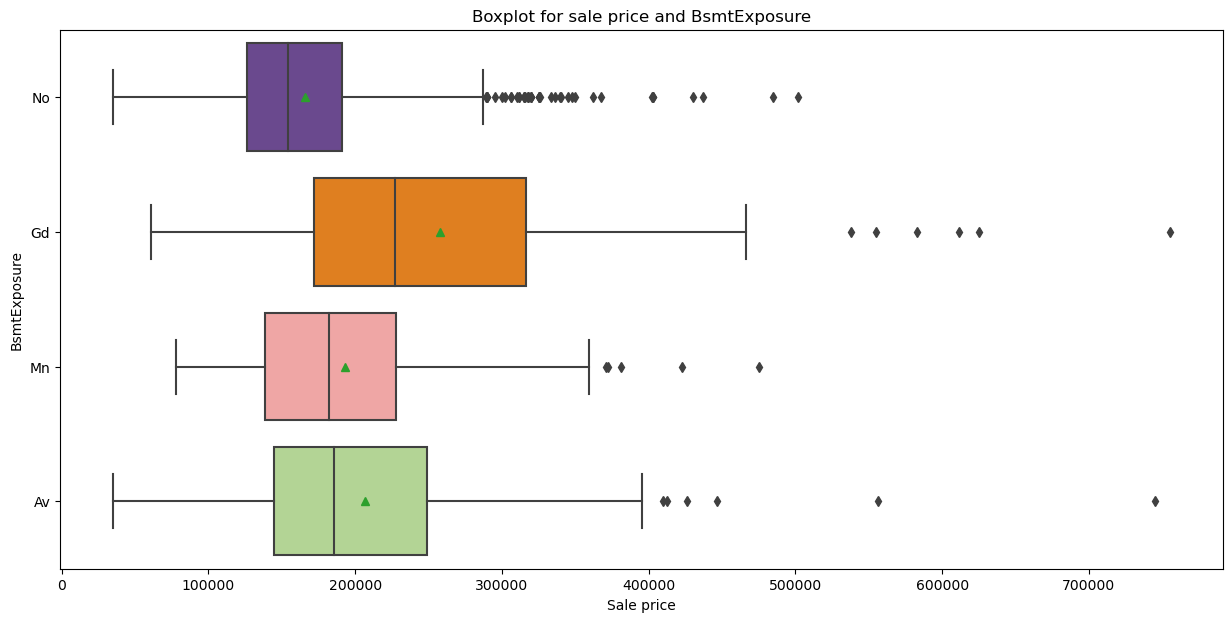

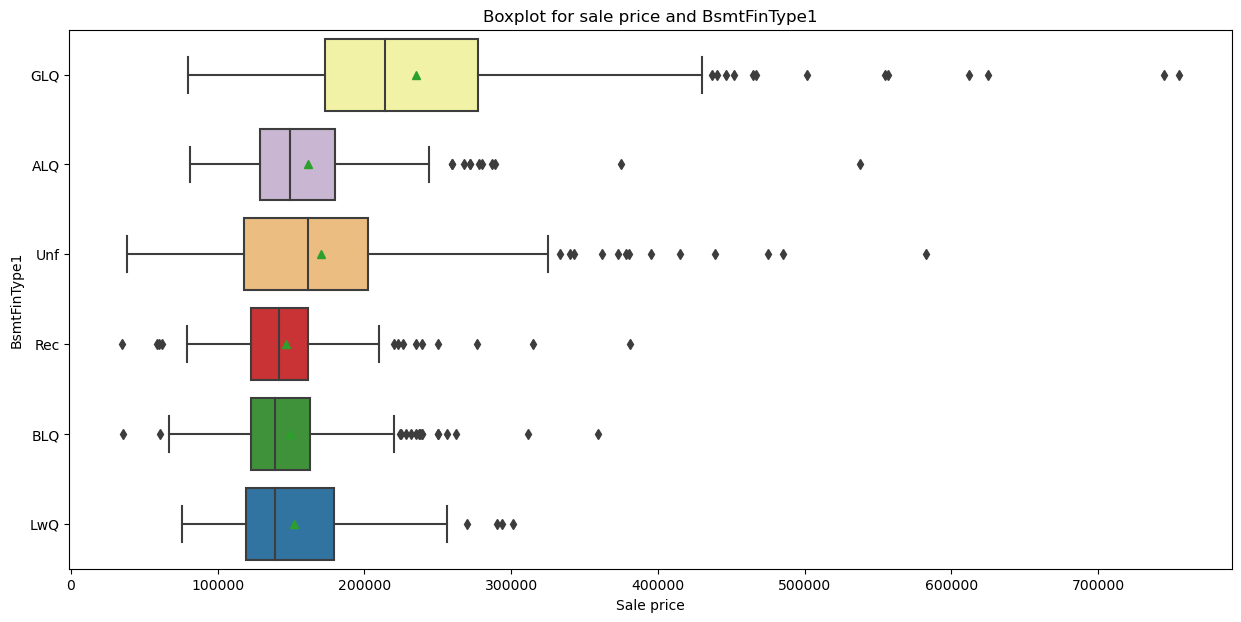

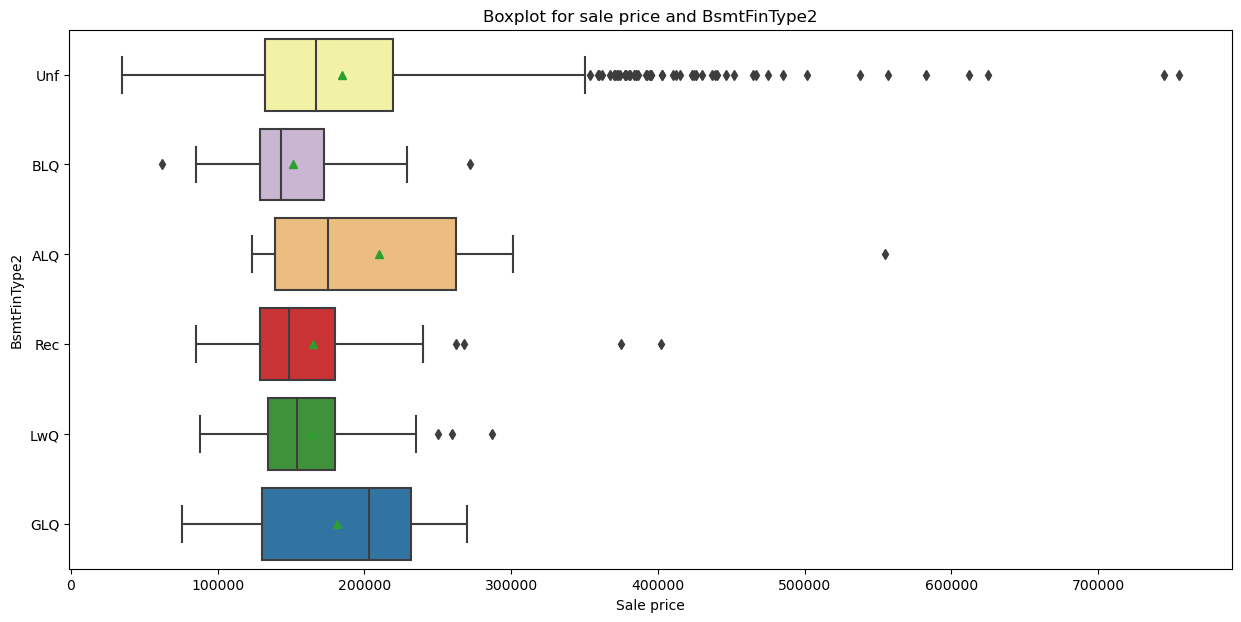

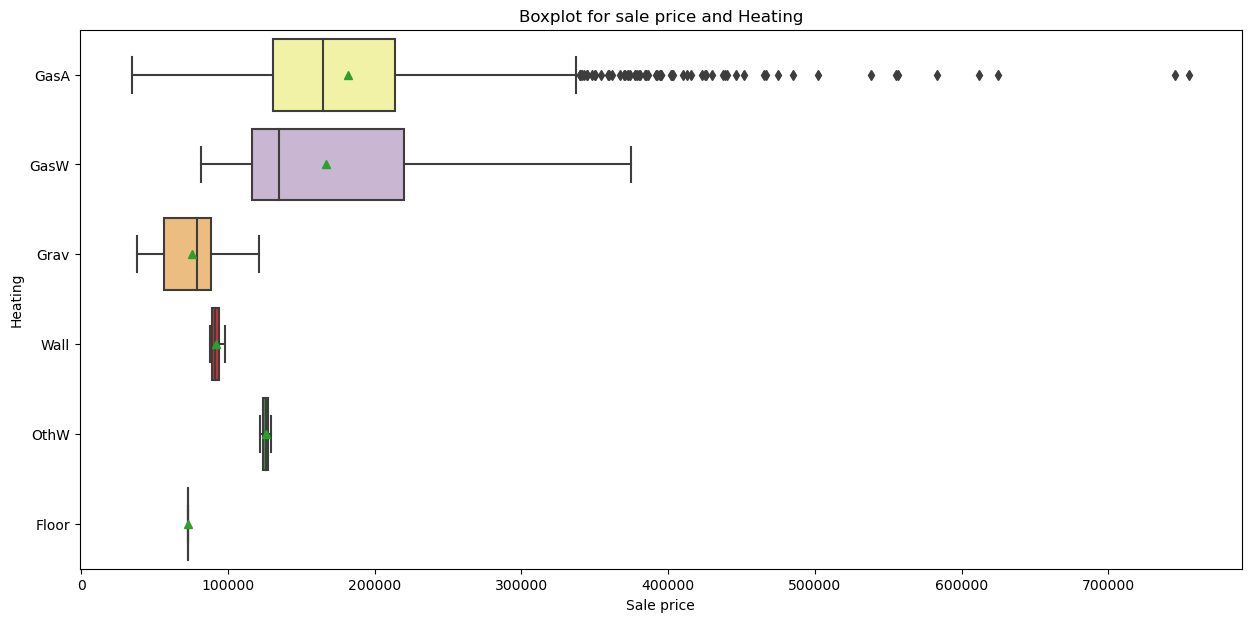

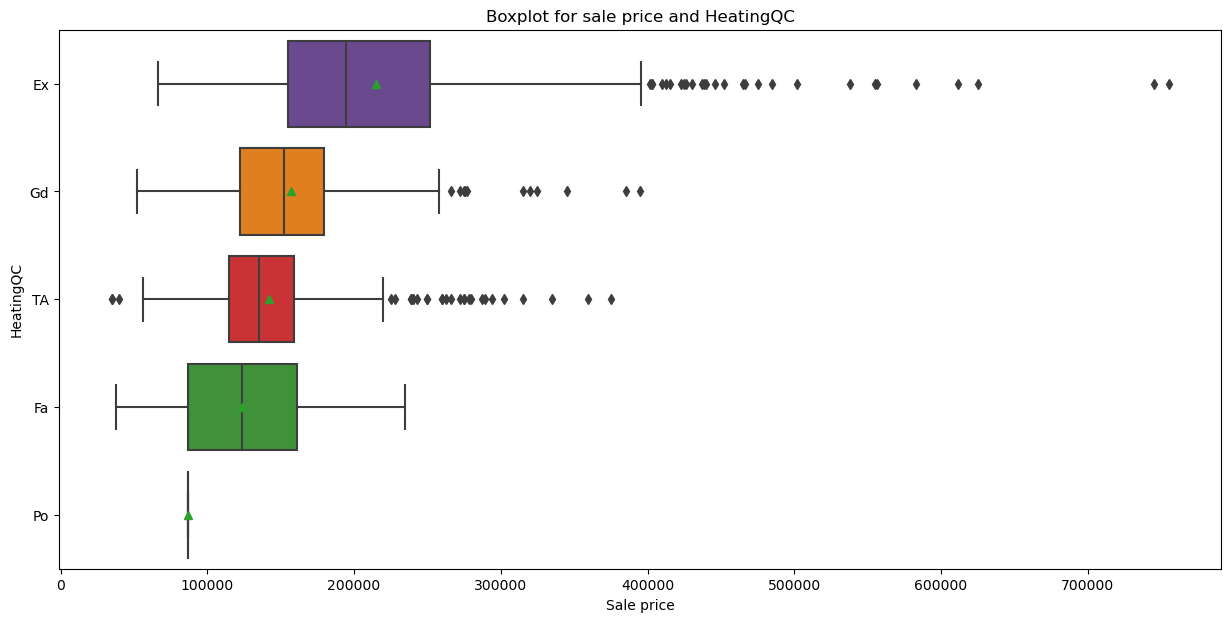

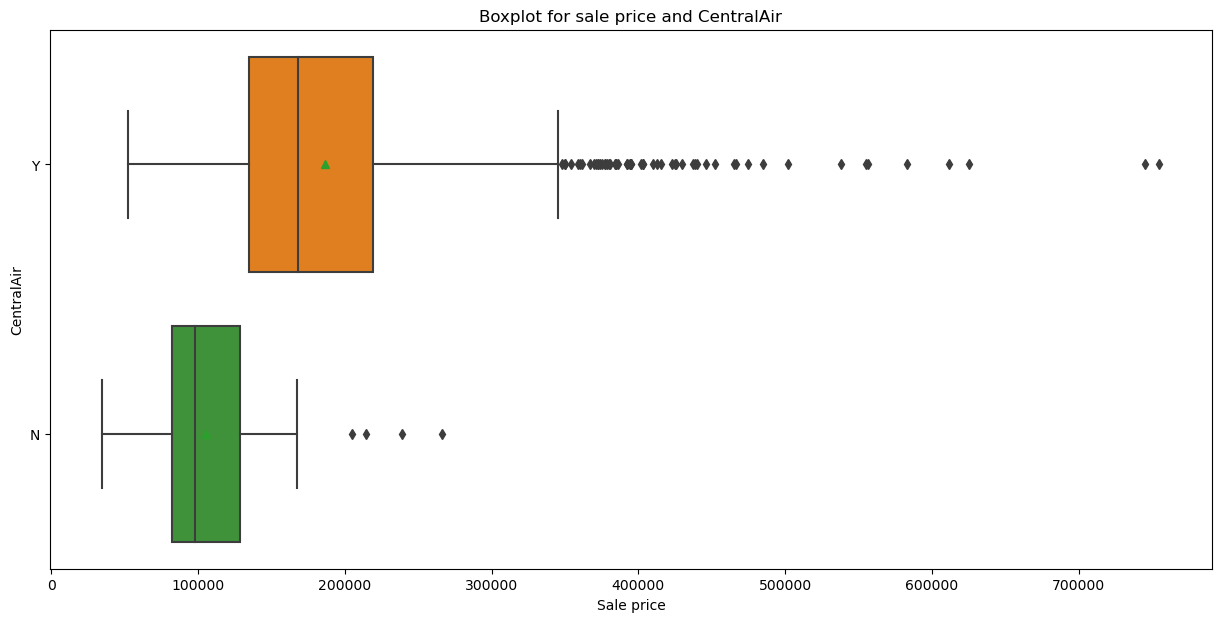

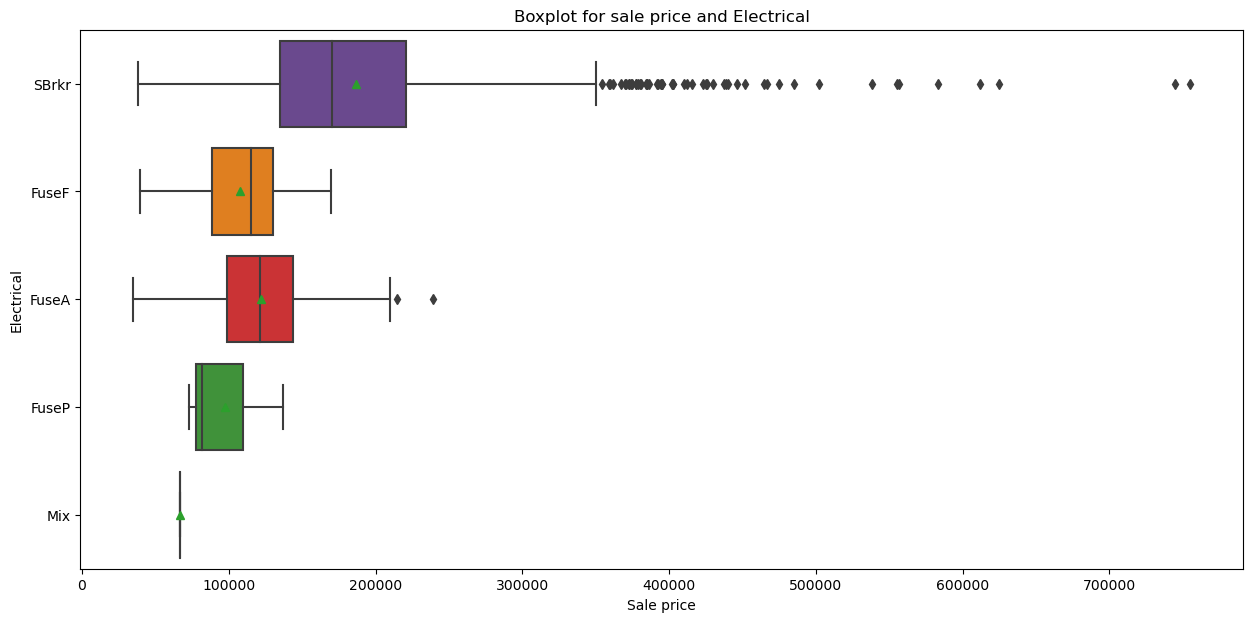

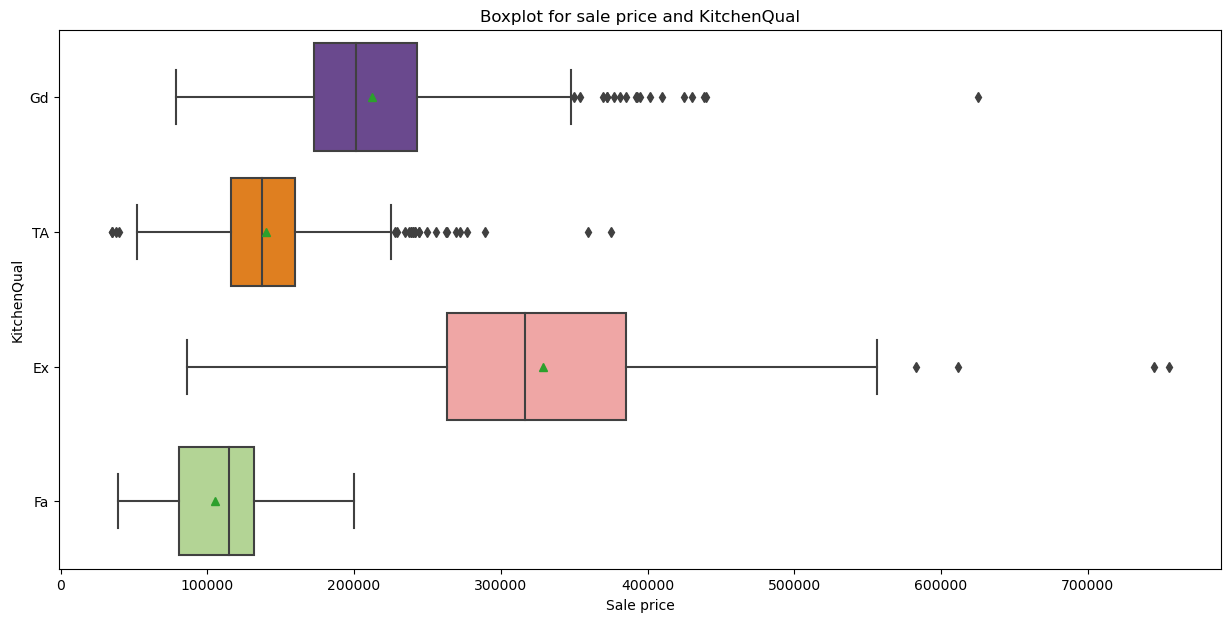

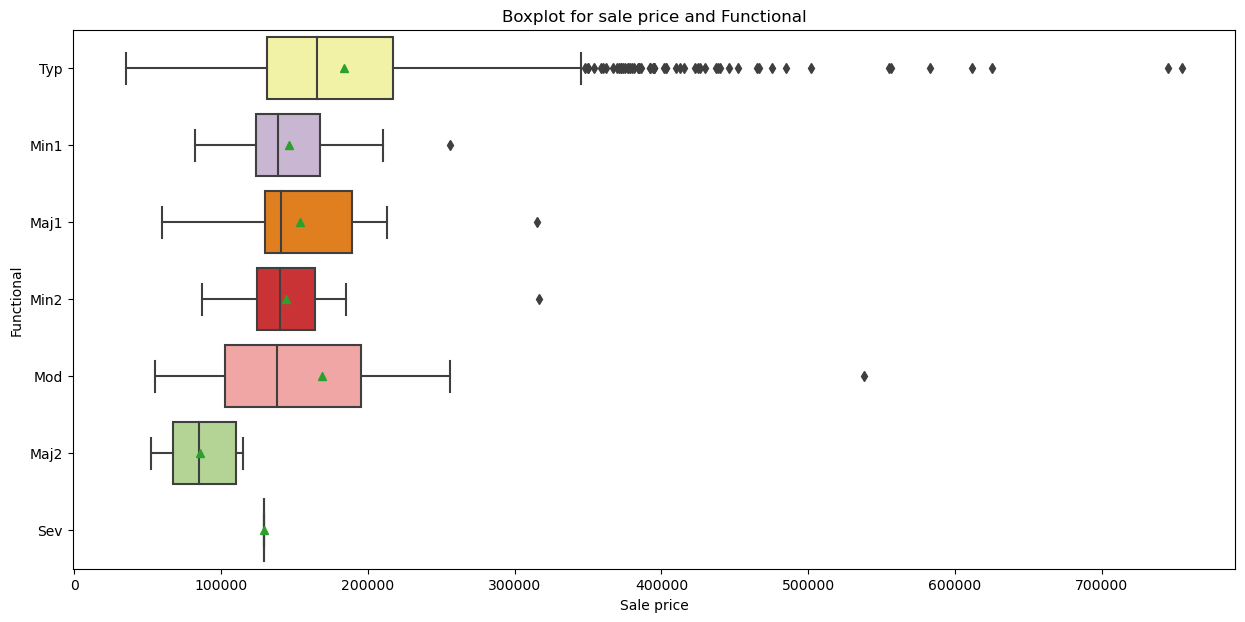

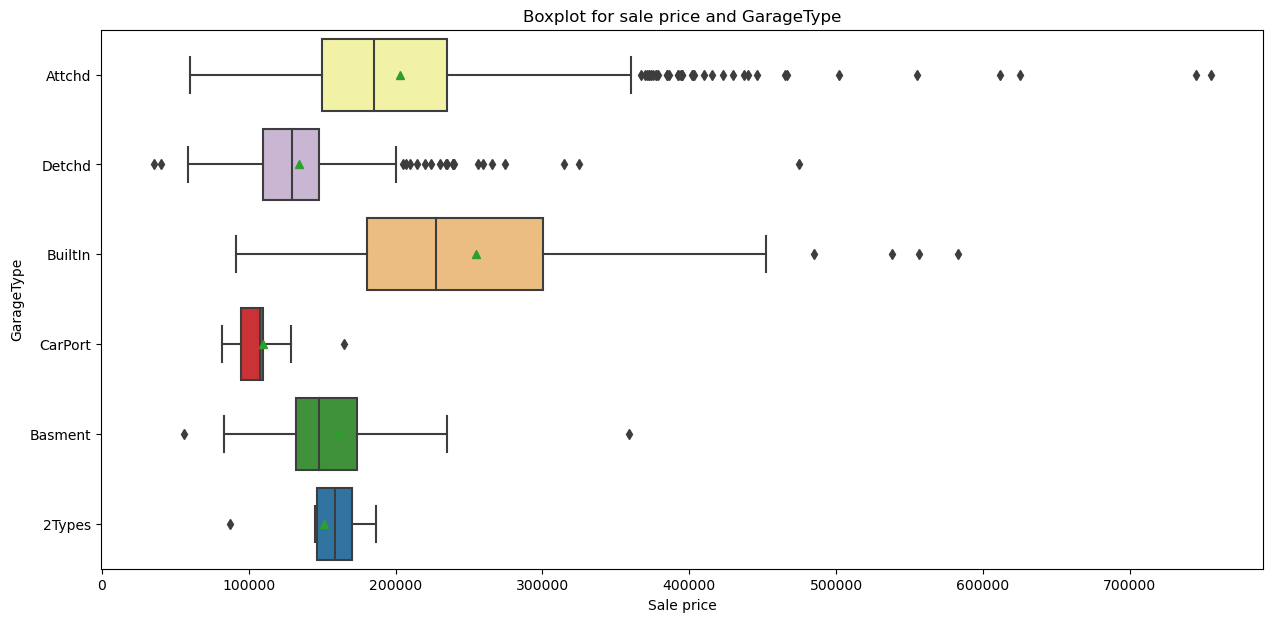

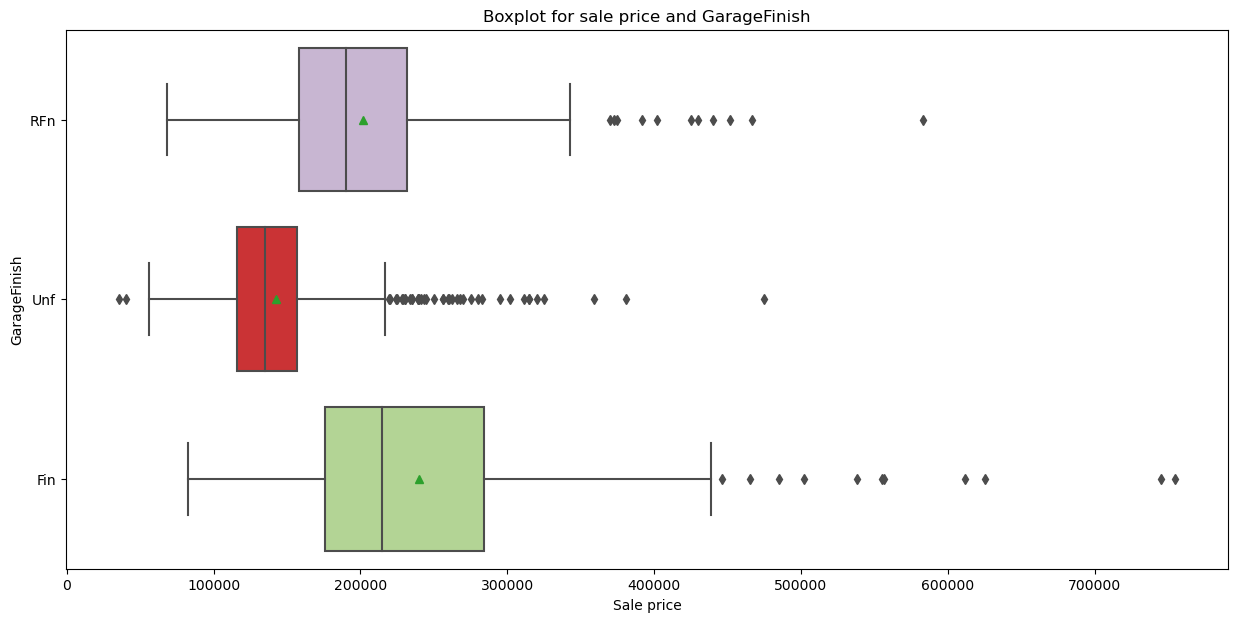

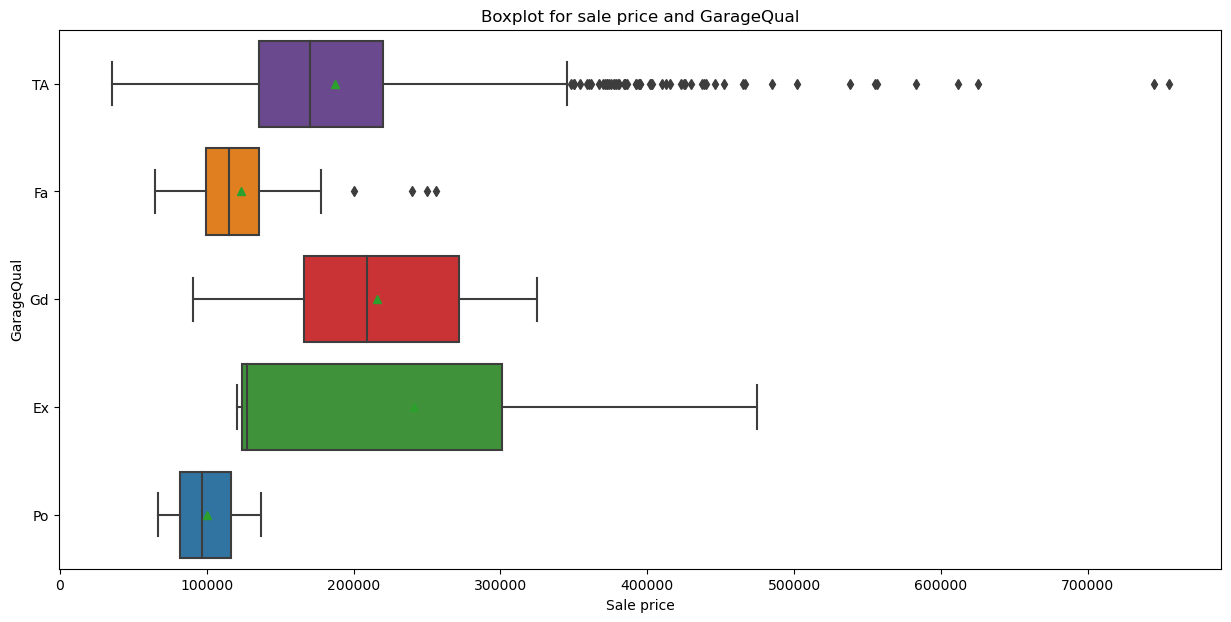

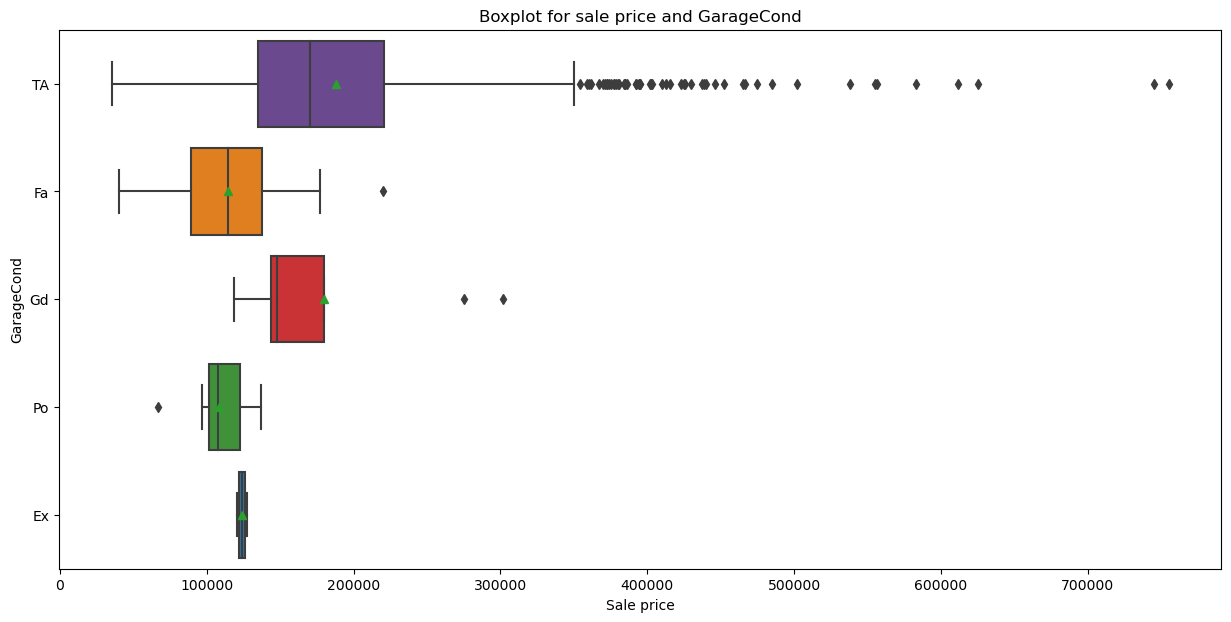

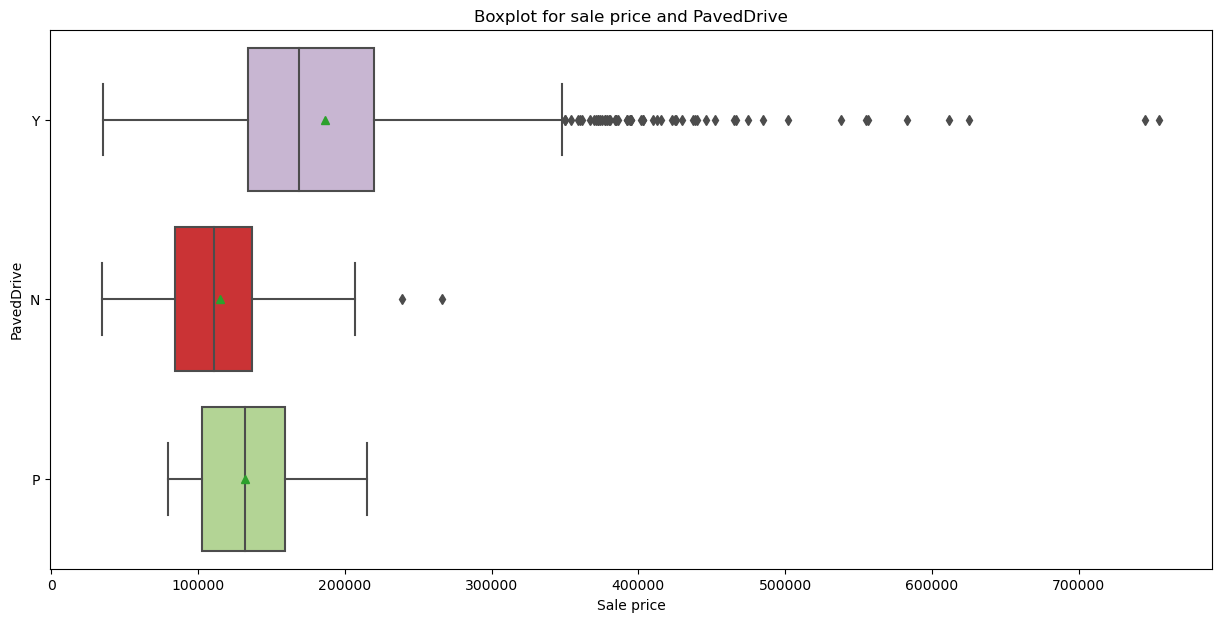

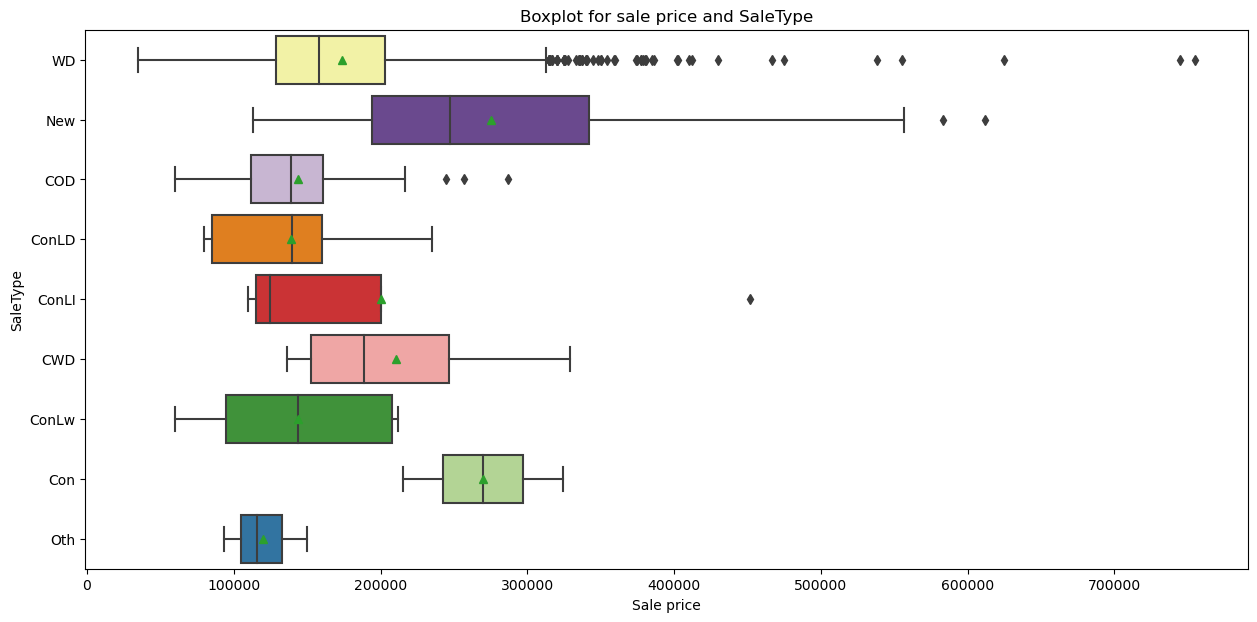

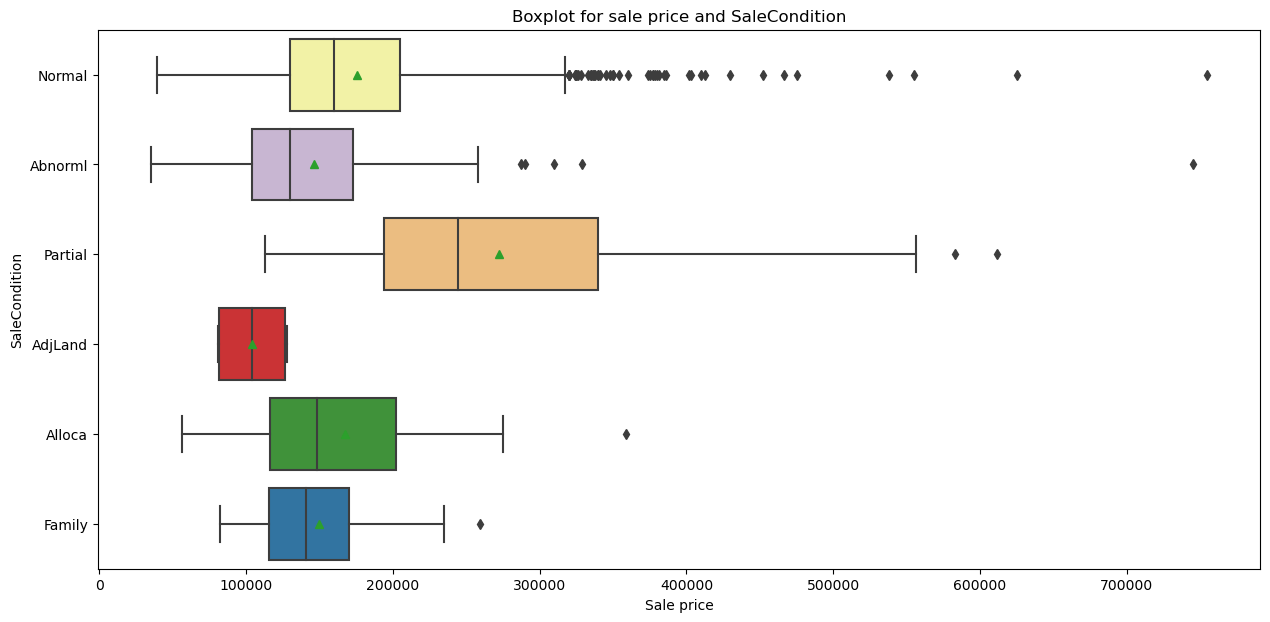

In [46]:
 for feature in data[categorical_columns_train]:
         boxplots(data,item,feature)

#### Boxplot  for sale price relative to  sale type

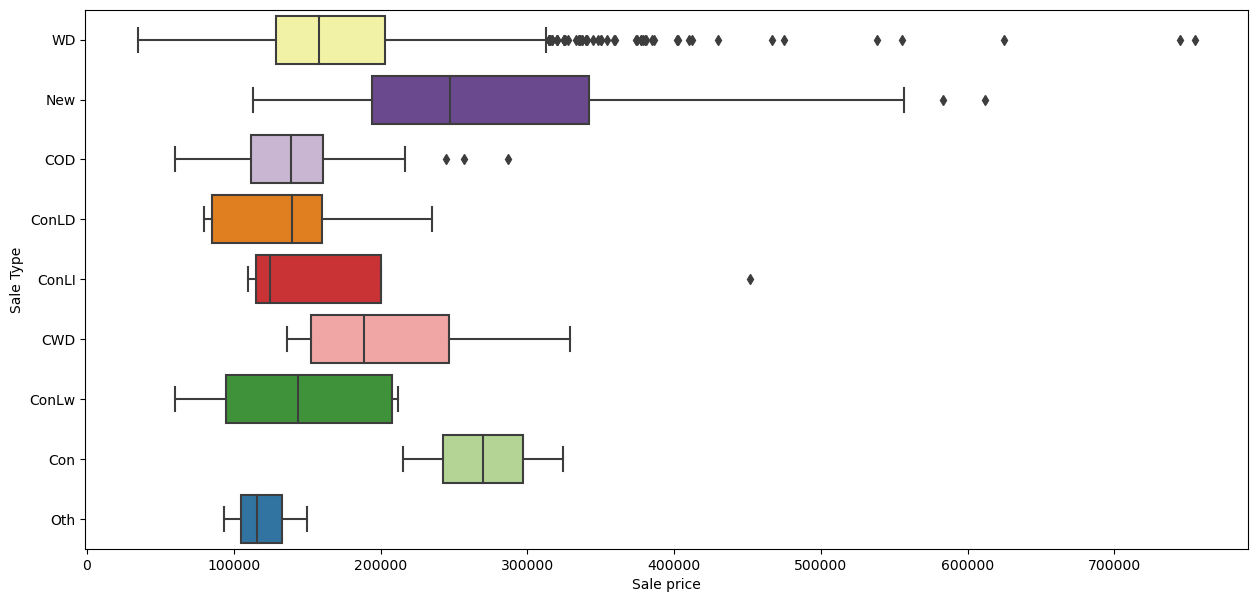

In [47]:
plt.figure(figsize=(15,7))  # Increase the size of the plot
sns.boxplot(data=data,x = "SalePrice", y ="SaleType", palette = "Paired_r") 
plt.xlabel("Sale price")
plt.ylabel("Sale Type")
plt.show()

### Catplot for House styles  and Sale price

<Figure size 3000x2000 with 0 Axes>

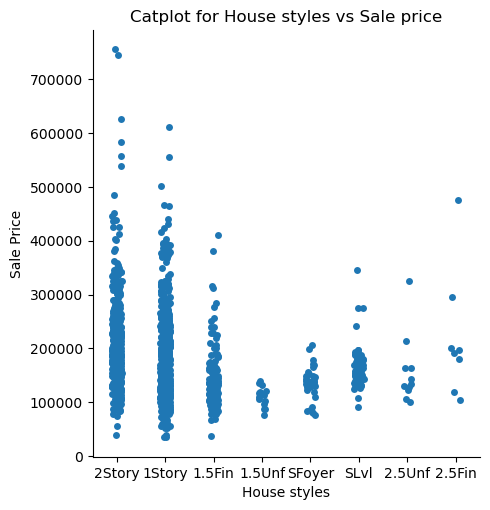

In [50]:
plt.figure(figsize=(30,20));
sns.catplot(data=data , x= "HouseStyle", y ='SalePrice');
plt.title("Catplot for House styles vs Sale price")
plt.xlabel("House styles")
plt.ylabel("Sale Price")
plt.show()

### Catplot for sale price and sale type

<Figure size 3000x2000 with 0 Axes>

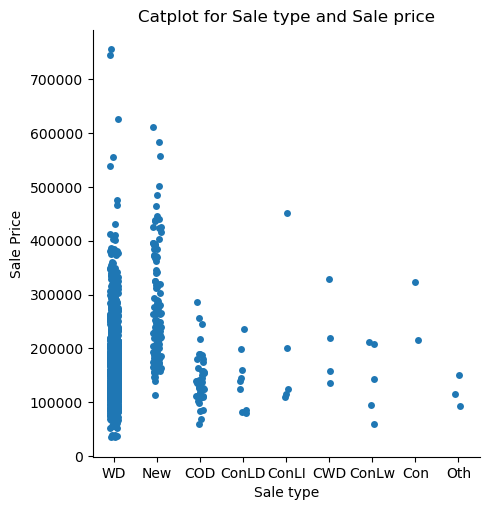

In [51]:
plt.figure(figsize=(30,20));
sns.catplot(data=data , x= "SaleType", y ='SalePrice')
plt.title("Catplot for Sale type and Sale price")
plt.xlabel("Sale type")
plt.ylabel("Sale Price")
plt.show();

### Categorical bivariate data

###  Swamplot for Sale price and Roof styles across different land slopes.

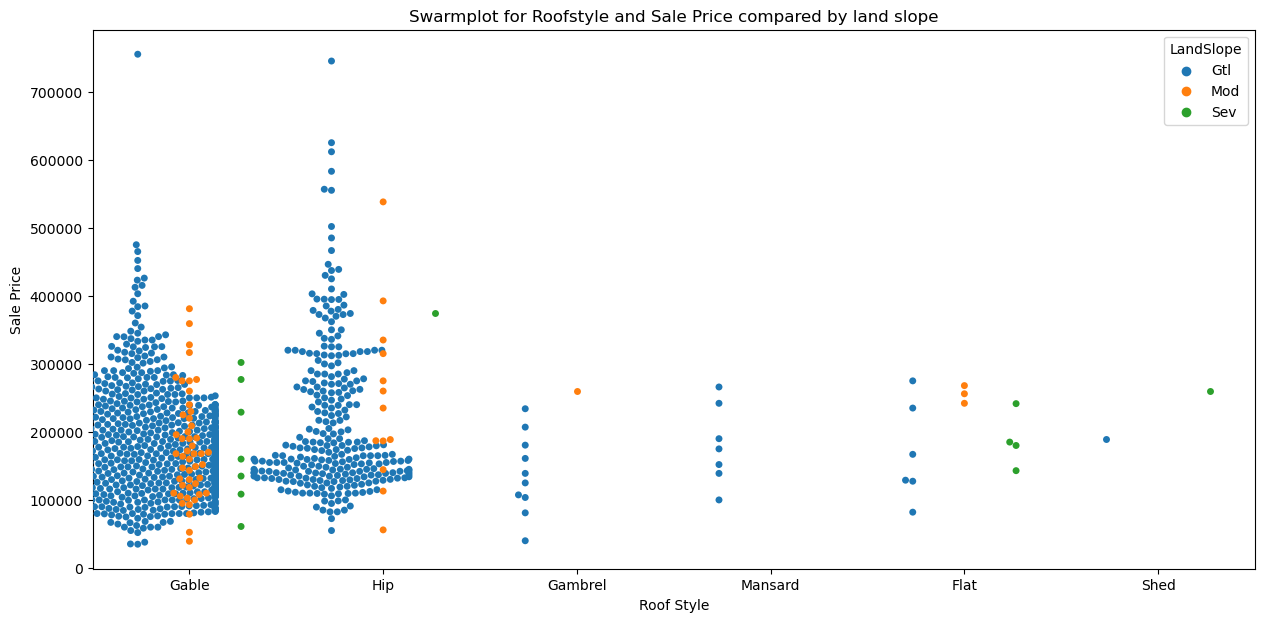

In [52]:
plt.figure(figsize=(15,7));
sns.swarmplot(data=data , x= "RoofStyle", y ='SalePrice',hue="LandSlope",dodge=True)
plt.title("Swarmplot for Roofstyle and Sale Price compared by land slope")
plt.xlabel("Roof Style")
plt.ylabel("Sale Price")
plt.show()

### Swamplot for Sale price and Lot shape across different house styles.

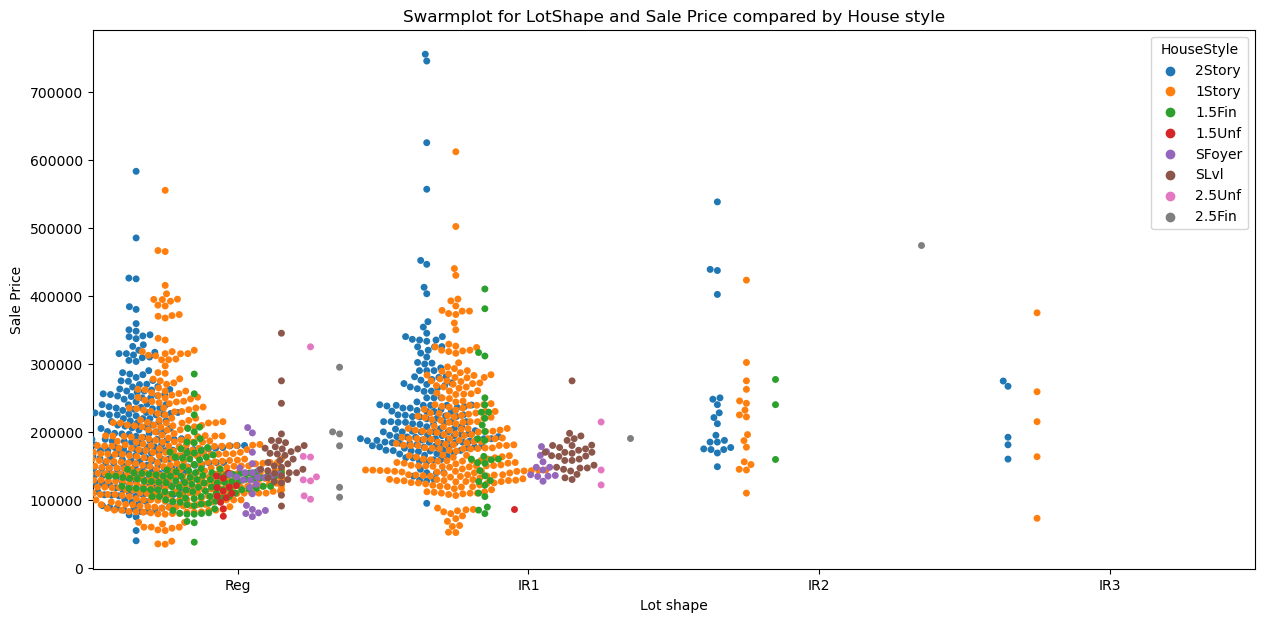

In [53]:
plt.figure(figsize=(15,7));
sns.swarmplot(data=data , x="LotShape", y ='SalePrice',hue="HouseStyle",dodge=True)
plt.title("Swarmplot for LotShape and Sale Price compared by House style")
plt.xlabel("Lot shape")
plt.ylabel("Sale Price")
plt.show()

## Data Pre-Processing

### Feature engineering

#### OUTLIER DETECTION AND TREATMENT


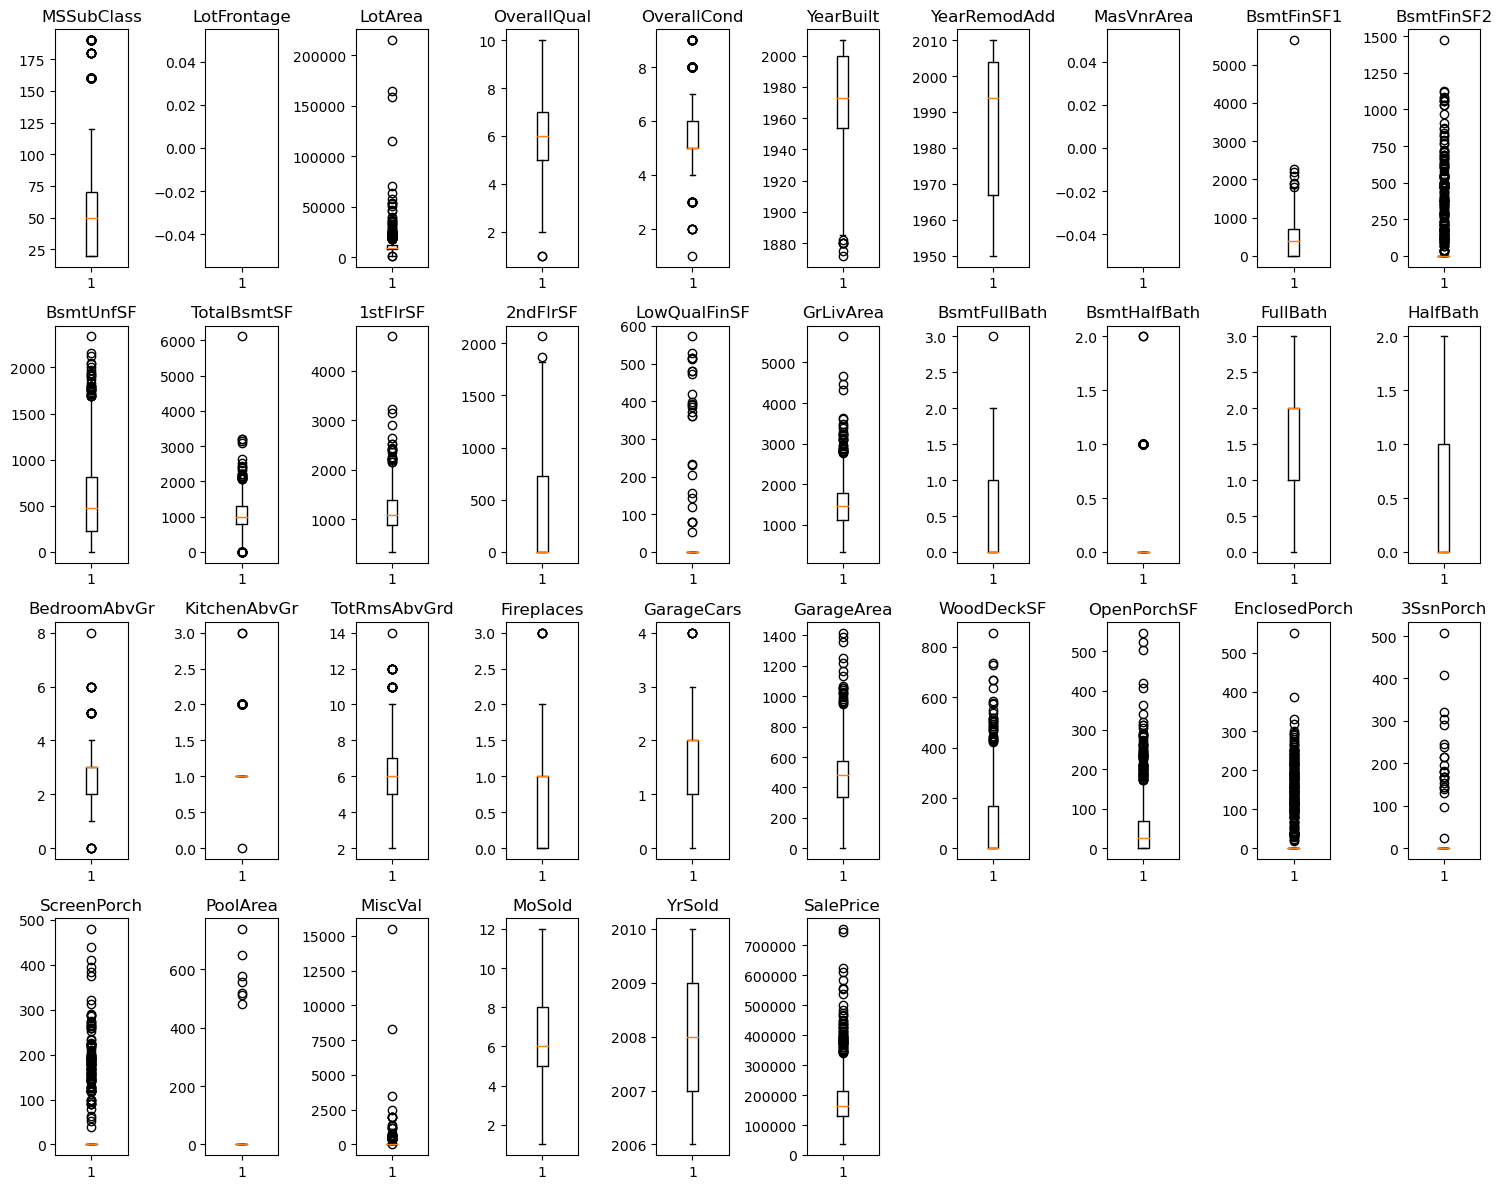

In [54]:
# Code to display the boxplot for numerical data that shows the presence of outliers.
plt.figure(figsize=(15, 12))
for i, variable in enumerate(numerical_columns_train):
    plt.subplot(4, 10, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

## Observation:
Approximately 50% of the numerical data have outliers on the right side of the whisker. <br>
However there is no any misleading value on those outliers.<br>
The columns with missing values are not affect by the outliers, so they will be imputed with the mean method.

## Missing value imputation on both training and testing datasets

In [55]:
# Lets fisrt replace the "None" with "NAN"  in  "MasVnrType"
data["MasVnrType"] = data["MasVnrType"].replace("None",np.nan)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [57]:
data_pred["MasVnrType"] = data_pred["MasVnrType"].replace("None",np.nan)

In [58]:
data["MasVnrType"].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [59]:
null_column_train=['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 
 'GarageFinish', 'GarageQual', 'GarageCond']

In [60]:
 # Code to drop all categorical columns in the training dataset
data.dropna(subset=data[null_column_train].columns,inplace=True) 

In [61]:
data_pred["MasVnrType"].unique()

array([nan, 'BrkFace', 'Stone', 'BrkCmn'], dtype=object)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 575 entries, 0 to 1456
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     575 non-null    int64  
 1   MSZoning       575 non-null    object 
 2   LotFrontage    455 non-null    float64
 3   LotArea        575 non-null    int64  
 4   Street         575 non-null    object 
 5   LotShape       575 non-null    object 
 6   LandContour    575 non-null    object 
 7   Utilities      575 non-null    object 
 8   LotConfig      575 non-null    object 
 9   LandSlope      575 non-null    object 
 10  Neighborhood   575 non-null    object 
 11  Condition1     575 non-null    object 
 12  Condition2     575 non-null    object 
 13  BldgType       575 non-null    object 
 14  HouseStyle     575 non-null    object 
 15  OverallQual    575 non-null    int64  
 16  OverallCond    575 non-null    int64  
 17  YearBuilt      575 non-null    int64  
 18  YearRemodAdd  

In [63]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL       65.000     8450   Pave      Reg         Lvl   
2          60       RL       68.000    11250   Pave      IR1         Lvl   
4          60       RL       84.000    14260   Pave      IR1         Lvl   
6          20       RL       75.000    10084   Pave      Reg         Lvl   
7          60       RL          NaN    10382   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   
6    AllPub    Inside       Gtl      Somerst       Norm       Norm     1Fam   
7    AllPub    Corner       Gtl       NWAmes       PosN       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
2     2Story            7            5       2001          2002     Gable   
4     2Story            8            5       2000          2000     Gable   
6     1Story            8            5       2004          2005     Gable   
7     2Story            7            6       1973          1973     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA   
2  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA   
4  CompShg     VinylSd     VinylSd    BrkFace     350.000        Gd        TA   
6  CompShg     VinylSd     VinylSd      Stone     186.000        Gd        TA   
7  CompShg     HdBoard     HdBoard      Stone     240.000        TA        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
2      PConc       Gd       TA           Mn          GLQ         486   
4      PConc       Gd       TA           Av          GLQ         655   
6      PConc       Ex       TA           Av          GLQ        1369   
7     CBlock       Gd       TA           Mn          ALQ         859   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
4          Unf           0        490         1145    GasA        Ex   
6          Unf           0        317         1686    GasA        Ex   
7          BLQ          32        216         1107    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
2          Y      SBrkr       920       866             0       1786   
4          Y      SBrkr      1145      1053             0       2198   
6          Y      SBrkr      1694         0             0       1694   
7          Y      SBrkr      1107       983             0       2090   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
2             1             0         2         1             3             1   
4             1             0         2         1             4             1   
6             1             0         2         0             3             1   
7             1             0         2         1             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType GarageFinish  \
0          Gd             8        Typ           0     Attchd          RFn   
2          Gd             6        Typ           1     Attchd          RFn   
4          Gd             9        Typ           1     Attchd          RFn   
6          Gd          

In [64]:
null_column_test =  ['MSZoning', 'Utilities','Exterior1st','Exterior2nd', 'MasVnrType','BsmtQual', 
  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','KitchenQual','Functional', 
  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType']

In [65]:
# Code to drop all categorical columns in the testing data
data_pred.dropna(subset=data_pred[null_column_test].columns,inplace=True) 

In [66]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 1 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             549 non-null    object 
 1   MSSubClass     549 non-null    int64  
 2   MSZoning       549 non-null    object 
 3   LotFrontage    444 non-null    float64
 4   LotArea        549 non-null    int64  
 5   Street         549 non-null    object 
 6   LotShape       549 non-null    object 
 7   LandContour    549 non-null    object 
 8   Utilities      549 non-null    object 
 9   LotConfig      549 non-null    object 
 10  LandSlope      549 non-null    object 
 11  Neighborhood   549 non-null    object 
 12  Condition1     549 non-null    object 
 13  Condition2     549 non-null    object 
 14  BldgType       549 non-null    object 
 15  HouseStyle     549 non-null    object 
 16  OverallQual    549 non-null    int64  
 17  OverallCond    549 non-null    int64  
 18  YearBuilt     

In [67]:
data_pred.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1   1462          20       RL       81.000    14267   Pave      IR1   
3   1464          60       RL       78.000     9978   Pave      IR1   
11  1472         160       RM       21.000     1680   Pave      Reg   
12  1473         160       RM       21.000     1680   Pave      Reg   
15  1476          60       RL      102.000    12858   Pave      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1          Lvl    AllPub    Corner       Gtl        NAmes       Norm   
3          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
11         Lvl    AllPub    Inside       Gtl       BrDale       Norm   
12         Lvl    AllPub    Inside       Gtl       BrDale       Norm   
15         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1        Norm     1Fam     1Story            6            6       1958   
3        Norm     1Fam     2Story            6            6       1998   
11       Norm    Twnhs     2Story            6            5       1971   
12       Norm    Twnhs     2Story            5            5       1971   
15       Norm     1Fam     2Story            9            5       2009   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1           1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
3           1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
11          1971     Gable  CompShg     HdBoard     HdBoard    BrkFace   
12          1971     Gable  CompShg     HdBoard     HdBoard    BrkFace   
15          2010     Gable  CompShg     VinylSd     VinylSd      Stone   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
1      108.000        TA        TA     CBlock       TA       TA           No   
3       20.000        TA        TA      PConc       TA       TA           No   
11     504.000        TA        TA     CBlock       TA       TA           No   
12     492.000        TA        TA     CBlock       TA       TA           No   
15     162.000        Ex        TA      PConc       Ex       TA           No   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
1           ALQ     923.000          Unf       0.000    406.000     1329.000   
3           GLQ     602.000          Unf       0.000    324.000      926.000   
11          Rec     156.000          Unf       0.000    327.000      483.000   
12          Rec     300.000          Unf       0.000    225.000      525.000   
15          Unf       0.000          Unf       0.000   1590.000     1590.000   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
1     GasA        TA          Y      SBrkr      1329         0             0   
3     GasA        Ex          Y      SBrkr       926       678             0   
11    GasA        TA          Y      SBrkr       483       504             0   
12    GasA        TA          Y      SBrkr       525       567             0   
15    GasA        Ex          Y      SBrkr      1627       707             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1        1329         0.000         0.000         1         1             3   
3        1604         0.000         0.000         2         1             3   
11        987         0.000         0.000         1         1             2   
12       1092         0.000         0.000         1         1             3   
15       2334         0.000         0.000         2         1             3   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
1              1          Gd             6        Typ           0     Attchd   
3              1          Gd             7        Typ           1     Attchd   
11             1          TA             5        Typ           0     Detchd   
12             1  

In [68]:
data_pred["MasVnrType"].unique()

array(['BrkFace', 'Stone', 'BrkCmn'], dtype=object)

In [69]:
data_pred.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      105
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [70]:
# Now lets fill the missing values of "LotFrontage" column with the mean
data["LotFrontage"] =data["LotFrontage"].fillna(data["LotFrontage"].mean())

In [71]:
# Now lets fill the missing values of "LotFrontage" column with the mean
data_pred["LotFrontage"] =data_pred["LotFrontage"].fillna(data_pred["LotFrontage"].mean())

In [72]:
# Code to count the number of missing values in the dataset
data.isnull().sum().sum()

0

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 575 entries, 0 to 1456
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     575 non-null    int64  
 1   MSZoning       575 non-null    object 
 2   LotFrontage    575 non-null    float64
 3   LotArea        575 non-null    int64  
 4   Street         575 non-null    object 
 5   LotShape       575 non-null    object 
 6   LandContour    575 non-null    object 
 7   Utilities      575 non-null    object 
 8   LotConfig      575 non-null    object 
 9   LandSlope      575 non-null    object 
 10  Neighborhood   575 non-null    object 
 11  Condition1     575 non-null    object 
 12  Condition2     575 non-null    object 
 13  BldgType       575 non-null    object 
 14  HouseStyle     575 non-null    object 
 15  OverallQual    575 non-null    int64  
 16  OverallCond    575 non-null    int64  
 17  YearBuilt      575 non-null    int64  
 18  YearRemodAdd  

### Data Preparation:

In [75]:
# first create dummy variables for categorical data by dropping one of the columns in the training data
for variable in categorical_columns_train:
    
       data[variable] = pd.factorize(data[variable])[0]  

In [76]:
data.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60         0       65.000     8450       0         0            0   
2          60         0       68.000    11250       0         1            0   
4          60         0       84.000    14260       0         1            0   
6          20         0       75.000    10084       0         0            0   
7          60         0       74.343    10382       0         1            0   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          0          0             0           0           0   
2          0          0          0             0           0           0   
4          0          1          0             1           0           0   
6          0          0          0             2           0           0   
7          0          2          0             3           1           0   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         0           0            7            5       2003          2003   
2         0           0            7            5       2001          2002   
4         0           0            8            5       2000          2000   
6         0           1            8            5       2004          2005   
7         0           0            7            6       1973          1973   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          0         0            0            0           0     196.000   
2          0         0            0            0           0     162.000   
4          0         0            0            0           0     350.000   
6          0         0            0            0           1     186.000   
7          0         0            1            1           1     240.000   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          0          0           0         0         0             0   
2          0          0           0         0         0             1   
4          0          0           0         0         0             2   
6          0          0           0         1         0             2   
7          1          0           1         0         0             1   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             0         706             0           0        150          856   
2             0         486             0           0        434          920   
4             0         655             0           0        490         1145   
6             0        1369             0           0        317         1686   
7             1         859             1          32        216         1107   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0        0          0           0           0       856       854   
2        0          0           0           0       920       866   
4        0          0           0           0      1145      1053   
6        0          0           0           0      1694         0   
7        0          0           0           0      1107       983   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
2             0       1786             1             0         2         1   
4             0       2198             1             0         2         1   
6             0       1694             1             0         2         0   
7             0       2090             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             3             1            0             8           0   
2             3             1            0             6           0   
4             4             1            0             9           0   
6             3             1            

In [176]:
# Dividing train data into X and y 
X= data.drop(["SalePrice","YearBuilt","YearRemodAdd","YrSold"], axis=1)
y = data["SalePrice"]

In [177]:
### Lets split the training dataset
# Splitting the dataset into training and validation set into a ratio of 70:30 
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.30,random_state=42)

In [178]:
X_train.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
879           20         0       74.343     7000       0         1   
349           60         0       56.000    20431       0         2   
293           60         0       74.343    16659       0         1   
1078         120         2       37.000     4435       0         0   
796           20         0       71.000     8197       0         0   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
879             0          0          3          0             0           0   
349             0          0          0          0             4           0   
293             0          0          2          0             3           2   
1078            0          0          0          0             0           0   
796             0          0          0          0            13           0   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  \
879            0         0           1            5            8          0   
349            0         0           0            9            5          1   
293            0         0           0            7            7          0   
1078           0         1           1            6            5          0   
796            0         0           1            6            5          0   

      RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
879          0            0            0           0      90.000          0   
349          0            8            7           0     870.000          2   
293          0            5            5           0      34.000          1   
1078         0            0            0           0     169.000          0   
796          0            5            5           0     148.000          1   

      ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
879           1           1         2         0             0             1   
349           0           0         1         0             0             0   
293           0           1         2         0             0             1   
1078          0           0         0         0             1             0   
796           0           1         2         0             0             2   

      BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
879          646             0           0        218          864        0   
349         1410             0           0        438         1848        0   
293          795             0           0          0          795        0   
1078         662             0           0        186          848        0   
796            0             0           0        660          660        0   

      HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
879           0           0           0       864         0             0   
349           0           0           0      1848       880             0   
293           3           0           0      1468       795             0   
1078          0           0           0       848         0             0   
796           0           0           0      1285         0             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
879         864             1             0         1         0             3   
349        2728             1             0         2         1             4   
293        2263             1             0         2         1             3   
1078        848             1             0         1         0             1   
796        1285             0             0         1         1             3   

      KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
879              1            1             6           0           0   
349              1            2            10           0           2   
293              1            0    

In [179]:
y_train.head()

879     136500
349     437154
293     235000
1078    155900
796     143500
Name: SalePrice, dtype: int64

In [180]:
print("The X-train dataset consits of :", 
      X_train.shape[0], "rows and" , X_train.shape[1] , "columns")

The X-train dataset consits of : 402 rows and 70 columns


In [181]:
print("The y training dataset consists of :",
      len(y_train), "rows and" , 1 , "column")

The y training dataset consists of : 402 rows and 1 column


In [182]:
X_val.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
359           60         0       78.000    12011       0         1   
279           60         0       83.000    10005       0         0   
612           60         0       74.343    11885       0         0   
1021          20         0       64.000     7406       0         0   
690          120         2       74.343     4426       0         0   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
359             0          0          3          0             1           0   
279             0          0          0          0            15           0   
612             0          0          0          0             0           0   
1021            0          0          0          0             0           0   
690             0          0          0          0             0           0   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  \
359            0         0           0            8            5          0   
279            0         0           0            7            5          1   
612            0         0           0            8            5          0   
1021           0         0           1            7            5          0   
690            0         1           1            6            5          0   

      RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
359          0            0            0           0     530.000          0   
279          0            5            5           0     299.000          1   
612          0            0            0           0     108.000          0   
1021         0            0            0           1      84.000          0   
690          0            0            0           0     147.000          0   

      ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
359           0           0         0         0             2             0   
279           0           1         0         0             0             3   
612           0           0         0         0             2             0   
1021          0           0         0         0             2             0   
690           0           0         0         0             3             0   

      BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
359          956             0           0        130         1086        0   
279          392             0           0        768         1160        0   
612          990             0           0        309         1299        0   
1021         684             0           0        515         1199        0   
690          697             0           0        151          848        0   

      HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
359           0           0           0      1086       838             0   
279           0           0           0      1156       866             0   
612           0           0           0      1299       573             0   
1021          0           0           0      1220         0             0   
690           0           0           0       848         0             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
359        1924             1             0         2         1             3   
279        2022             0             0         2         1             4   
612        1872             1             0         2         1             3   
1021       1220             1             0         2         0             2   
690         848             1             0         1         0             1   

      KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
359              1            0             7           0           1   
279              1            1             8           0           1   
612              1            2    

###  Indepedent variables for  testing dataset used for prediction:

In [183]:
# first create dummy variables for categorical data by dropping one of the columns in the testing dataset
for variable1 in categorical_columns_test:
    
       data_pred[variable1] = pd.factorize(data_pred[variable1])[0] 

In [184]:
X_test = data_pred.drop(["Id","YearBuilt","YearRemodAdd","YrSold"],axis=1)

In [185]:
X_test.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
1           20         0       81.000    14267       0         0            0   
3           60         0       78.000     9978       0         0            0   
11         160         1       21.000     1680       0         1            0   
12         160         1       21.000     1680       0         1            0   
15          60         0      102.000    12858       0         0            0   

    Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
1           0          0          0             0           0           0   
3           0          1          0             1           0           0   
11          0          1          0             2           0           0   
12          0          1          0             2           0           0   
15          0          1          0             3           0           0   

    BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
1          0           0            6            6          0         0   
3          0           1            6            6          1         0   
11         1           1            6            5          1         0   
12         1           1            5            5          1         0   
15         0           1            9            5          1         0   

    Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
1             0            0           0     108.000          0          0   
3             1            1           0      20.000          0          0   
11            2            2           0     504.000          0          0   
12            2            2           0     492.000          0          0   
15            1            1           1     162.000          1          0   

    Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
1            0         0         0             0             0     923.000   
3            1         0         0             0             1     602.000   
11           0         0         0             0             2     156.000   
12           0         0         0             0             2     300.000   
15           1         1         0             0             3       0.000   

    BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
1              0       0.000    406.000     1329.000        0          0   
3              0       0.000    324.000      926.000        0          1   
11             0       0.000    327.000      483.000        0          0   
12             0       0.000    225.000      525.000        0          0   
15             0       0.000   1590.000     1590.000        0          1   

    CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
1            0           0      1329         0             0       1329   
3            0           0       926       678             0       1604   
11           0           0       483       504             0        987   
12           0           0       525       567             0       1092   
15           0           0      1627       707             0       2334   

    BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1          0.000         0.000         1         1             3   
3          0.000         0.000         2         1             3   
11         0.000         0.000         1         1             2   
12         0.000         0.000         1         1             3   
15         0.000         0.000         2         1             3   

    KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
1              1            0             6           0           0   
3              1            0             7           0           1   
11             1            1             5           0           0   
12             1            1             6           0         

## Model Building

In [186]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_regression_sklearn(model, predictors, target):

        # predicting using the independent variables
        pred = model.predict(predictors)
        rmse= mean_squared_error(target,pred,squared=False)  # to compute the room mean square error using the target and predicted values
        mse= mean_squared_error(target,pred,squared=True)   # compute the mean squared error  
        mae = mean_absolute_error(target, pred)  # to compute mean absolute error using target and predicted values
        r2 =r2_score(target,pred)
        
        # creating a dataframe of metrics
        df_perf = pd.DataFrame( {"Root Mean Squared error":rmse,"Mean Squared error":mse,
                                 "Mean Absolute error": mae,"R2 Score":r2},index=[0],)

        return df_perf

In [187]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

In [188]:
from sklearn.model_selection import  cross_val_score
from sklearn.svm import SVC, SVR

In [189]:
models = {
    "Linear Regression": LinearRegression(),
     "K-Nearest Neighbors": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Bagging": BaggingRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Ada boost": AdaBoostRegressor(),
    "Support Vector Machine": SVR(),
    "XGBoost":  XGBRegressor(),
}

for name, model in models.items():
    scores = cross_val_score(estimator=model, X=X_train,y=y_train,scoring=scorer,cv=3)
    print(f"{name} R2-Score: {round(np.mean(scores),4)}")

Linear Regression R2-Score: 0.8546
K-Nearest Neighbors R2-Score: 0.5359
Random Forest R2-Score: 0.8172
Bagging R2-Score: 0.7974
Gradient Boosting R2-Score: 0.8493
Ada boost R2-Score: 0.7821
Support Vector Machine R2-Score: -0.094
XGBoost R2-Score: 0.7881


In [190]:
## Check the performamce for each model in the training data
linear_train_perf = model_performance_regression_sklearn(models["Linear Regression"].fit(X_train,
                        y_train),X_train,y_train)
kneighbor_train_perf = model_performance_regression_sklearn(models["K-Nearest Neighbors"].fit(X_train,
                        y_train),X_train,y_train)
randomf_train_perf = model_performance_regression_sklearn(models["Random Forest"].fit(X_train,
                        y_train),X_train,y_train)
bagging_train_perf = model_performance_regression_sklearn(models["Bagging"].fit(X_train,
                        y_train),X_train,y_train)
gradient_train_perf = model_performance_regression_sklearn(models["Gradient Boosting"].fit(X_train,
                        y_train),X_train,y_train)
adaboost_train_perf = model_performance_regression_sklearn(models["Ada boost"].fit(X_train,
                        y_train),X_train,y_train)
svm_train_perf = model_performance_regression_sklearn(models["Support Vector Machine"].fit(X_train,
                        y_train),X_train,y_train)
xgb_train_perf = model_performance_regression_sklearn(models["XGBoost"].fit(X_train,
                        y_train),X_train,y_train)

In [191]:
### Display the peformance measures for each model
models_train_comp_df = pd.concat([ linear_train_perf.T, kneighbor_train_perf.T,randomf_train_perf.T, 
        bagging_train_perf.T, gradient_train_perf.T, adaboost_train_perf.T, svm_train_perf.T,xgb_train_perf.T],axis=1,)
models_train_comp_df.columns = ["Linear ","KNeighbor","Random forest","Bagging",
                                "Gradient boost","Adaboost","SVM","XGBoost"]

In [192]:
print("Training performance measures comparison")
models_train_comp_df

Training performance measures comparison


Linear       KNeighbor  Random forest  \
Root Mean Squared error     26462.926      48203.951      13084.934   
Mean Squared error      700286461.235 2323620937.617  171215508.510   
Mean Absolute error         18349.647      29947.390       8270.918   
R2 Score                        0.913          0.711          0.979   

                              Bagging  Gradient boost      Adaboost  \
Root Mean Squared error     15227.182       11377.589     25949.163   
Mean Squared error      231867086.263   129449530.017 673359037.046   
Mean Absolute error          9940.377        8599.997     20446.213   
R2 Score                        0.971           0.984         0.916   

                                   SVM  XGBoost  
Root Mean Squared error      93034.625   88.746  
Mean Squared error      8655441510.463 7875.861  
Mean Absolute error          64968.856   60.310  
R2 Score                        -0.075    1.000

In [193]:
## Check the performamce for each model in the validation data
linear_val_perf = model_performance_regression_sklearn(models["Linear Regression"].fit(X_val,
                        y_val),X_val,y_val)
kneighbor_val_perf = model_performance_regression_sklearn(models["K-Nearest Neighbors"].fit(X_val,y_val),X_val,y_val)

randomf_val_perf = model_performance_regression_sklearn(models["Random Forest"].fit(X_val,y_val),X_val,y_val)
bagging_val_perf = model_performance_regression_sklearn(models["Bagging"].fit(X_val,
                        y_val),X_val,y_val)
gradient_val_perf = model_performance_regression_sklearn(models["Gradient Boosting"].fit(X_val,
                        y_val),X_val,y_val)
adaboost_val_perf = model_performance_regression_sklearn(models["Ada boost"].fit(X_val,
                        y_val),X_val,y_val)
svm_val_perf = model_performance_regression_sklearn(models["Support Vector Machine"].fit(X_val,
                        y_val),X_val,y_val)
xgb_val_perf = model_performance_regression_sklearn(models["XGBoost"].fit(X_val,y_val),X_val,y_val)

In [194]:
### Display the peformance measures for each model
models_validation_comp_df = pd.concat([linear_val_perf.T, kneighbor_val_perf.T,
randomf_val_perf.T, bagging_val_perf.T, gradient_val_perf.T, adaboost_val_perf.T, svm_val_perf.T,xgb_val_perf.T],axis=1,)
models_validation_comp_df.columns = [
    "Linear ","KNeighbor","Random forest","Bagging","Gradient boost","Adaboost","SVM","XGBoost"]


In [195]:
### Display the peformance measures for each model
models_validation_comp_df = pd.concat([linear_val_perf.T, kneighbor_val_perf.T,
randomf_val_perf.T, bagging_val_perf.T, gradient_val_perf.T, adaboost_val_perf.T, svm_val_perf.T,xgb_val_perf.T],axis=1,)
models_validation_comp_df.columns = [
    "Linear ","KNeighbor","Random forest","Bagging","Gradient boost","Adaboost","SVM","XGBoost"]

In [196]:
print("Training performance measures comparison")
models_validation_comp_df 

Training performance measures comparison


Linear       KNeighbor  Random forest  \
Root Mean Squared error     29746.100      50423.162      17198.347   
Mean Squared error      884830469.404 2542495297.245  295783126.184   
Mean Absolute error         21829.598      34353.520      10082.988   
R2 Score                        0.885          0.669          0.962   

                              Bagging  Gradient boost      Adaboost  \
Root Mean Squared error     17393.604        6086.358     22091.200   
Mean Squared error      302537468.566    37043759.492 488021126.041   
Mean Absolute error         10670.283        4761.911     18135.527   
R2 Score                        0.961           0.995         0.937   

                                   SVM  XGBoost  
Root Mean Squared error      91055.356    2.175  
Mean Squared error      8291077805.055    4.731  
Mean Absolute error          63663.166    1.423  
R2 Score                        -0.079    1.000

## Bagging Hyperparametric Tuning using randomisedsearchCV

In [197]:
%%time 
# defining model
bagging_tuned = BaggingRegressor(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70]} 
    
# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=bagging_tuned, param_distributions=param_grid, n_iter=5, n_jobs = -1, scoring=scorer, cv=3, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv=randomized_cv.fit(X_train,y_train)
# Set the clf to the best combination of parameters and fit the tuned model
bagging_tuned=randomized_cv.best_estimator_
bagging_tuned.fit(X_train,y_train)

CPU times: total: 2.55 s
Wall time: 15.2 s


BaggingRegressor(max_features=0.8, max_samples=0.9, n_estimators=70,
                 random_state=1)

In [198]:
randomized_cv.get_params()

{'cv': 3,
 'error_score': nan,
 'estimator__base_estimator': 'deprecated',
 'estimator__bootstrap': True,
 'estimator__bootstrap_features': False,
 'estimator__estimator': None,
 'estimator__max_features': 1.0,
 'estimator__max_samples': 1.0,
 'estimator__n_estimators': 10,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': BaggingRegressor(random_state=1),
 'n_iter': 5,
 'n_jobs': -1,
 'param_distributions': {'max_samples': [0.8, 0.9, 1],
  'max_features': [0.7, 0.8, 0.9],
  'n_estimators': [30, 50, 70]},
 'pre_dispatch': '2*n_jobs',
 'random_state': 1,
 'refit': True,
 'return_train_score': False,
 'scoring': make_scorer(r2_score),
 'verbose': 0}

In [199]:
model =BaggingRegressor(max_features=0.8, max_samples=0.9, n_estimators=150,
                 random_state=1)
bagging_model = model.fit(X_train,y_train)

In [200]:
# Code to check the performance on the oversampled training set
bg_train_perf_tuned =model_performance_regression_sklearn(bagging_model,X_train,y_train) 

In [201]:
## Code to check the performance on validation
bg_val_perf_tuned = model_performance_regression_sklearn(bagging_model,X_val,y_val) 

In [202]:
bg_perf_tuned = pd.concat([bg_train_perf_tuned.T,bg_val_perf_tuned.T],axis=1)
bg_perf_tuned.columns =["Training","Validation"]

In [203]:
print("Performance measures on tuned xgboost model")
bg_perf_tuned

Performance measures on tuned xgboost model


Training     Validation
Root Mean Squared error     13828.527      53011.451
Mean Squared error      191228153.840 2810213887.865
Mean Absolute error          8842.014      26007.605
R2 Score                        0.976          0.634

## XGboost Hyperparametric Tuning using randomisedsearchCV

In [204]:
from sklearn.model_selection import RandomizedSearchCV

In [205]:
### defining model
xg_boost_tuned = XGBRegressor(eval_metric='rmse',random_state=123)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_depth':list((range(3,12))),
    'learning_rate':np.linspace(0.05,0.5,10),
    'n_estimators':list((range(100,205,5))),
    'colsample_bytree':[0.3,0.4,0.5,0.7,1], 
    'gamma':[0.1,0.2,0.3,0.4,0.5],
    'reg_alpha':[0,0.001,0.01,0.1,0.2],
    'subsample':[0.25,0.5,0.75,1], 
                     }
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=xg_boost_tuned, param_distributions=param_grid,n_iter=3,
                                   cv=5,verbose=2,random_state=123)

#Fitting parameters in RandomizedSearchCV
randomized_cv=randomized_cv.fit(X_train,y_train)
### Print the best parameters and highest accuracy
print("Best parameters found",randomized_cv.best_params_)
print("Best accuracy found",randomized_cv.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.25, max_depth=8, n_estimators=200, reg_alpha=0.01, subsample=0.75; total time=   1.0s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.25, max_depth=8, n_estimators=200, reg_alpha=0.01, subsample=0.75; total time=   1.0s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.25, max_depth=8, n_estimators=200, reg_alpha=0.01, subsample=0.75; total time=   1.0s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.25, max_depth=8, n_estimators=200, reg_alpha=0.01, subsample=0.75; total time=   0.9s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.25, max_depth=8, n_estimators=200, reg_alpha=0.01, subsample=0.75; total time=   0.6s
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=7, n_estimators=160, reg_alpha=0.01, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=7, n_estimators=1

In [206]:
randomized_cv.best_params_

{'subsample': 0.75,
 'reg_alpha': 0.01,
 'n_estimators': 200,
 'max_depth': 8,
 'learning_rate': 0.25,
 'gamma': 0.1,
 'colsample_bytree': 1}

In [207]:
# Set the clf to the best combination of parameters and fit the tuned model
xg_boost_tuned=randomized_cv.best_estimator_
xg_boost_tuned.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=0.1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=123, ...)

In [208]:
## Code to check the performance on the oversampled training set
xg_train_perf_tuned =model_performance_regression_sklearn(xg_boost_tuned,X_train,y_train) 

In [209]:
xg_train_perf_tuned.T

0
Root Mean Squared error 0.155
Mean Squared error      0.024
Mean Absolute error     0.120
R2 Score                1.000

In [210]:
## Code to check the performance on validation
xg_val_perf_tuned = model_performance_regression_sklearn(xg_boost_tuned,X_val,y_val) 

In [211]:
xg_perf_over_tuned = pd.concat([xg_train_perf_tuned.T,xg_val_perf_tuned.T],axis=1)
xg_perf_over_tuned.columns =["Training","Validation"]

In [212]:
print("Performance measures on tuned xgboost model")
xg_perf_over_tuned

Performance measures on tuned xgboost model


Training     Validation
Root Mean Squared error     0.155      60654.142
Mean Squared error          0.024 3678924895.325
Mean Absolute error         0.120      28371.546
R2 Score                    1.000          0.521

In [213]:
model = XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', gamma=0.4, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.12, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
             min_child_weight=4, monotone_constraints='()',
             n_estimators=60, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=123, reg_alpha=0.1, reg_lambda=1,subsample=0.7)
xgboost_model = model.fit(X_train,y_train)

In [214]:
# Check the performamce for each model in the training data using oversampled dat
xgboost_train_perf_over = model_performance_regression_sklearn(xgboost_model,X_train,y_train)

In [215]:
## Check the performamce for each model in the validation data using oversampled data
xgboost_val_perf_over = model_performance_regression_sklearn(xgboost_model,X_val,y_val)

In [216]:
xgboost_perf = pd.concat([xgboost_train_perf_over.T,xgboost_val_perf_over.T],axis=1)
xgboost_perf.columns =["Training","Validation"]

In [217]:
print("Pefromance measures on over-Sampling data")
xgboost_perf

Pefromance measures on over-Sampling data


Training     Validation
Root Mean Squared error     13153.573      58622.578
Mean Squared error      173016489.997 3436606663.763
Mean Absolute error          9241.979      26989.541
R2 Score                        0.979          0.553

### Feature importances

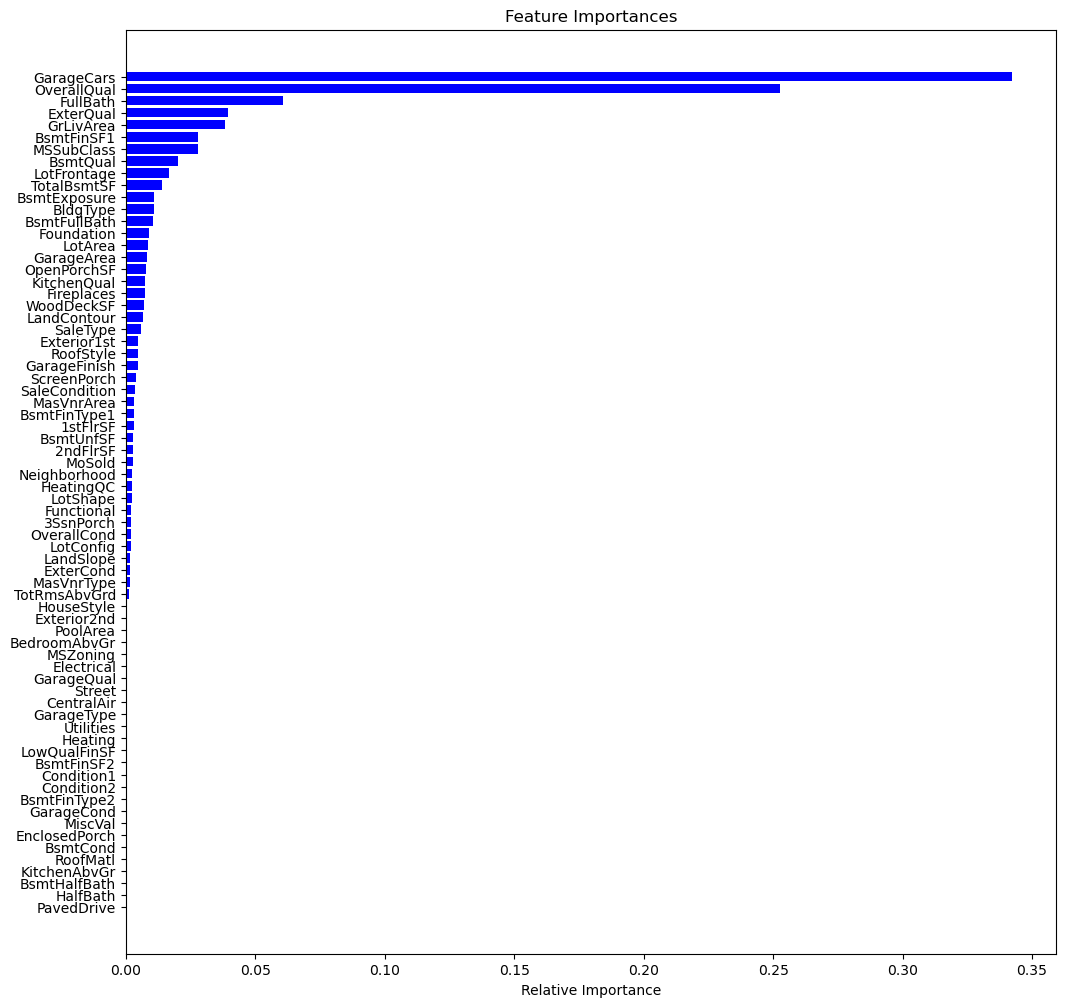

In [218]:
## Code to check the feature importance on the best model
feature_names = X_train.columns
importances = xgboost_model.feature_importances_   
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [219]:
data_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH       80.000    11622   Pave   NaN      Reg   
1  1462          20       RL       81.000    14267   Pave   NaN      IR1   
2  1463          60       RL       74.000    13830   Pave   NaN      IR1   
3  1464          60       RL       78.000     9978   Pave   NaN      IR1   
4  1465         120       RL       43.000     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       0.000        TA        TA     CBlock       TA       TA           No   
1     108.000        TA        TA     CBlock       TA       TA           No   
2       0.000        TA        TA      PConc       Gd       TA           No   
3      20.000        TA        TA      PConc       TA       TA           No   
4       0.000        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec     468.000          LwQ     144.000    270.000      882.000   
1          ALQ     923.000          Unf       0.000    406.000     1329.000   
2          GLQ     791.000          Unf       0.000    137.000      928.000   
3          GLQ     602.000          Unf       0.000    324.000      926.000   
4          ALQ     263.000          Unf       0.000   1017.000     1280.000   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896         0.000         0.000         1         0             2   
1       1329         0.000         0.000         1         1             3   
2       1629         0.000         0.000         2         1             3   
3       1604         0.000         0.000         2         1             3   
4       1280         0.000         0.000         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [220]:
# Code   to predict  the target  variable using the best model on the  testing dataset
X_test["Sale Price"] = xg_boost_tuned.predict(X_test)

In [221]:
X_test.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
1           20         0       81.000    14267       0         0            0   
3           60         0       78.000     9978       0         0            0   
11         160         1       21.000     1680       0         1            0   
12         160         1       21.000     1680       0         1            0   
15          60         0      102.000    12858       0         0            0   

    Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
1           0          0          0             0           0           0   
3           0          1          0             1           0           0   
11          0          1          0             2           0           0   
12          0          1          0             2           0           0   
15          0          1          0             3           0           0   

    BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
1          0           0            6            6          0         0   
3          0           1            6            6          1         0   
11         1           1            6            5          1         0   
12         1           1            5            5          1         0   
15         0           1            9            5          1         0   

    Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
1             0            0           0     108.000          0          0   
3             1            1           0      20.000          0          0   
11            2            2           0     504.000          0          0   
12            2            2           0     492.000          0          0   
15            1            1           1     162.000          1          0   

    Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
1            0         0         0             0             0     923.000   
3            1         0         0             0             1     602.000   
11           0         0         0             0             2     156.000   
12           0         0         0             0             2     300.000   
15           1         1         0             0             3       0.000   

    BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
1              0       0.000    406.000     1329.000        0          0   
3              0       0.000    324.000      926.000        0          1   
11             0       0.000    327.000      483.000        0          0   
12             0       0.000    225.000      525.000        0          0   
15             0       0.000   1590.000     1590.000        0          1   

    CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
1            0           0      1329         0             0       1329   
3            0           0       926       678             0       1604   
11           0           0       483       504             0        987   
12           0           0       525       567             0       1092   
15           0           0      1627       707             0       2334   

    BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1          0.000         0.000         1         1             3   
3          0.000         0.000         2         1             3   
11         0.000         0.000         1         1             2   
12         0.000         0.000         1         1             3   
15         0.000         0.000         2         1             3   

    KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
1              1            0             6           0           0   
3              1            0             7           0           1   
11             1            1             5           0           0   
12             1            1             6           0         

In [222]:
X_test['Sale Price'].head()

1    176790.156
3    194896.469
11   136917.625
12   138739.891
15   317796.406
Name: Sale Price, dtype: float32

In [223]:
# Lets sort the index 
X_test=X_test.sort_index()

In [224]:
# Lets add the ID column in the testing dataset
X_test['ID'] =data_train['Id']

In [225]:
X_test.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
1           20         0       81.000    14267       0         0            0   
3           60         0       78.000     9978       0         0            0   
11         160         1       21.000     1680       0         1            0   
12         160         1       21.000     1680       0         1            0   
15          60         0      102.000    12858       0         0            0   

    Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
1           0          0          0             0           0           0   
3           0          1          0             1           0           0   
11          0          1          0             2           0           0   
12          0          1          0             2           0           0   
15          0          1          0             3           0           0   

    BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
1          0           0            6            6          0         0   
3          0           1            6            6          1         0   
11         1           1            6            5          1         0   
12         1           1            5            5          1         0   
15         0           1            9            5          1         0   

    Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
1             0            0           0     108.000          0          0   
3             1            1           0      20.000          0          0   
11            2            2           0     504.000          0          0   
12            2            2           0     492.000          0          0   
15            1            1           1     162.000          1          0   

    Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
1            0         0         0             0             0     923.000   
3            1         0         0             0             1     602.000   
11           0         0         0             0             2     156.000   
12           0         0         0             0             2     300.000   
15           1         1         0             0             3       0.000   

    BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
1              0       0.000    406.000     1329.000        0          0   
3              0       0.000    324.000      926.000        0          1   
11             0       0.000    327.000      483.000        0          0   
12             0       0.000    225.000      525.000        0          0   
15             0       0.000   1590.000     1590.000        0          1   

    CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
1            0           0      1329         0             0       1329   
3            0           0       926       678             0       1604   
11           0           0       483       504             0        987   
12           0           0       525       567             0       1092   
15           0           0      1627       707             0       2334   

    BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1          0.000         0.000         1         1             3   
3          0.000         0.000         2         1             3   
11         0.000         0.000         1         1             2   
12         0.000         0.000         1         1             3   
15         0.000         0.000         2         1             3   

    KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
1              1            0             6           0           0   
3              1            0             7           0           1   
11             1            1             5           0           0   
12             1            1             6           0         

In [226]:
data_df =pd.DataFrame({"ID":X_test['ID'],"Sales Price":X_test["Sale Price"]})

In [227]:
data_df.head()

ID  Sales Price
1    2   176790.156
3    4   194896.469
11  12   136917.625
12  13   138739.891
15  16   317796.406

In [228]:
# Lets set the index as ID
data_df = data_df.set_index('ID')

In [229]:
data_df.head()

Sales Price
ID             
2    176790.156
4    194896.469
12   136917.625
13   138739.891
16   317796.406

In [230]:
# code to save the predicted dataset as a csv file
data_df.to_csv("Submission_file(Sale Prices).csv",index=False)